# Exploratory Data Analysis

## Цели:

1. `Понять структуру данных`: Исследовать таблицу, чтобы понять, какие колонки и типы данных представлены в ней и как они соотносятся с каждым смартфоном;

2. `Устранить пропущенные значения`: Проверить наличие пропущенных данных в каждой колонке и принять меры по обработке и устранению пропусков;

3. `Валидация данных`: Проверить, насколько значения в каждой колонке соответствуют ожидаемым. Например, проверить, что значения в столбце "память" являются корректными вариантами, и значения в столбце "цена" являются положительными числами.

4.  `Изучение распределений`: Исследовать распределение значений для каждой колонки, чтобы понять, какие характеристики более распространены, а также выявить любые выбросы или аномалии.

5. `Визуализация данных`: Создать графики и визуализации для лучшего понимания данных и обнаружения интересных трендов или закономерностей.

6. `Определение возможных аномалий`: Провести анализ на наличие аномалий, таких как смартфоны с нереалистически высокими или низкими ценами или несоответствующими

In [1]:
import psycopg2
import math
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.core.frame import DataFrame
from typing import List
from mpl_toolkits.basemap import Basemap

mpl.rcParams['agg.path.chunksize'] = 10000

## Db connection
***

In [2]:
# Пример подключения
con = psycopg2.connect(
    database="db_name",
    user="shazy",
    password="1111",
    host="111.111.1.11",
    port="1111"
)

***

In [3]:
def get_table_df(table_name: str = None) -> DataFrame:
    with con.cursor() as cur:
        cur.execute(
            f"SELECT * FROM {table_name}"
        )
        col_names = [desc[0] for desc in cur.description]
        rows = cur.fetchall()
        
        return pd.DataFrame(rows, columns=col_names)

In [4]:
def show_na(df: DataFrame):
    """ Ф-ция подсчета пропусков и нулевых значений """
    na_info = (df.isna() | df.isnull()).sum()
    result = (pd.concat([na_info / df.shape[0], na_info], axis=1,  keys=['percent', 'abs'])
              .sort_values('percent', ascending=False))
    
    return result

In [5]:
def first_check(df: DataFrame) -> None:
    """ Ф-ция first look на фрейм """
    print(f"Первые 5 строк: \n {df.head()} \n {'-'*100} \n" + "Cуммарная информация:")
    print(f"\n {df.info()} \n {'-'*100} \n" + "Сводка:")
    print(f"\n {df.describe()} \n {'-'*100} \n")
    print(f"Пропуски: \n {show_na(df)}")

In [6]:
def plot_pie(col_name: str, models_num: int) -> None:
    col = int(0)
    columns = df_prod['brand'].value_counts().index[:models_num]
    fig, ax = plt.subplots(len(columns)//2, 2, figsize=(10, 10))
    
    for i_row, column in enumerate(columns):
        row = i_row//2
        df_prod.loc[df_prod['brand'] == column, col_name].value_counts().plot.pie(
            labeldistance=1.15,
            wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
            autopct='%1.1f%%',
            ax = ax[row, col],
            ylabel=''
        )
        ax[row, col].set_title(column)
        col = 1 if col == 0 else 0

In [7]:
def plot_price_box(df: DataFrame, title: str, fs: tuple=(10, 10)) -> None:
    plt.figure(figsize=fs)
    
    ax = sns.boxplot(
        x=df['price'],
        y=df['brand'],
        showmeans=True
    )
    ax = sns.stripplot(x=df['price'], y=df['brand'], color="orange", jitter=0.3, size=2.5)
    
    plt.title(label=f'{title}\n', fontsize=18)
    plt.xlabel('цена')
    plt.ylabel('производитель')
    plt.show()

In [8]:
def counter_plot(df: DataFrame, fcol_name: str, scol_name:str,num_cols: int=3, fs: tuple=(10, 10)) -> None:
    fig, ax = plt.subplots((len(df[fcol_name].unique())+ num_cols - 1)//num_cols, num_cols, figsize=fs, squeeze=False)
    fig.tight_layout(h_pad=3, w_pad=2)
    
    for ind, elem in enumerate(df[fcol_name].unique()):
        row = ind // num_cols
        col = ind % num_cols
        
        sns.barplot(df[df[fcol_name] == elem][scol_name].value_counts(), ax=ax[row,col])
        ax[row, col].set_title(elem)
    plt.show()

In [9]:
def plot_pies(df: DataFrame, fcol_name: str, scol_name: str, fs: tuple=(10,10), num_cols: int=2) -> None:
    fig, ax = plt.subplots(
        (len(df[fcol_name].unique()) + num_cols - 1)//num_cols,
        num_cols,
        figsize=fs,
        squeeze=False
    )
    
    for ind, elem in enumerate(df[fcol_name].unique()):
        row = ind // num_cols
        col = ind % num_cols
        
        df[df[fcol_name] == elem][scol_name].value_counts().plot.pie(
            labeldistance=1.15,
            wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
            autopct='%1.1f%%',
            ax=ax[row, col],
            ylabel=''
        )
        ax[row, col].set_title(elem)
    plt.show()

In [10]:
def plot_boxes(df: DataFrame, cols: List[str], title: str, xlabel: str, ylabel: str, fs: tuple=(10, 10), num_cols=2):
    fig, ax = plt.subplots(
        (len(df[cols[0]].unique())+ num_cols - 1)//num_cols, num_cols,
        figsize=fs,
        squeeze=False
    )
    fig.tight_layout(h_pad=5, w_pad=3)
    
    for ind, elem in enumerate(df[cols[0]].unique()):
        row = ind // num_cols
        col = ind % num_cols
        
        sns.boxplot(
            x=df[df[cols[0]] == elem][cols[2]],
            y=df[df[cols[0]] == elem][cols[1]],
            showmeans=True,
            ax=ax[row, col]
        )
        sns.stripplot(
            x=df[df[cols[0]] == elem][cols[2]],
            y=df[df[cols[0]] == elem][cols[1]],
            color="orange",
            jitter=0.3,
            size=2.5,
            ax=ax[row,col]
        )
        
        ax[row, col].set_title(label=f'{title} | {elem}', fontsize=16)
        ax[row, col].set_xlabel(xlabel)
        ax[row, col].set_ylabel(ylabel)
    plt.show()

# Таблица products

__Description:__
* `id` - уникальный индентификатор;
* `brand` - название бренда производителя;
* `model` - название модели;
* `series` - название/номер серии;
* `memory` - инф-цию о объеме памяти;
* `price` - стоимость в рублях.

In [11]:
# df_prod = get_table_df('products') Показываю на выгрузке из бд, т.к. в бд хранятся уже обработанные данные
df_prod = pd.read_csv('prod_df.csv')
df_prod.drop('color', axis= 1 , inplace= True )

In [12]:
df_prod.loc[df_prod['series'] == 'NaN', 'series'] = None

In [13]:
first_check(df_prod)

Первые 5 строк: 
           id    brand   model series   memory   price
0   30069468    apple  iphone     15     4/32  159999
1  400103320   realme     c55    NaN  6+128gb   18999
2   30067400  samsung  galaxy    a14    128gb   16999
3   30067635   huawei    nova    11i  8/128gb   19999
4  400077577    honor     x9a    NaN  6/128gb   27999 
 ---------------------------------------------------------------------------------------------------- 
Cуммарная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2310 non-null   int64 
 1   brand   2310 non-null   object
 2   model   2310 non-null   object
 3   series  1617 non-null   object
 4   memory  2310 non-null   object
 5   price   2310 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 108.4+ KB

 None 
 -----------------------------------------------------------------------------

### First look

* Исходя из предоставленной информации, в вашем ассортименте присутствуют смартфоны из разных ценовых сегментов. Количество моделей смартфонов в ассортименте – 2310, а значит предлагается широкий выбор для потенциальных покупателей.
* Минимальная стоимость смартфона - 2490 руб, что может предлагать доступные опции для покупателей с ограниченным бюджетом.
* Средняя цена на смартфон составляет ~ 70т. рублей, что может указывать на то, что ваш ассортимент включает в себя смартфоны из различных ценовых категорий. 
* Максимальная стоимость смартфона ~ 260т. руб, что указывает на наличие в ассортименте моделей премиум-класса.
* В столбце series присутствуют пропуски, похоже, что не у каждого смартфона удалось определить модель. (Не критично)

## Пройдемся по каждому из столбцов
### brand:

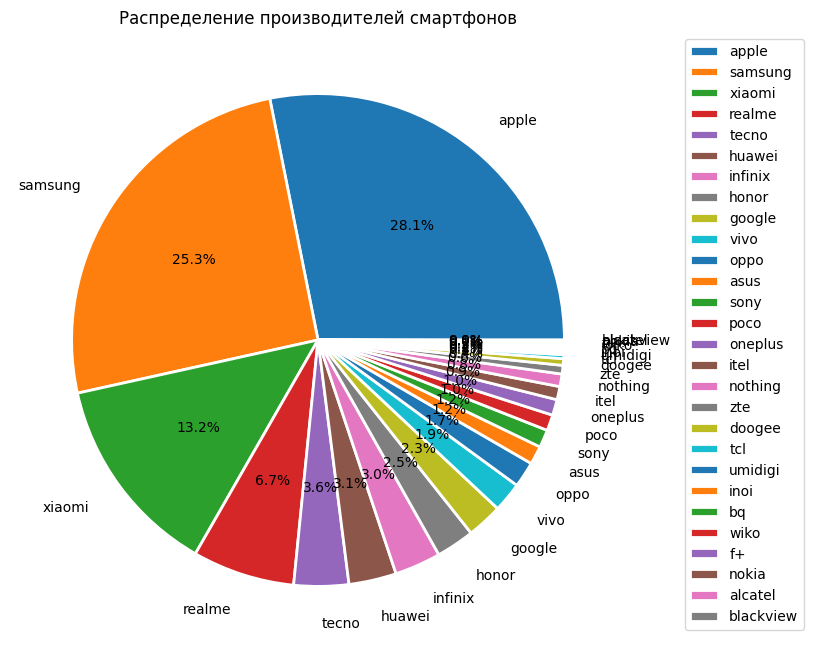

In [14]:
df_prod['brand'].value_counts().plot.pie(
    labeldistance=1.15,
    wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
    autopct='%1.1f%%',
    figsize=(8,8),
    ylabel='',
    title='Распределение производителей смартфонов'
)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

In [15]:
columns = df_prod['brand'].value_counts().index[:4]

В ассортименте представлены смартфоны от таких известных производителей, как Apple, Samsung, Xiaomi и Realme. Продолжим ознакомление с данными, связанными с этими четырьмя производителями.

### model:

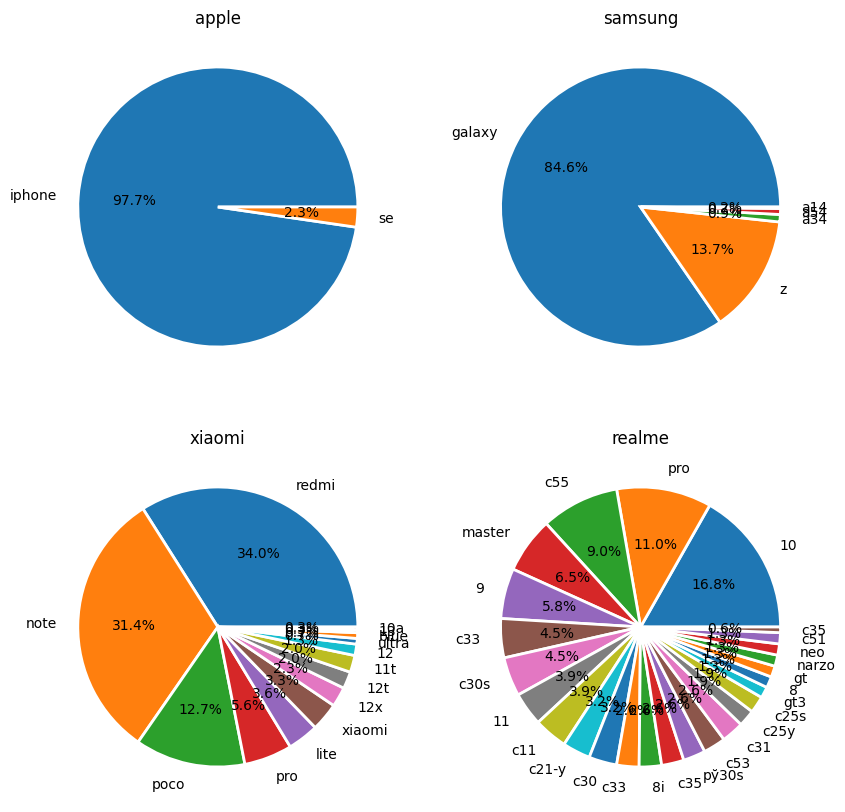

In [16]:
plot_pie('model', 4)

По графикам видно, что после скрапинга в колонку `model` попали серии смартфонов.

### series:

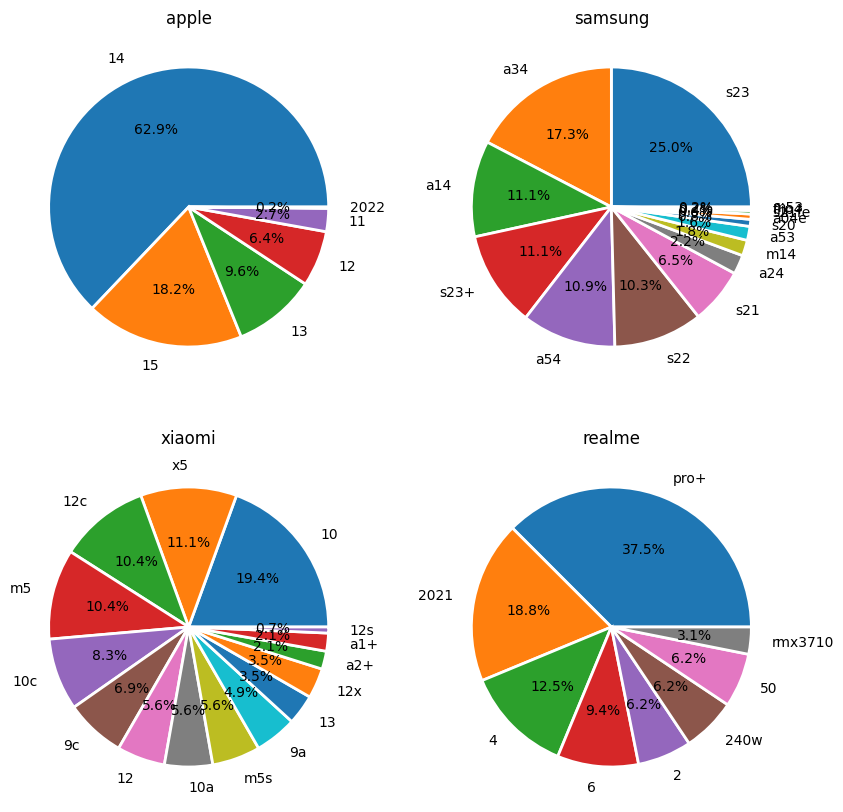

In [17]:
plot_pie('series', 4)

### memory

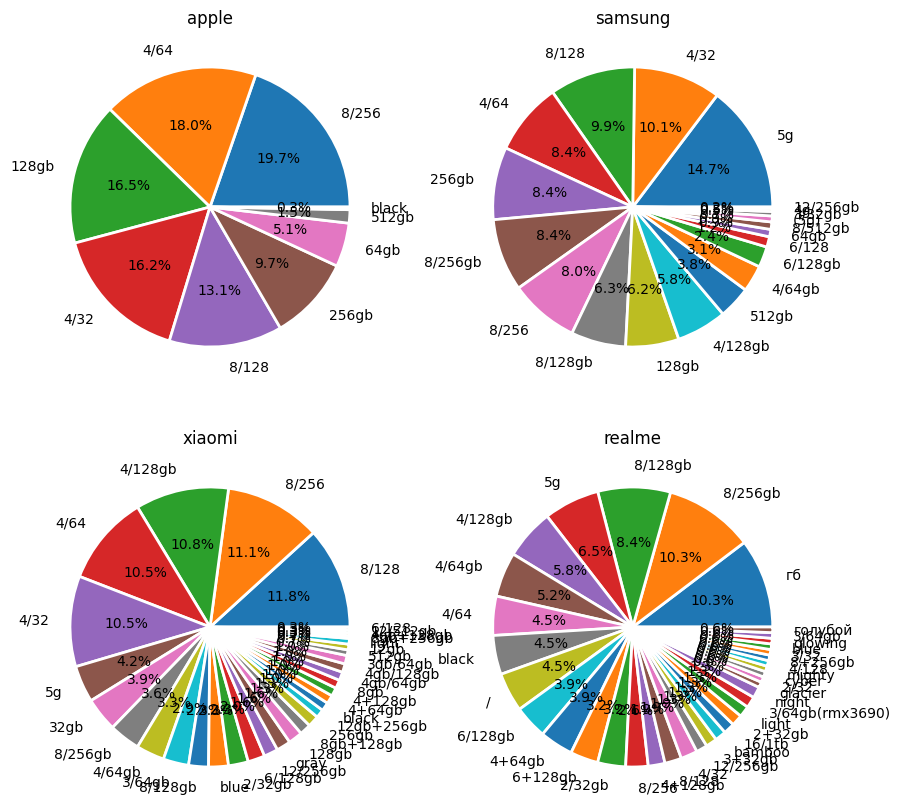

In [18]:
plot_pie('memory', 4)

In [19]:
df_prod['memory'].unique()

array(['4/32', '6+128gb', '128gb', '8/128gb', '6/128gb', '8/256gb',
       '4/128gb', '64gb', '8/128', '8/256', '32gb', '4/64', 'night',
       '4/64gb', 'black', '256gb', '3/32', '3/64gb(rmx3690)', 'x6833b',
       '8+256gb', 'midnight', 'mighty', 'light', '8+128gb', 'green',
       '3/64gb', '5g', '12/256gb', '12/512gb', '4gb/128gb', '512gb',
       '2/32gb', 'agate', '3gb/64gb', '3/32gb', '12/256', '16+1gb',
       '4+64gb', 'glacier', '/', 'blue', '16/1tb', '2+32gb', '4gb/64gb',
       'elegant', 'golden', 'bamboo', '4+128gb', '4/128', '(2/32)',
       '2/32', 'gray', 'orange', '8gb+128gb', '12gb', 'cyber', '3+32gb',
       '8gb', 'x665b', '2/64gb', '8gb+256gb', '12gb+256gb', '(5g)',
       '3/64', 'x6812b', '6/128', 'grey', '4gb+128gb', 'gradient',
       'magic', '8/512gb', 'гб', 'серебристый', '3g/64g', 'голубой', '4g',
       'vibrant', '4g/64gb', '4g/64g', 'glowing', '6/128g', '16/256gb',
       '1/16gb'], dtype=object)

Попробуем привести к единой системе обозначения `оперативная память в гб./внутр. накопитель в гб.`, неточности по типу неправильных значений будем исправлять позже.

In [20]:
op_mem = [str(i) for i in range(17)]
in_mem = ['16', '32', '64', '128', '256', '512']

for o in op_mem:
    for i in in_mem:
        df_prod.loc[df_prod['memory'].isin([f'{o}/{i}gb', f'{o}g/{i}gb', f'{o}g/{i}g', f'{o}/{i}g', f'{o}gb/{i}gb', f'{o}+{i}gb', f'{o}gb+{i}gb']), 'memory'] = f'{o}/{i}'

df_prod.loc[df_prod['memory'].isin(['16+1gb']), 'memory'] = '1/16'
df_prod.loc[df_prod['memory'].isin(['(2/32)']), 'memory'] = '2/32'
df_prod.loc[df_prod['memory'].isin(['16/1tb']), 'memory'] = '16/1024'
df_prod.loc[df_prod['memory'].isin(['3/64gb(rmx3690)']), 'series'] = 'rmx3690'
df_prod.loc[df_prod['memory'].isin(['3/64gb(rmx3690)']), 'memory'] = '3/64'
df_prod.loc[df_prod['memory'].isin(['x6833b']), 'series'] = 'x6833b'
df_prod.loc[df_prod['memory'].isin(['x6812b']), 'series'] = 'x6812b'


In [21]:
df_prod['memory'].unique()

array(['4/32', '6/128', '128gb', '8/128', '8/256', '4/128', '64gb',
       '32gb', '4/64', 'night', 'black', '256gb', '3/32', '3/64',
       'x6833b', 'midnight', 'mighty', 'light', 'green', '5g', '12/256',
       '12/512', '512gb', '2/32', 'agate', '1/16', 'glacier', '/', 'blue',
       '16/1024', 'elegant', 'golden', 'bamboo', 'gray', 'orange', '12gb',
       'cyber', '8gb', 'x665b', '2/64', '(5g)', 'x6812b', 'grey',
       'gradient', 'magic', '8/512', 'гб', 'серебристый', 'голубой', '4g',
       'vibrant', 'glowing', '16/256'], dtype=object)

Все осальные неточности будем исправлять позже.

### price

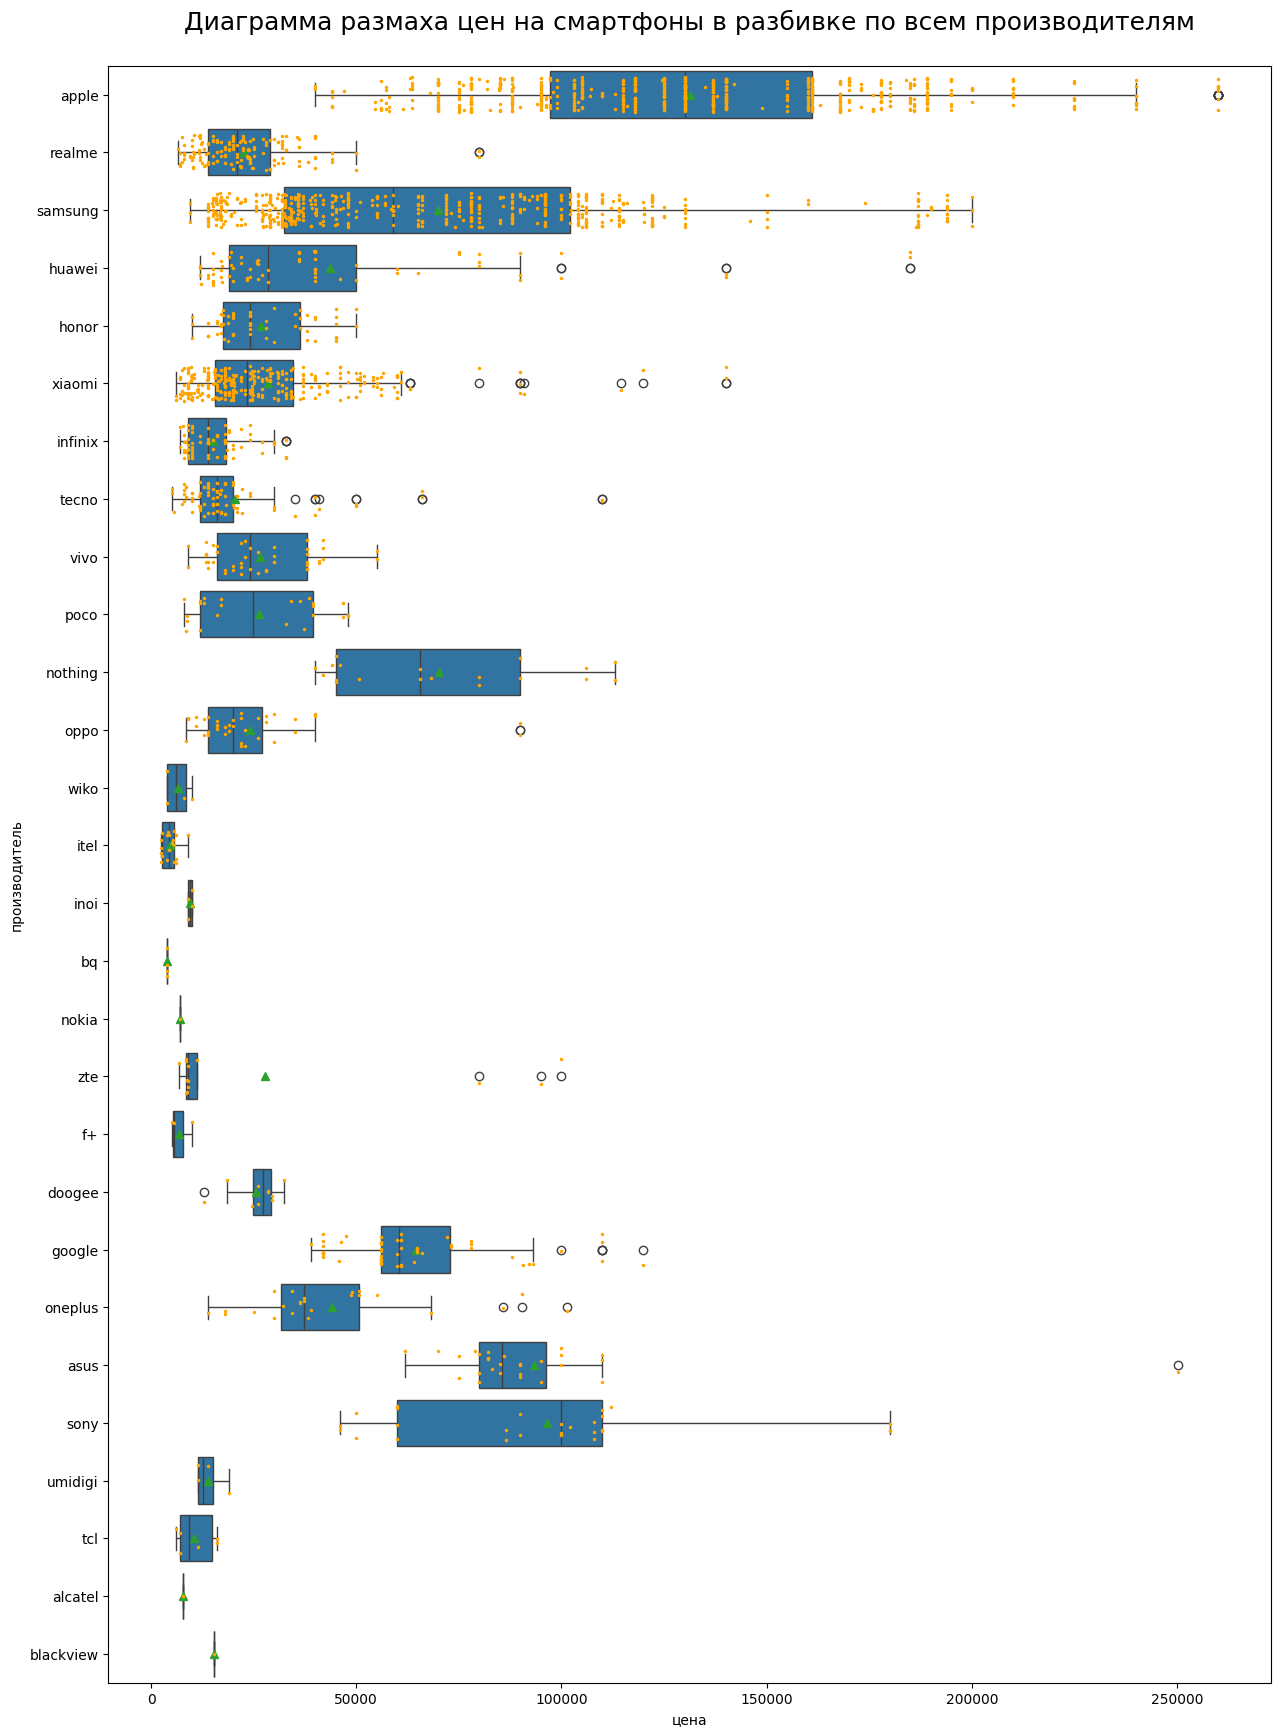

In [22]:
plot_price_box(
    df_prod,
    title='Диаграмма размаха цен на смартфоны в разбивке по всем производителям',
    fs=(15, 21)
)

In [23]:
colors = ['#EA495E', '#0E2673', '#FF6933', '#D9D46B'] # colormind

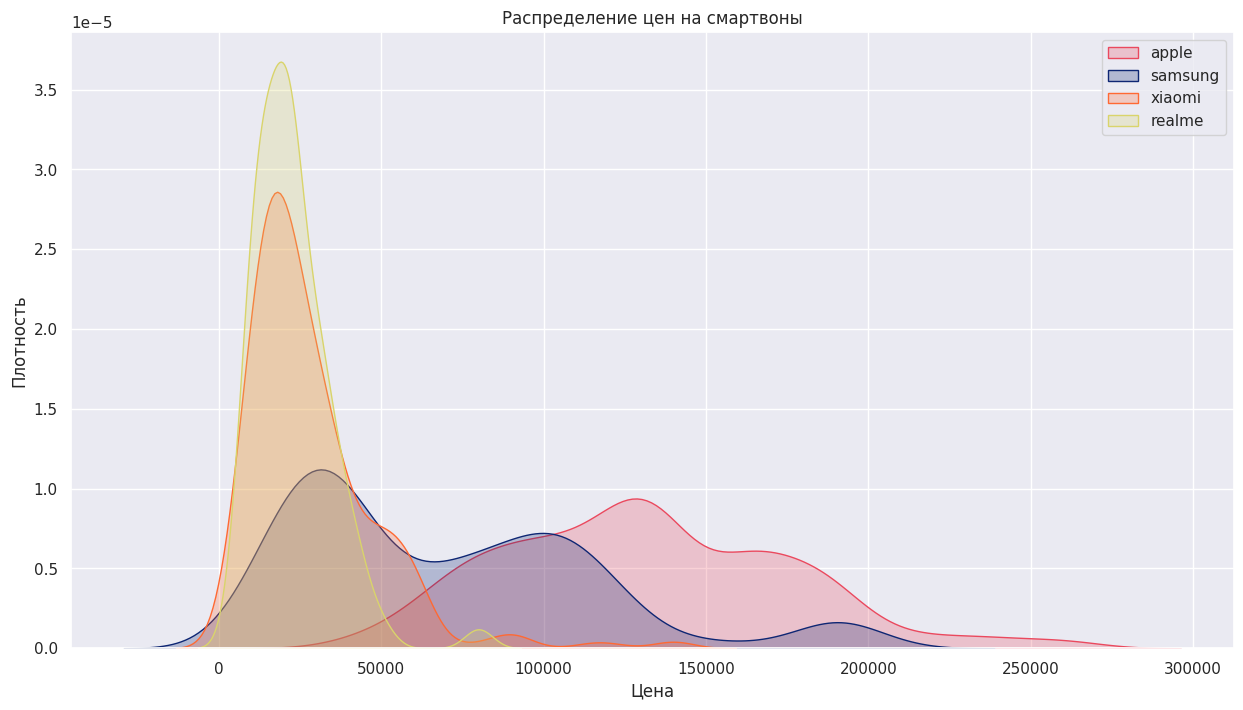

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))

for i in range(len(columns)):
    fig = sns.kdeplot(df_prod.loc[df_prod['brand'] == columns[i], 'price'], fill=True, cmap = "Accent", color=colors[i])

plt.legend(columns)
plt.title('Распределение цен на смартвоны')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.show()

/tmp/ipykernel_3546/4083866880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


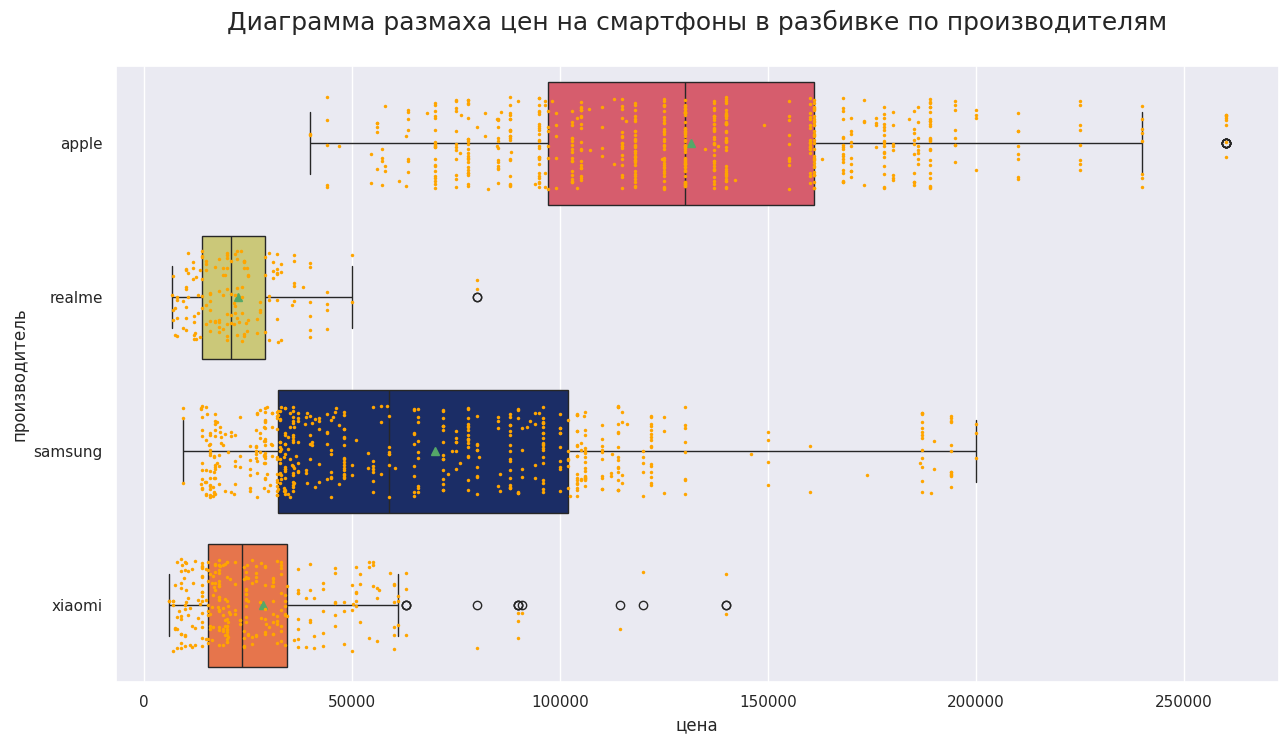

In [25]:
df = df_prod[df_prod['brand'].isin(columns)]
box_colors = ['#EA495E', '#D9D46B','#0E2673', '#FF6933']
plt.figure(figsize=(15, 8))

ax = sns.boxplot(
    palette=box_colors,
    x=df['price'],
    y=df['brand'],
    showmeans=True
)
ax = sns.stripplot(x=df['price'], y=df['brand'], color="orange", jitter=0.3, size=2.5)

plt.title(label='Диаграмма размаха цен на смартфоны в разбивке по производителям\n', fontsize=18)
plt.xlabel('цена')
plt.ylabel('производитель')
plt.show()

In [26]:
for col in columns:
    print(f'Статистика по {col.upper()}:\n', df.loc[df['brand'] == col, 'price'].describe(), '\n')

Статистика по APPLE:
 count       650.000000
mean     131433.521538
std       44015.030062
min       39999.000000
25%       97190.000000
50%      129990.000000
75%      160990.000000
max      259999.000000
Name: price, dtype: float64 

Статистика по SAMSUNG:
 count       585.000000
mean      69972.998291
std       46164.964902
min        9490.000000
25%       32290.000000
50%       58990.000000
75%      101990.000000
max      199999.000000
Name: price, dtype: float64 

Статистика по XIAOMI:
 count       306.000000
mean      28580.222222
std       20095.147540
min        5990.000000
25%       15492.250000
50%       23499.000000
75%       34490.000000
max      139999.000000
Name: price, dtype: float64 

Статистика по REALME:
 count      155.000000
mean     22654.245161
std      11873.163076
min       6640.000000
25%      13999.000000
50%      20999.000000
75%      28999.000000
max      79999.000000
Name: price, dtype: float64 



Исходя из предоставленных данных, можно сделать следующие выводы:

1. Средняя цена устройства Apple (131,433) значительно выше, чем у Samsung (69,973), Xiaomi (28,580) и Realme (22,654).
2. Стандартное отклонение также выше у Apple (44,015), что указывает на большой разброс цен у их продукции.

3. Минимальная цена у Samsung (9,490) и Xiaomi (5,990) наиболее доступны по сравнению с Apple (39,990) и Realme (6,640).

4. Максимальная цена на устройство Apple (259,999) значительно превышает Samsung (199,999), Xiaomi (139,999) и Realme (79,999).

5. 25-й перцентиль (нижняя граница верхней четверти) у Apple (97,190) и Realme (13,999) наиболее низкий, а у Xiaomi (15,492) находится в среднем значении. У Samsung (32,290) наибольший из всех производителей.

6. 50-й перцентиль (медиана) у Apple (129,990) является самым высоким, Yanomi (23 499) и Samsung (58 990) находятся в среднем значении. Realme (20 999) находится ниже по сравнению с другими производителями.

7. 75-й перцентиль (верхняя граница нижней четверти) у Apple (160,990) и Samsung (101,990) находится наиболее высоким, у Xiaomi (34,490) - находится в среднем значении, а у Realme (28,999) - самый низкий.


выделим три ценовых сегмента и посмотрим на них по отдельности:
1. Бюджетные смартфоны (до 20к)
3. Среднего класса смартфоны (от 20к до 70к)
4. Премиум-сегмент (от 70к)

### Бюджетный сегмент

In [27]:
df = df_prod[df_prod['price'] < 20_000]
print(f'Количество производителей смартфонов бюджетного сегмента: {len(df["brand"].value_counts().index)}\n')
print(df['price'].describe())

Количество производителей смартфонов бюджетного сегмента: 23

count      565.000000
mean     13649.012389
std       4383.715735
min       2490.000000
25%       9999.000000
50%      13999.000000
75%      16999.000000
max      19999.000000
Name: price, dtype: float64


Четверть нашего асортимента - это смартфоны бюджетного сегмента.

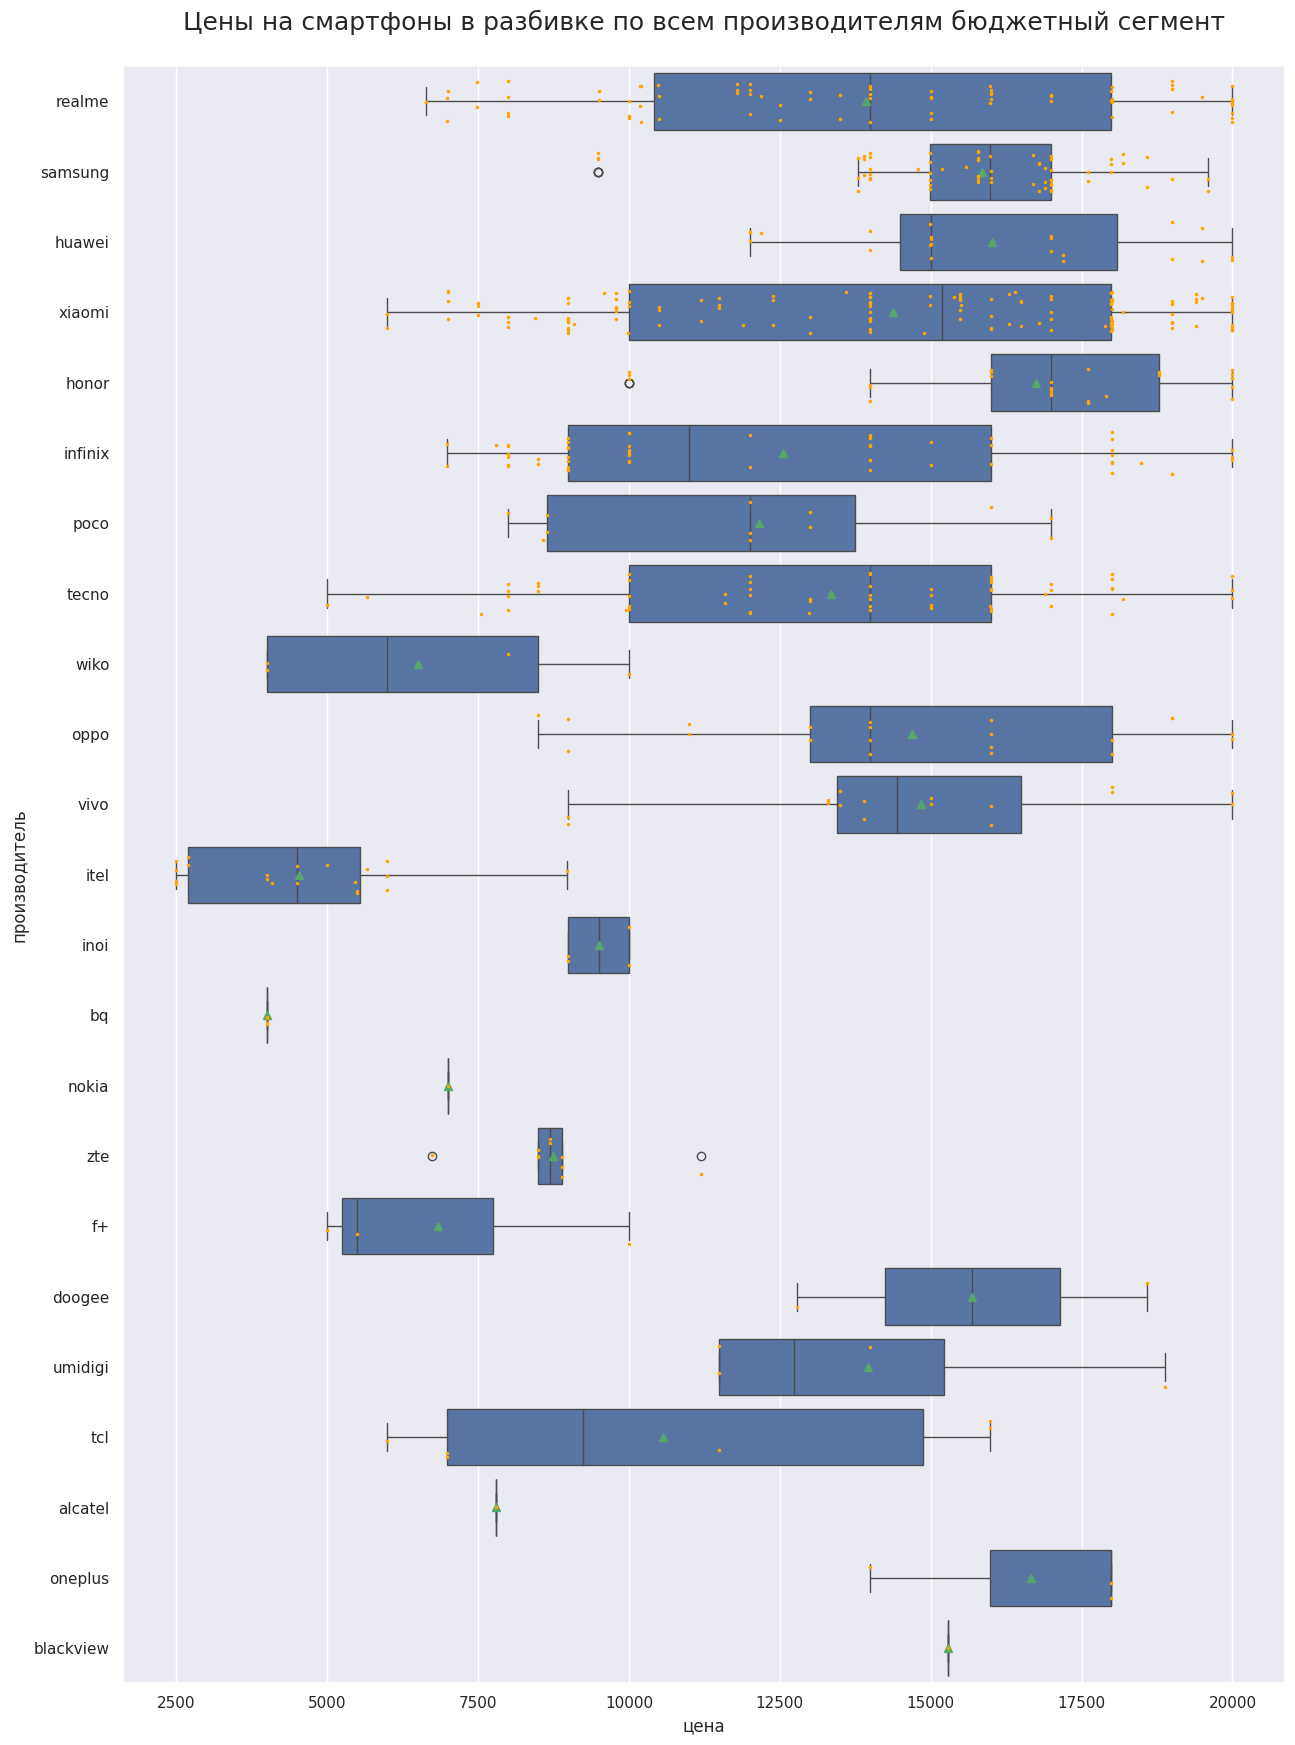

In [28]:
plot_price_box(
    df=df,
    title='Цены на смартфоны в разбивке по всем производителям бюджетный сегмент',
    fs=(15, 21)
)

### Средний сегмент

In [29]:
df = df_prod[(df_prod['price'] >= 20_000) & (df_prod['price'] < 80_000)]
print(f'Количество производителей смартфонов среднего сегмента: {len(df["brand"].value_counts().index)}\n')
print(df['price'].describe())

Количество производителей смартфонов среднего сегмента: 18

count      884.000000
mean     43969.192308
std      17724.742217
min      20190.000000
25%      29565.000000
50%      38990.000000
75%      56990.000000
max      79999.000000
Name: price, dtype: float64


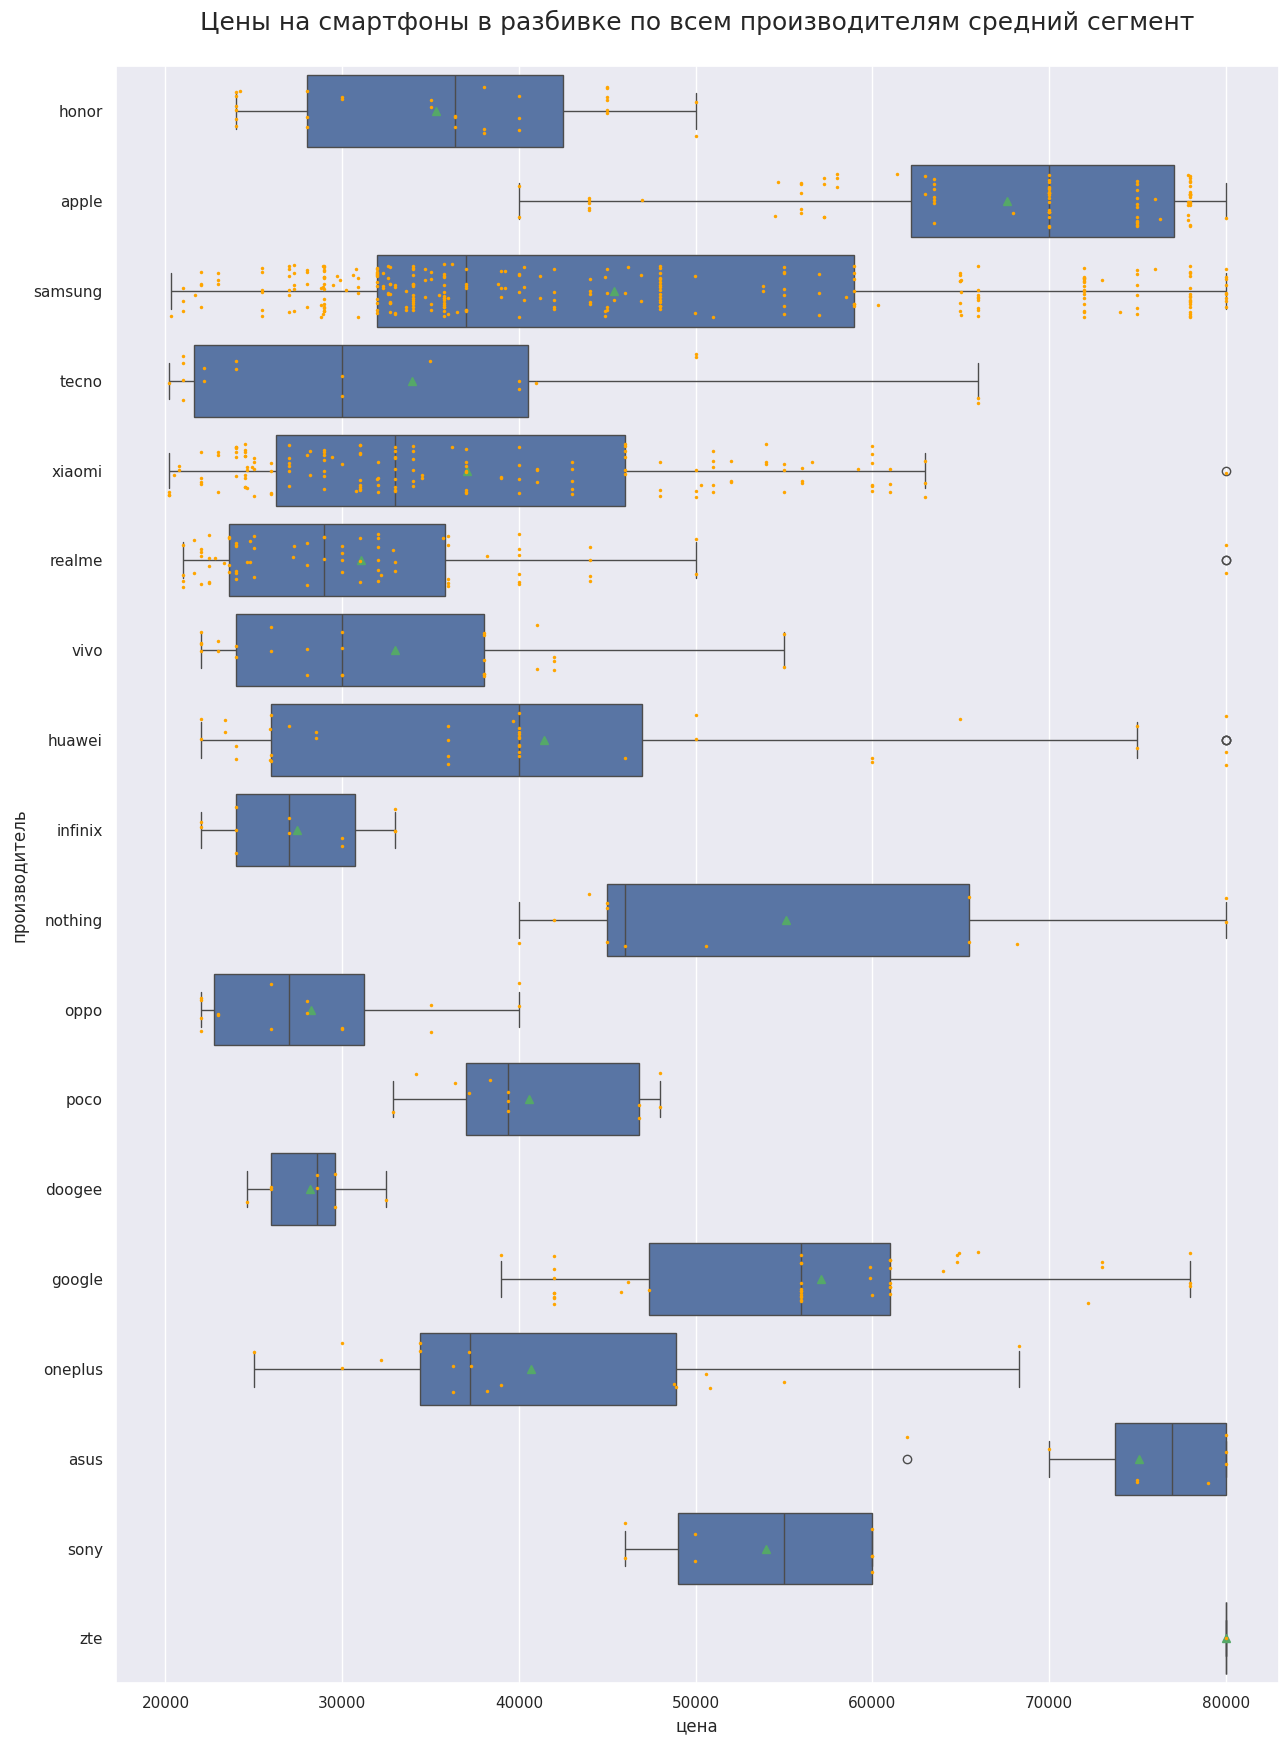

In [30]:
plot_price_box(
    df=df,
    title='Цены на смартфоны в разбивке по всем производителям средний сегмент',
    fs=(15, 21)
)

### Премиум сегмент

In [31]:
df = df_prod[df_prod['price'] >= 80_000]
print(f'Количество производителей смартфонов премиум сегмента: {len(df["brand"].value_counts().index)}\n')
print(df['price'].describe())

Количество производителей смартфонов премиум сегмента: 12

count       861.000000
mean     132761.557491
std       38311.122443
min       80590.000000
25%      102990.000000
50%      124990.000000
75%      160990.000000
max      259999.000000
Name: price, dtype: float64


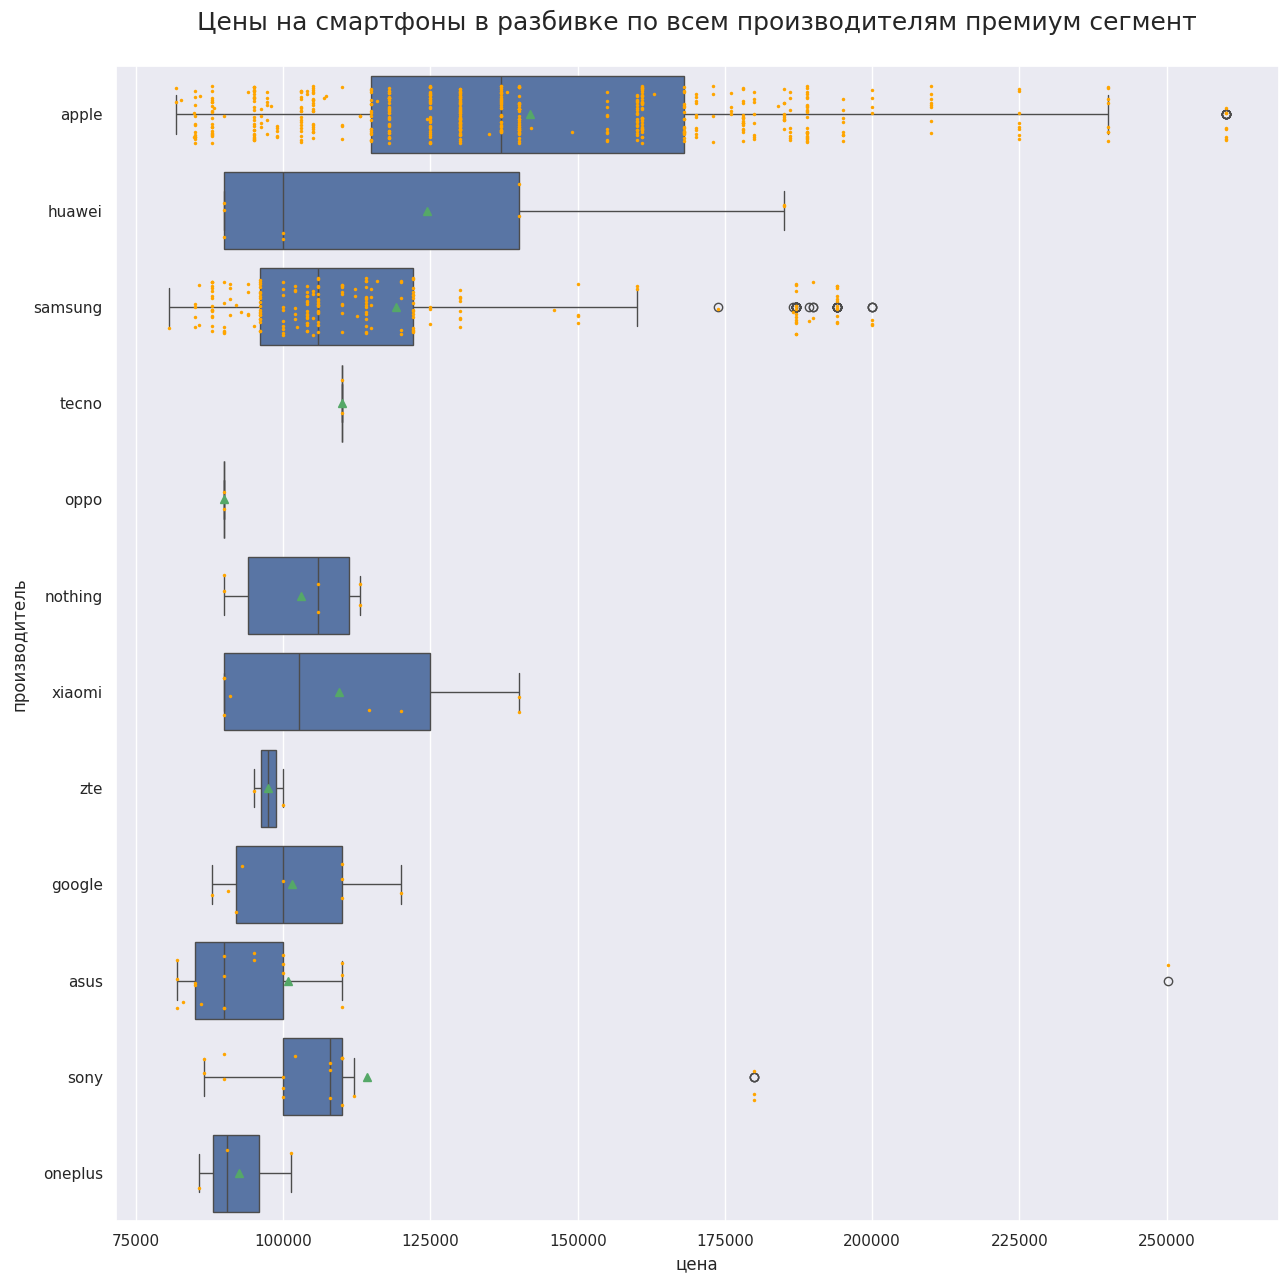

In [32]:
plot_price_box(
    df=df,
    title='Цены на смартфоны в разбивке по всем производителям премиум сегмент',
    fs=(15, 15)
)

## Выводы по таблице products:

* В таблице хранится информация о смартфонах, в нашем асортименте модели от 28 производителей.
* У нас есть неточности в колонках `series`, `memory` и `color`.

Наш основной/ключевой товар можно разбить на три ценовых сегмента:
1. Бюджетные смартфоны (до 20к): в этом сегменте представлены устройства с более доступной ценой, которые обычно обладают основными функциями смартфона. Они могут иметь более простой дизайн и некоторое ограничение в характеристиках и возможностях.
    * Средняя цена в этом сегменте составляет 13 649, с минимальной ценой 2 490 и максимальной - 19 999 рублей. 
    * Стандартное отклонение (мера разброса) равно 4 383, что указывает на некоторую вариативность в ценах этого сегмента.


3. Среднего класса смартфоны (от 20к до 80к): в этом сегменте представлены устройства, которые имеют хорошее соотношение цены и качества. Они обычно имеют более продвинутые функции и характеристики, такие как улучшенная камера, больший объем памяти и лучший процессор, по сравнению с вариантами.
    * Средняя цена в этом сегменте составляет 43 969, с минимальной ценой 20 190 и максимальной - 79 999 рублей.
    * Стандартное отклонение равно 17 724, что также указывает на некоторую вариативность в ценах этого сегмента, но меньшую, чем в бюджетном сегменте.


4. Премиум-сегмент (от 80к): в этом сегменте представлены смартфоны более высокого класса, которые обладают передовыми технологиями и функциями. У них лучшая производительность и дизайн высокого качества. Цены на премиум-смартфоны обычно значительно выше, чем на бюджетные и среднего класса смартфоны.
    * Средняя цена в этом сегменте составляет 132 761, с минимальной ценой 80 590 и максимальной - 259 999 рублей.
    * Стандартное отклонение равно 38 311, что указывает на наибольшую вариативность в ценах среди трех сегментов.

Теперь необходимо рассмотреть каждую из компаний отдельно и, по возможности, исправить неточности в колонках.

In [33]:
df_prod.loc[df_prod['memory'].isin(['black', 'x6833b', 'midnight', 'light', '64gb', 'gray', 'orange', '256gb', '12gb', '128gb', '8gb', 'x665b', 'серебристый', 'голубой', 'vibrant', 'гб','512gb','green','agate']), 'brand'].value_counts()

brand
apple      215
samsung    112
xiaomi      26
realme      26
honor       17
oppo         9
infinix      6
huawei       6
tcl          5
poco         4
doogee       4
vivo         3
inoi         3
itel         3
wiko         1
bq           1
f+           1
oneplus      1
nothing      1
Name: count, dtype: int64

In [34]:
brands = ['apple', 'realme', 'samsung', 'xiaomi', 'huawei', 'honor', 'oppo']

In [35]:
brands

['apple', 'realme', 'samsung', 'xiaomi', 'huawei', 'honor', 'oppo']

## 1. Apple:

In [36]:
df = df_prod[df_prod['brand'] == brands[0]]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 2295
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      650 non-null    int64 
 1   brand   650 non-null    object
 2   model   650 non-null    object
 3   series  636 non-null    object
 4   memory  650 non-null    object
 5   price   650 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 35.5+ KB


Замечаем, что у нас есть пропуски в столбце `series`

In [38]:
df[df['series'].isna()]

id  brand model series memory  price
8      30067630  apple    se    NaN   64gb  39999
668    30067632  apple    se    NaN   64gb  39999
994   400051151  apple    se    NaN   64gb  43990
1032  400040281  apple    se    NaN  8/256  57290
1121  400128349  apple    se    NaN   4/32  61390
1174  400040232  apple    se    NaN   4/32  43990
1283  400192028  apple    se    NaN  8/256  43990
1381  400134342  apple    se    NaN  8/256  43990
1645  400051147  apple    se    NaN  128gb  57290
1843  400192011  apple    se    NaN   4/64  57290
1844  400192012  apple    se    NaN   4/32  43990
1845  400192010  apple    se    NaN  8/256  57290
2272  400134352  apple    se    NaN  8/128  57990
2275  400134361  apple    se    NaN  8/128  57990

Все пропуски из моделей se а серия у этих моделей только одна `2022` следовательно заполним пропуски этим значением

In [39]:
df.loc[df['series'].isna(), 'series'] = '2022'

In [40]:
df['model'].value_counts()

model
iphone    635
se         15
Name: count, dtype: int64

Проверим какие есть серии для каждой из моделей по отдельности

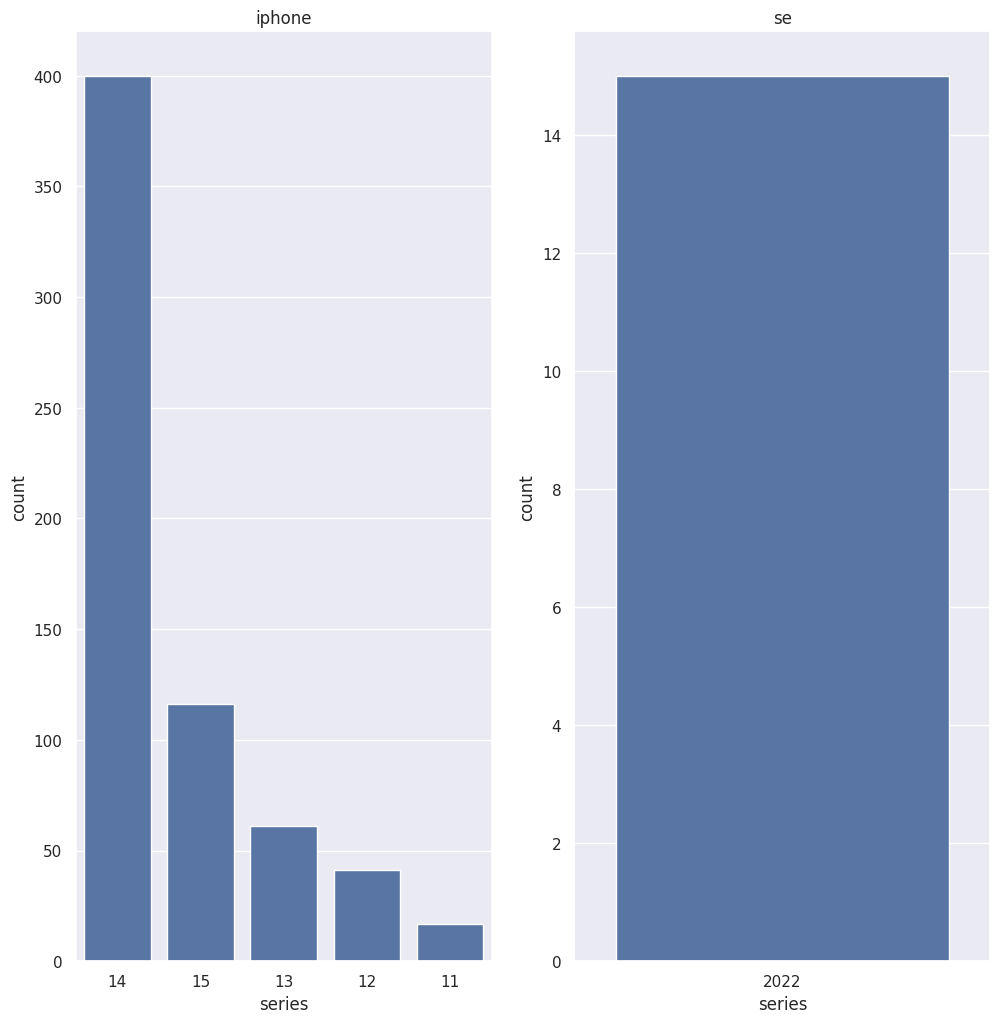

In [41]:
counter_plot(df, 'model', 'series', num_cols=2)

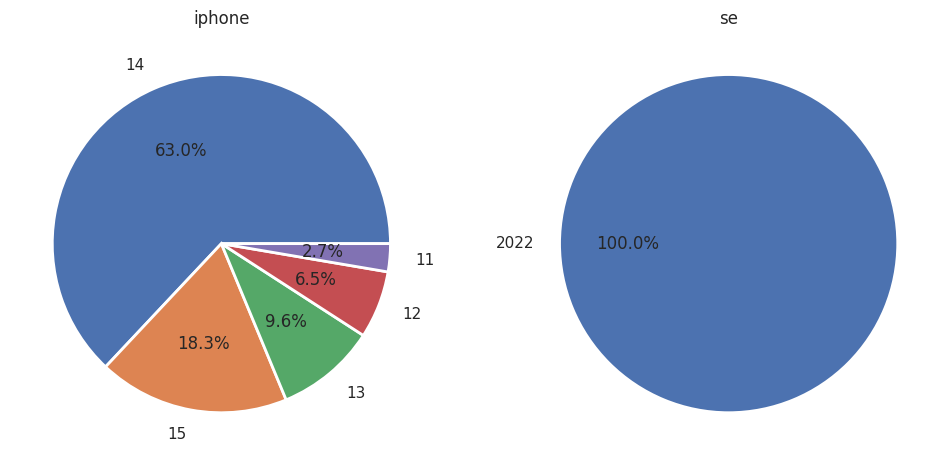

In [42]:
plot_pies(df, 'model', 'series', num_cols=2, fs=(12, 12))

Замечательно, наибольшая часть асортимента техники `apple` это `iphone 14` серии.

In [43]:
for s in df['series'].unique():
    print(f'Средняя стоимость {s} серии: {df[df["series"] == s]["price"].mean()}')

Средняя стоимость 15 серии: 180688.6551724138
Средняя стоимость 2022 серии: 50231.2
Средняя стоимость 13 серии: 87254.2131147541
Средняя стоимость 14 серии: 135920.6625
Средняя стоимость 11 серии: 59856.294117647056
Средняя стоимость 12 серии: 73417.26829268293


Посмотрим на столбец `memory`

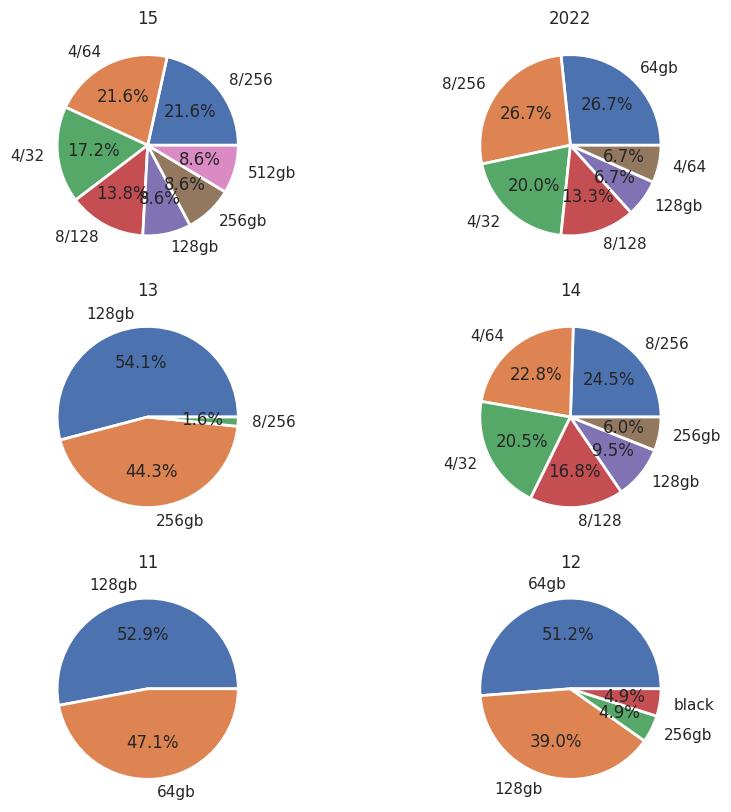

In [44]:
plot_pies(df, 'series', 'memory', num_cols=2)

В столбец `memory` попал цвет, необходимо это исправить

In [45]:
df[(df['series'] == '12') & (df['memory'] == 'black')]

id  brand   model series memory  price
2244  400095923  apple  iphone     12  black  67990
2245  400095922  apple  iphone     12  black  79990

In [46]:
df[(df['series'] == '12')][['memory', 'price']].groupby('memory').mean()

price
memory          
128gb   76396.25
256gb   84999.00
64gb    69990.00
black   73990.00

Видно, что `2245` относится к категории с 64gb, а `2246` к категории 128gb

In [47]:
df.loc[df['id'] == 400095923, 'memory'] = '64gb'
df.loc[df['id'] == 400095922, 'memory'] = '128gb'

Необходимо привести данные к единому стандарту `оперативная память в гб./внутр. накопитель в гб.`

### 15 Серия:

In [48]:
df.loc[(df['series'] == '15'), ['memory', 'price']].groupby('memory').mean()

price
memory          
128gb   129999.0
256gb   139999.0
4/32    199499.0
4/64    185199.0
512gb   169999.0
8/128   193124.0
8/256   193999.0

In [49]:
df.loc[(df['series'] == '15') & (df['memory'] == '128gb'), 'memory'] = '6/128'
df.loc[(df['series'] == '15') & (df['memory'] == '256gb'), 'memory'] = '6/256'
df.loc[(df['series'] == '15') & (df['memory'] == '512gb'), 'memory'] = '6/512'

In [50]:
df.loc[df['series'] == '15', ['memory', 'price']].groupby('memory').mean()

price
memory          
4/32    199499.0
4/64    185199.0
6/128   129999.0
6/256   139999.0
6/512   169999.0
8/128   193124.0
8/256   193999.0

### 2022 серия:

In [51]:
df.loc[(df['series'] == '2022'), ['memory', 'price']].groupby('memory').mean()

price
memory         
128gb   57290.0
4/32    49790.0
4/64    57290.0
64gb    42744.5
8/128   57990.0
8/256   50640.0

In [52]:
df.loc[(df['series'] == '2022') & (df['memory'] == '128gb'), 'memory'] = '8/128'
df.loc[(df['series'] == '2022') & (df['memory'] == '64gb'), 'memory'] = '3/64'

In [53]:
df.loc[(df['series'] == '2022'), ['memory', 'price']].groupby('memory').mean()

price
memory              
3/64    42744.500000
4/32    49790.000000
4/64    57290.000000
8/128   57756.666667
8/256   50640.000000

### 11 серия:

In [54]:
df.loc[(df['series'] == '11'), ['memory', 'price']].groupby('memory').mean()

price
memory              
128gb   63380.888889
64gb    55891.125000

У всех 11 айфонов 4гб оперативной памяти

In [55]:
df.loc[(df['series'] == '11') & (df['memory'] == '128gb'), 'memory'] = '4/128'
df.loc[(df['series'] == '11') & (df['memory'] == '64gb'), 'memory'] = '4/64'

In [56]:
df.loc[(df['series'] == '11'), ['memory', 'price']].groupby('memory').mean()

price
memory              
4/128   63380.888889
4/64    55891.125000

### 12 серия:

In [57]:
df.loc[(df['series'] == '12'), ['memory', 'price']].groupby('memory').mean()

price
memory              
128gb   76607.647059
256gb   84999.000000
64gb    69899.090909

В 12 серии есть смартфоны с 4 и 6 гб оперативной памяти, будем считать что если ценник превышает среднее значение,то это модель с 6 гб.

In [58]:
df.loc[(df['series'] == '12') & (df['memory'] == '128gb') & (df['price'] > 76607), 'memory'] = '6/128'
df.loc[(df['series'] == '12') & (df['memory'] == '256gb') & (df['price'] > 84999), 'memory'] = '6/256'
df.loc[(df['series'] == '12') & (df['memory'] == '64gb') & (df['price'] > 69899), 'memory'] = '6/64'

df.loc[(df['series'] == '12') & (df['memory'] == '128gb'), 'memory'] = '4/128'
df.loc[(df['series'] == '12') & (df['memory'] == '256gb'), 'memory'] = '4/256'
df.loc[(df['series'] == '12') & (df['memory'] == '64gb'), 'memory'] = '4/64'

In [59]:
df.loc[(df['series'] == '12'), ['memory', 'price']].groupby('memory').mean()

price
memory              
4/128   75066.923077
4/256   84999.000000
4/64    67990.000000
6/128   81615.000000
6/64    69990.000000

### 13 серия

In [60]:
df.loc[(df['series'] == '13'), ['memory', 'price']].groupby('memory').mean()

price
memory              
128gb   80410.363636
256gb   96025.000000
8/256   76290.000000

У 13 серии у всех моделей с 256 гб 6гб оперативной памяти, а 128гб бывает с 4 и 6 (Разобъем данные опять по средней цене).

In [61]:
df.loc[(df['series'] == '13') & (df['memory'] == '128gb') & (df['price'] > 80410), 'memory'] = '6/128'
df.loc[(df['series'] == '13') & (df['memory'] == '256gb'), 'memory'] = '6/256'
df.loc[(df['series'] == '13') & (df['memory'] == '128gb'), 'memory'] = '4/128'

In [62]:
df.loc[(df['series'] == '13'), ['memory', 'price']].groupby('memory').mean()

price
memory              
4/128   77967.272727
6/128   85296.545455
6/256   96025.000000
8/256   76290.000000

### 14 серия

In [63]:
df.loc[(df['series'] == '14'), ['memory', 'price']].groupby('memory').mean()

price
memory               
128gb    90882.315789
256gb   104054.000000
4/32    142643.865854
4/64    143659.912088
8/128   146947.641791
8/256   140837.755102

У данных моделей 6гб оперативки

In [64]:
df.loc[(df['series'] == '14') & (df['memory'] == '128gb'), 'memory'] = '6/128'
df.loc[(df['series'] == '14') & (df['memory'] == '256gb'), 'memory'] = '6/256'

In [65]:
df.loc[(df['series'] == '14'), ['memory', 'price']].groupby('memory').mean()

price
memory               
4/32    142643.865854
4/64    143659.912088
6/128    90882.315789
6/256   104054.000000
8/128   146947.641791
8/256   140837.755102

Теперь, когда данные отредактированны, посмотрим на распределение цен по серии смартфонов.

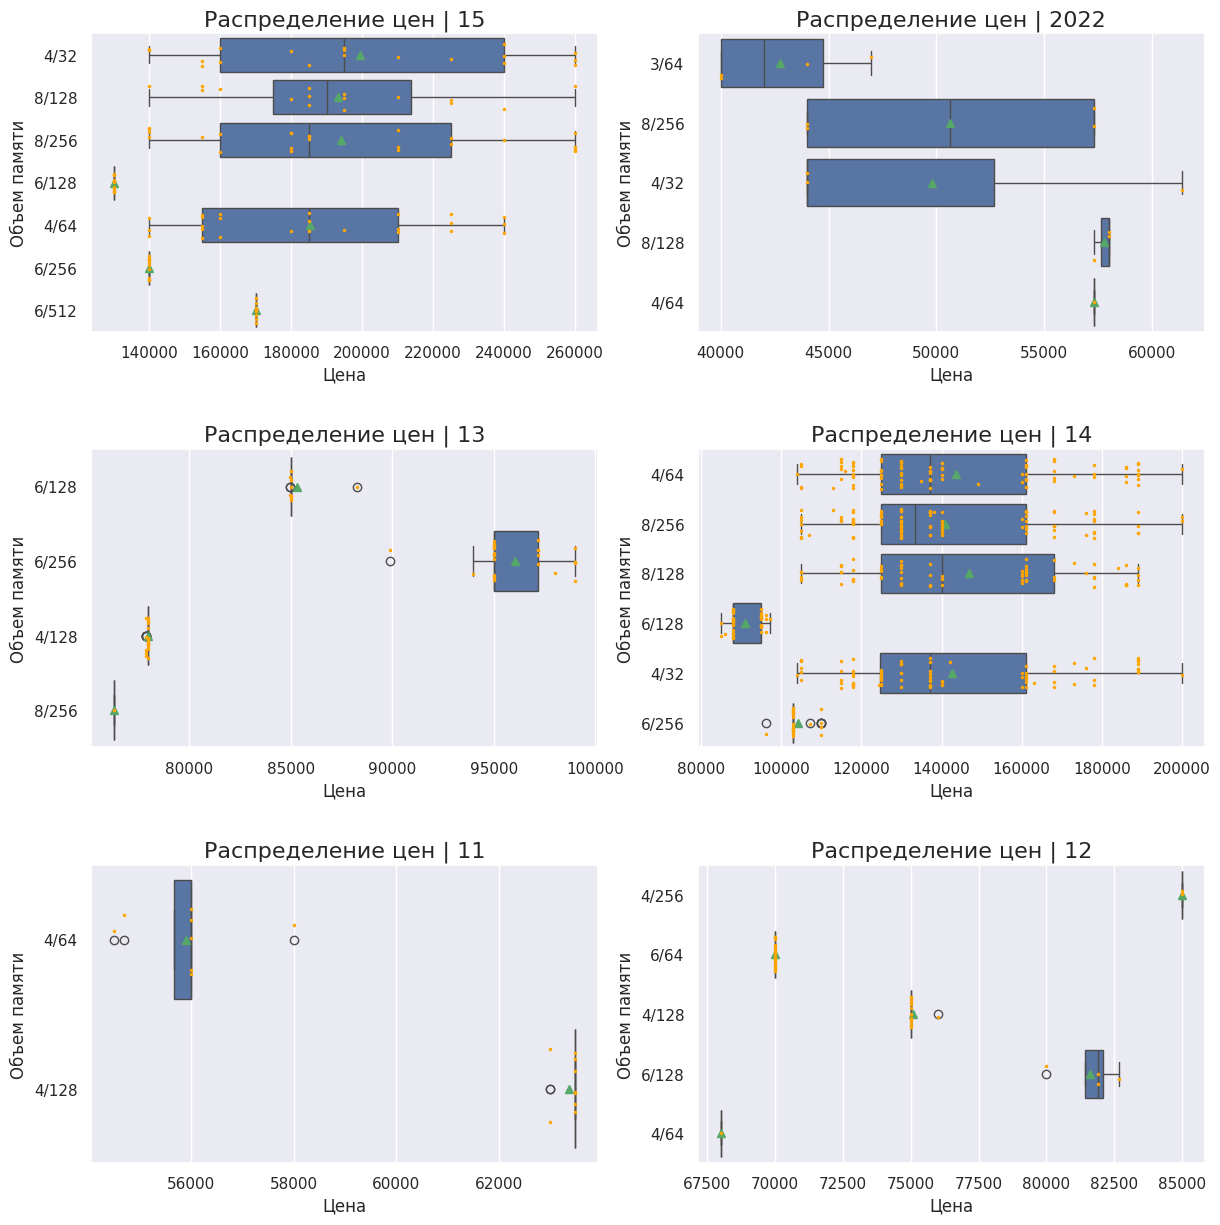

In [66]:
plot_boxes(
    df,
    cols=['series', 'memory', 'price'],
    title='Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=[12, 12]
)

In [67]:
df_prod.loc[df_prod['brand'] == brands[0]] = df

### Выводы по производителю apple:
* Обработали пропуски.
* Исправили неточности в колонке memory.

В результате анализа представленных данных по ценовым сегментам смартфонов Apple можно сделать следующие выводы:
* 12 серия от Apple имеет различные комбинации оперативной и внутренней памяти: 4/128, 4/256, 4/64, 6/128 и 6/64. Цены варьируются от 67 990 до 84 999 рублей.

* 15 серия также имеет различные комбинации памяти: 4/32, 4/64, 6/128, 6/256, 6/512, 8/128 и 8/256. Цены варьируются от 129 999 до 200 832,33 рублей.

* 2022 серия имеет следующие комбинации памяти: 3/64, 4/32, 4/64 и 8/128. Цены варьируются от 42 744,5 до 54 140 рублей.

* 11 серия имеет комбинации памяти: 4/128 и 4/64. Цены варьируются от 55 891,13 до 63 380,89 рублей.

* 13 серия имеет комбинации памяти: 4/128, 4/64, 6/128 и 6/256. Цены варьируются от 76 290 до 96 025 рублей.

* 14 серия имеет комбинации памяти: 4/32, 4/64, 6/128, 6/256, 8/128 и 8/256. Цены варьируются от 90 882,32 до 144 692,64 рублей.

Следовательно, цены на устройства различных серий и комбинаций памяти имеют значительные отличия, анализируя их можно принять решение о покупке, наиболее подходящего устройства с нужными характеристиками.

Производитель нацелен на рынки среднего и премиум сегментов.

## 2. Realme:

In [68]:
brands[1]

'realme'

In [69]:
df = df_prod[df_prod['brand'] == brands[1]]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 1 to 2304
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      155 non-null    int64 
 1   brand   155 non-null    object
 2   model   155 non-null    object
 3   series  34 non-null     object
 4   memory  155 non-null    object
 5   price   155 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 8.5+ KB


В столбце `series` очень много пропусков

In [71]:
df[df['series'].isna()]

id   brand model series memory  price
1     400103320  realme   c55    NaN  6/128  18999
21    400103375  realme   c55    NaN  8/256  20999
28     30065743  realme   c33    NaN  night  14999
33     30065762  realme    10    NaN  8/256  23999
39     30065764  realme    10    NaN  8/128  21999
...         ...     ...   ...    ...    ...    ...
2204  400157124  realme  c30s    NaN     гб   7490
2205  400157125  realme    10    NaN     гб  23590
2207  400157123  realme    10    NaN     гб  22490
2209  400157100  realme   с33    NaN     гб  11790
2304  400181073  realme   pro    NaN  8/128  32890

[121 rows x 6 columns]

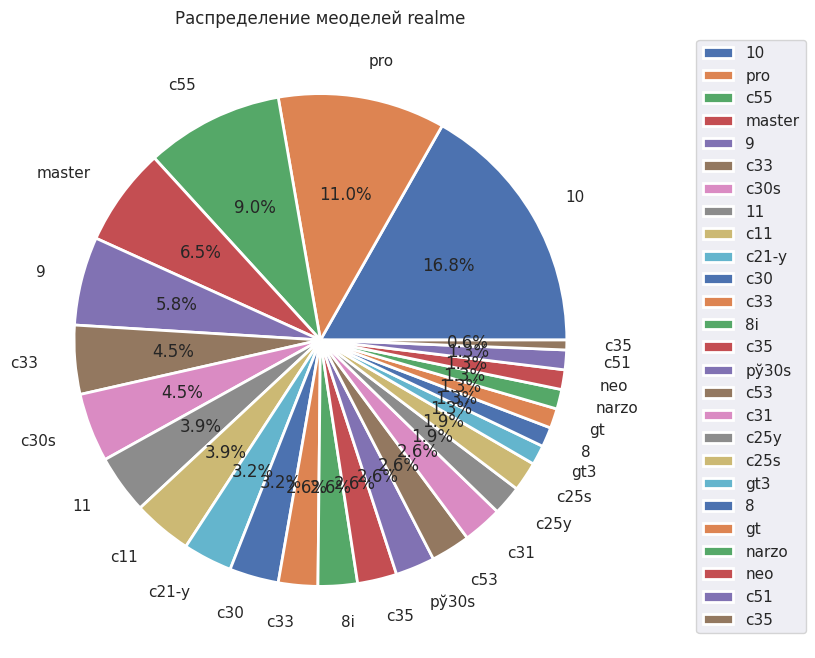

In [72]:
df['model'].value_counts().plot.pie(
    labeldistance=1.15,
    wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
    autopct='%1.1f%%',
    figsize=(8,8),
    ylabel='',
    title='Распределение меоделей realme'
)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

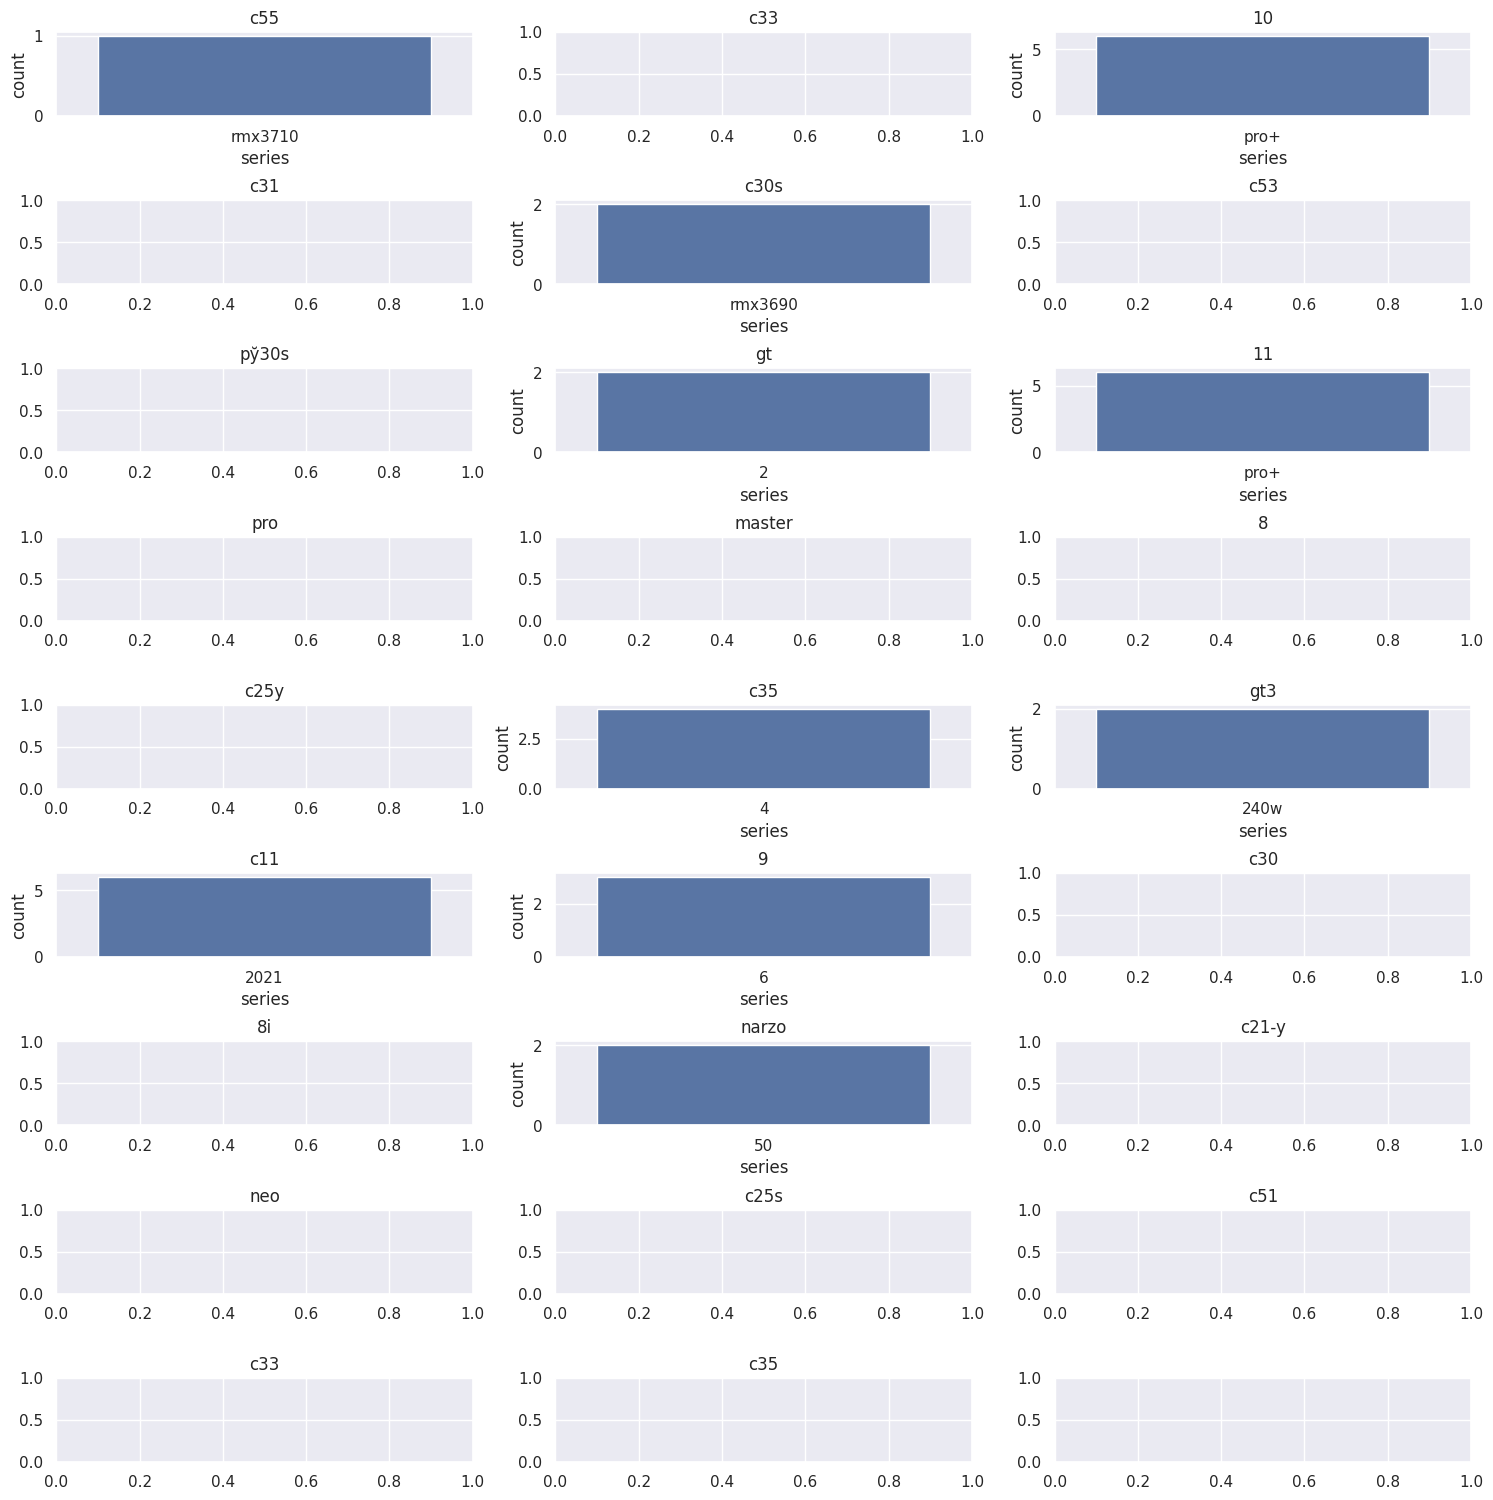

In [73]:
counter_plot(df, 'model', 'series', fs=(15, 15), num_cols=3)

In [74]:
for mod in df['model'].unique():
    print(f"Серии для {mod}:\n{df[df['model'] == mod]['series'].unique()}")

Серии для c55:
[nan 'rmx3710']
Серии для c33:
[nan]
Серии для 10:
[nan 'pro+']
Серии для c31:
[nan]
Серии для c30s:
['rmx3690' nan]
Серии для c53:
[nan]
Серии для рў30s:
[nan]
Серии для gt:
['2']
Серии для 11:
['pro+']
Серии для pro:
[nan]
Серии для master:
[nan]
Серии для 8:
[nan]
Серии для c25y:
[nan]
Серии для c35:
['4']
Серии для gt3:
['240w']
Серии для c11:
['2021']
Серии для 9:
['6' nan]
Серии для c30:
[nan]
Серии для 8i:
[nan]
Серии для narzo:
['50']
Серии для c21-y:
[nan]
Серии для neo:
[nan]
Серии для c25s:
[nan]
Серии для c51:
[nan]
Серии для с33:
[nan]
Серии для с35:
[nan]


Можно заметить, что только у некоторых моделей есть серия, предлагаю заменить все пропуски значениями `standart`

In [75]:
df.loc[df['series'].isna(), 'series'] = df.loc[df['series'].isna(), 'series'].fillna('standart')

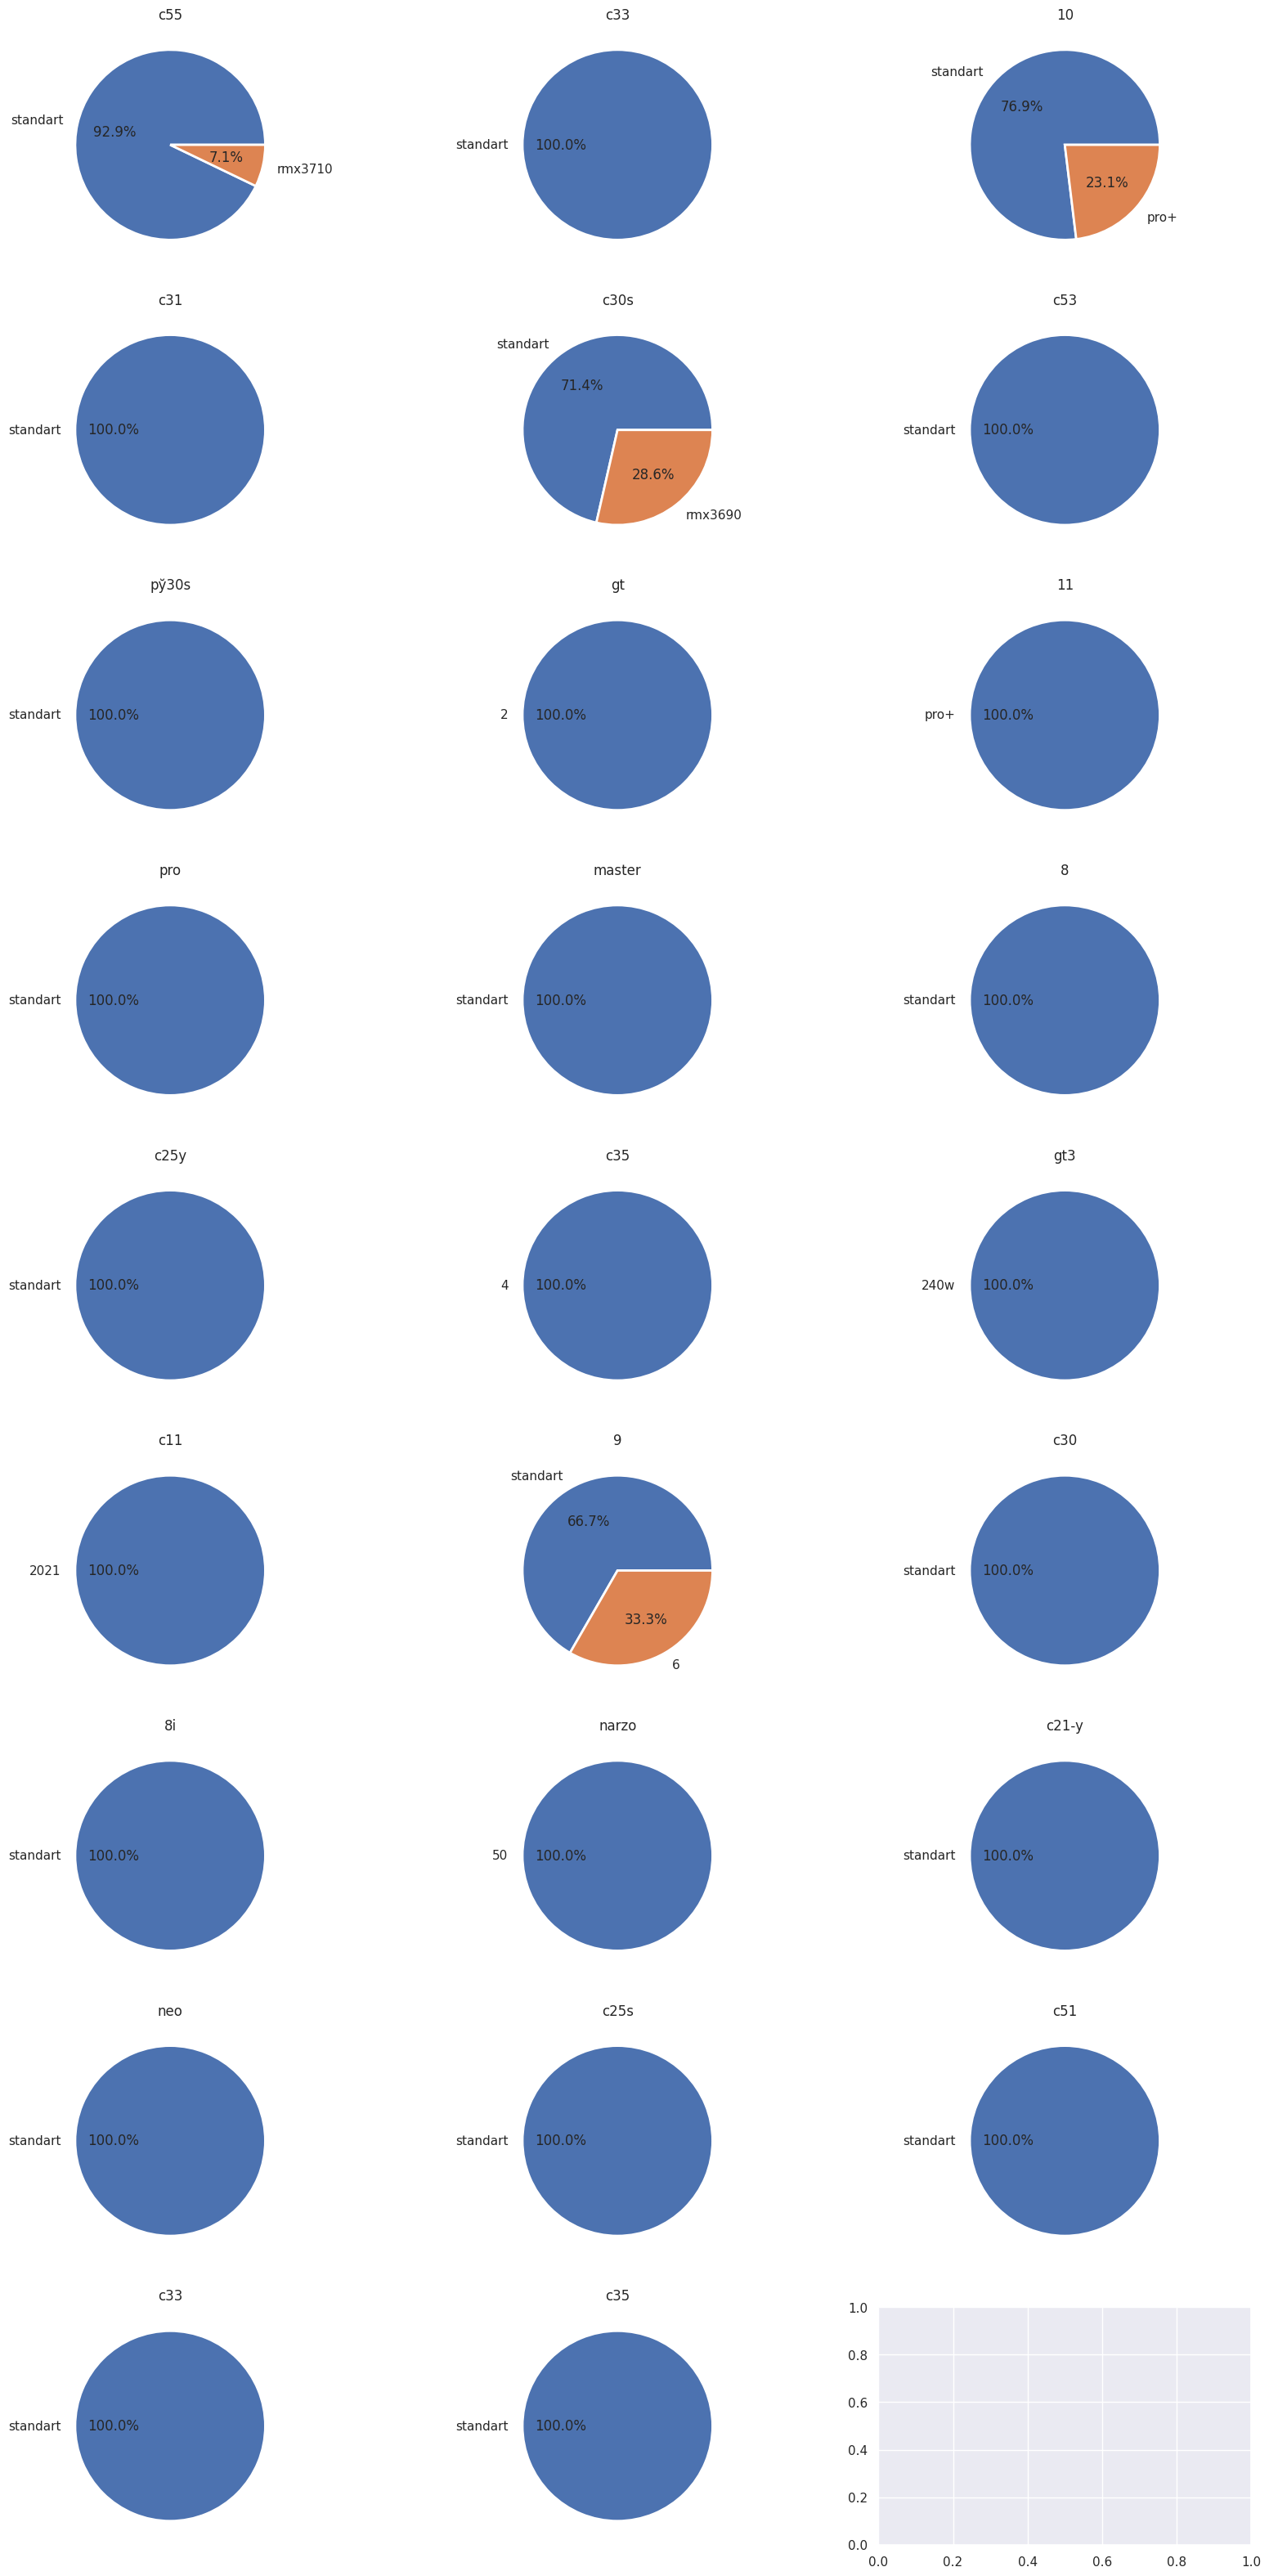

In [76]:
plot_pies(df, 'model', 'series', fs=(20, 40), num_cols=3)

Замечательно, пропуски заполнены.

Теперь посмотрим на столбец `memory`

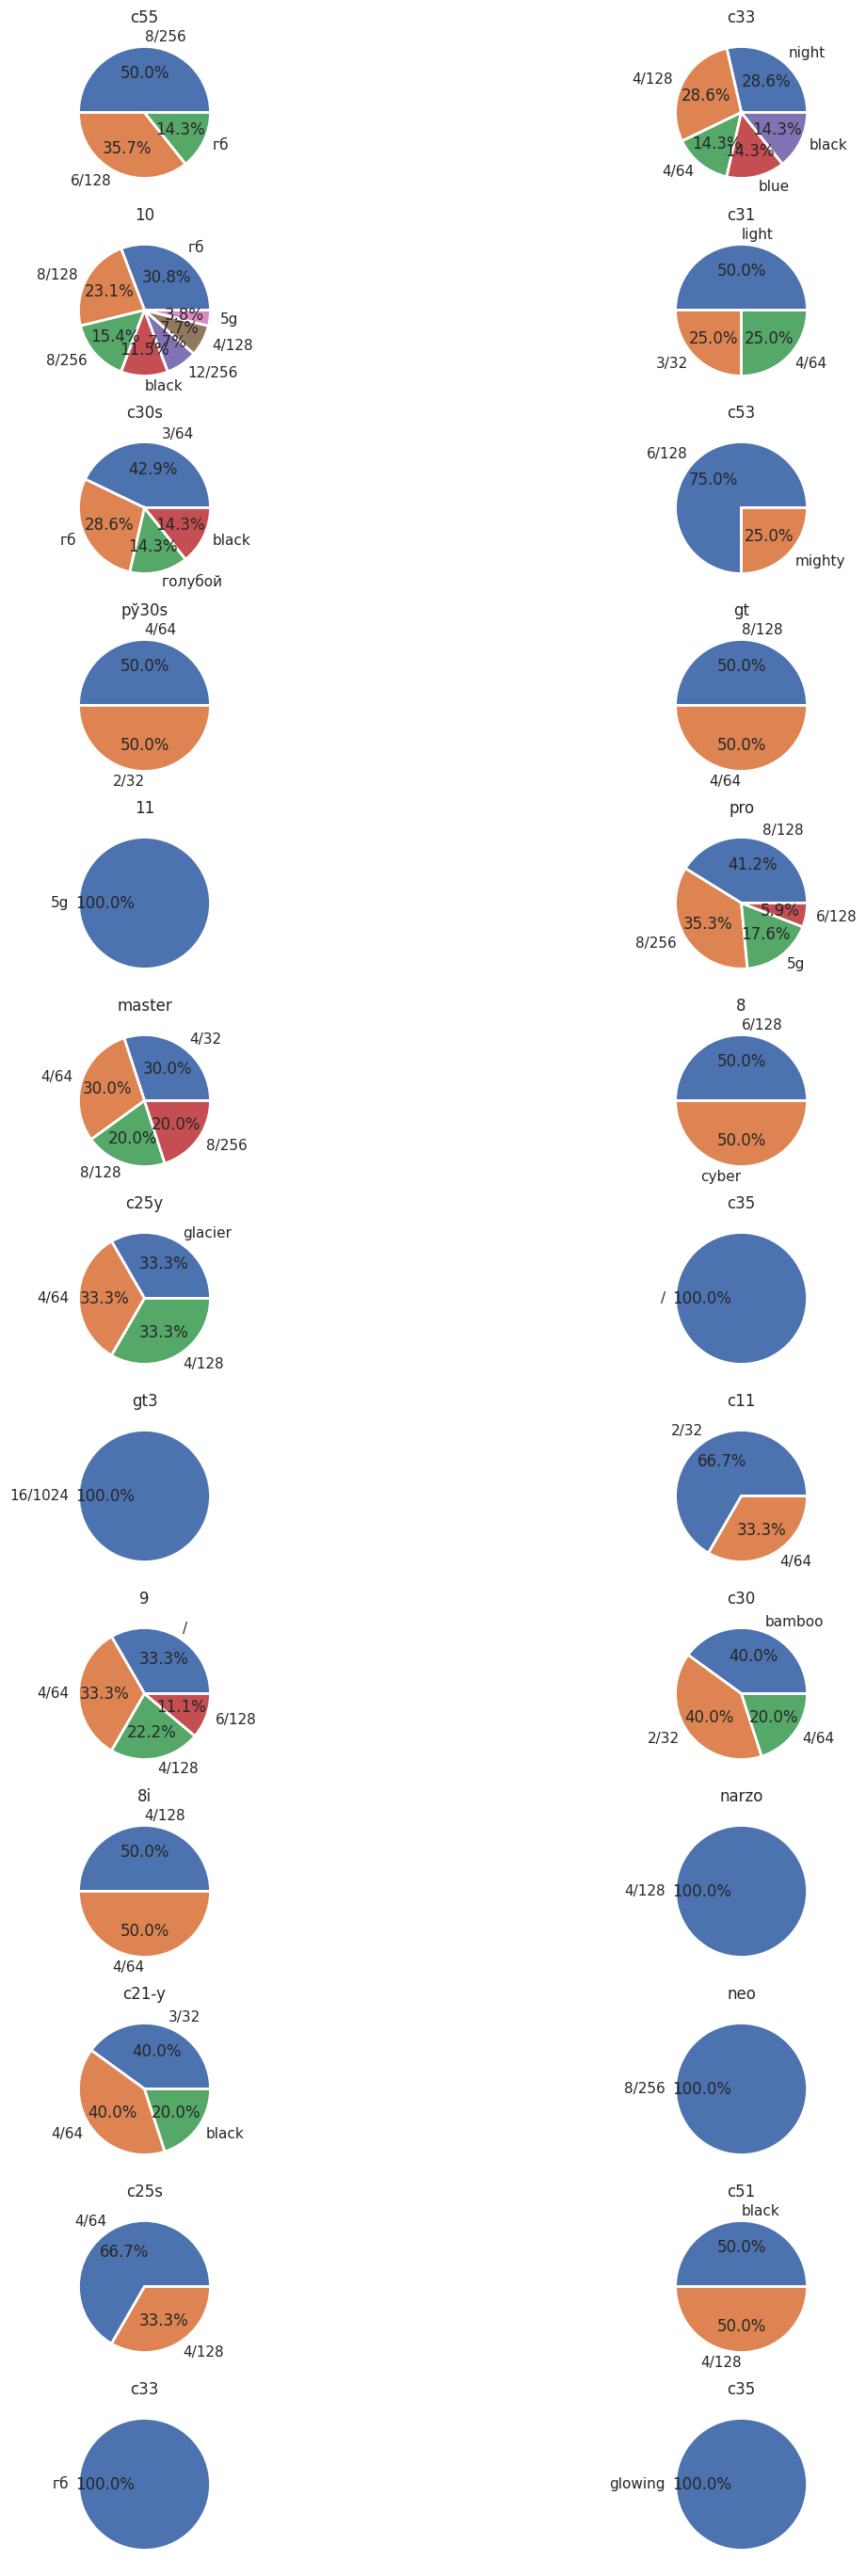

In [77]:
plot_pies(df, 'model', 'memory', fs=(15,35), num_cols=2)

Для всех моделей с ошибками в столбце сделаем 6/32,а значения `гб` необходимо изменить на 6/64.

In [78]:
er = ['black',  '5g', 'bamboo', 'light', 'night', 'glacier', 'cyber', 'mighty', 'blue', 'glowing', 'голубой', '/']

In [79]:
df.loc[df['memory'].isin(er), 'memory'] = '6/32'
df.loc[df['memory'] == 'гб', 'memory'] = '6/64'

In [80]:
df['memory'].unique()

array(['6/128', '8/256', '6/32', '8/128', '3/32', '3/64', '4/64', '4/128',
       '2/32', '4/32', '16/1024', '12/256', '6/64'], dtype=object)

<Axes: >

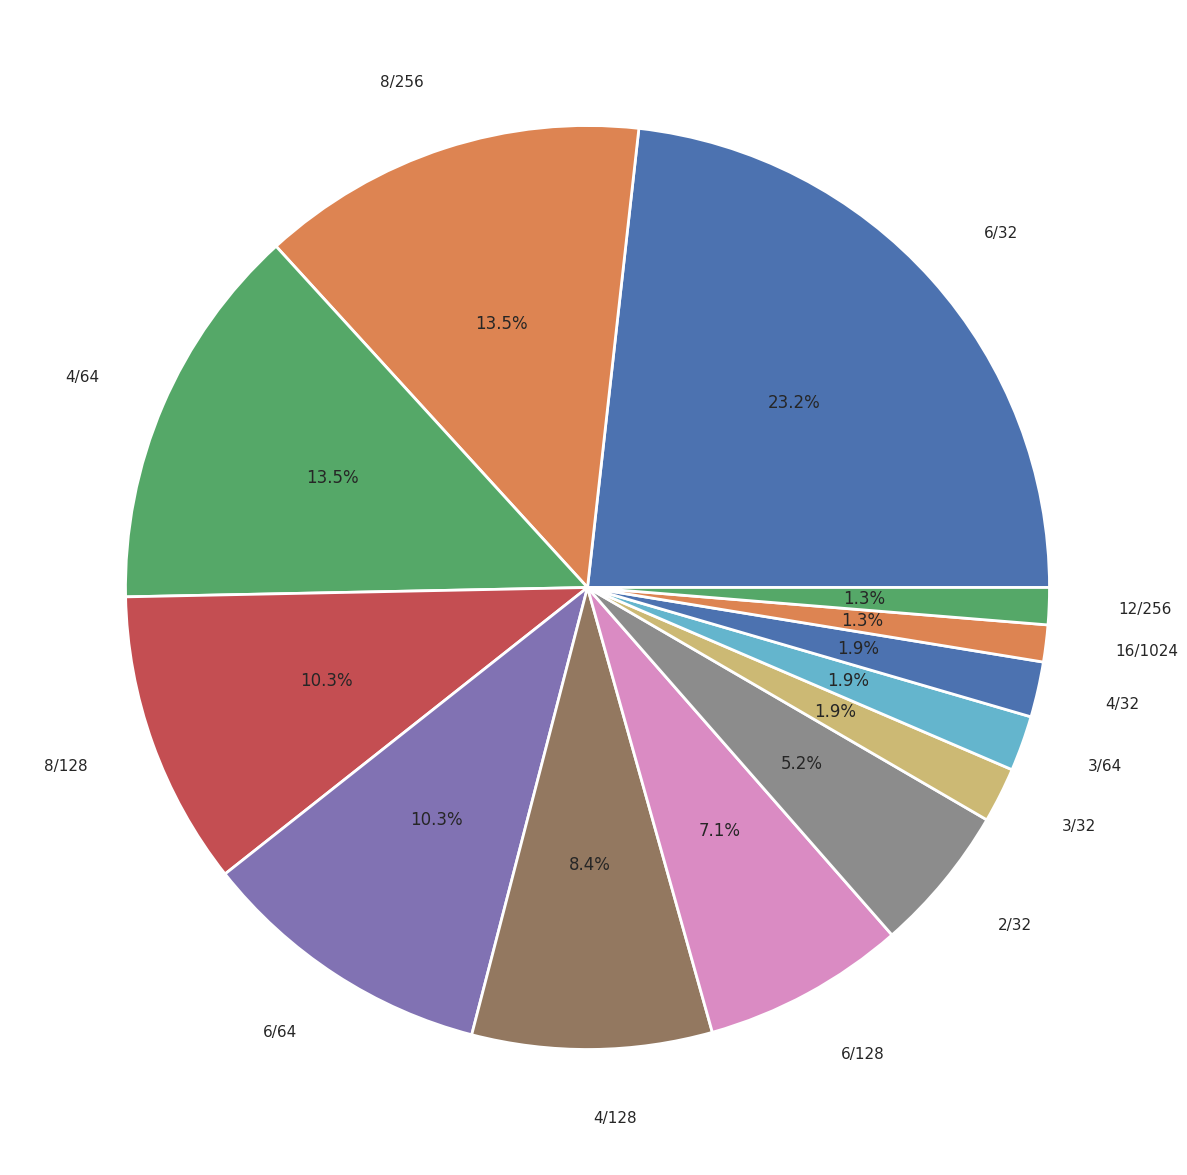

In [81]:
df['memory'].value_counts().plot.pie(
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        autopct='%1.1f%%',
        figsize=(15,15),
        ylabel='',
    )

Так как у бренда `realme` большинство серий равняется `standart`, то нам неообходимо смотреть распределение цены относительно моделей.

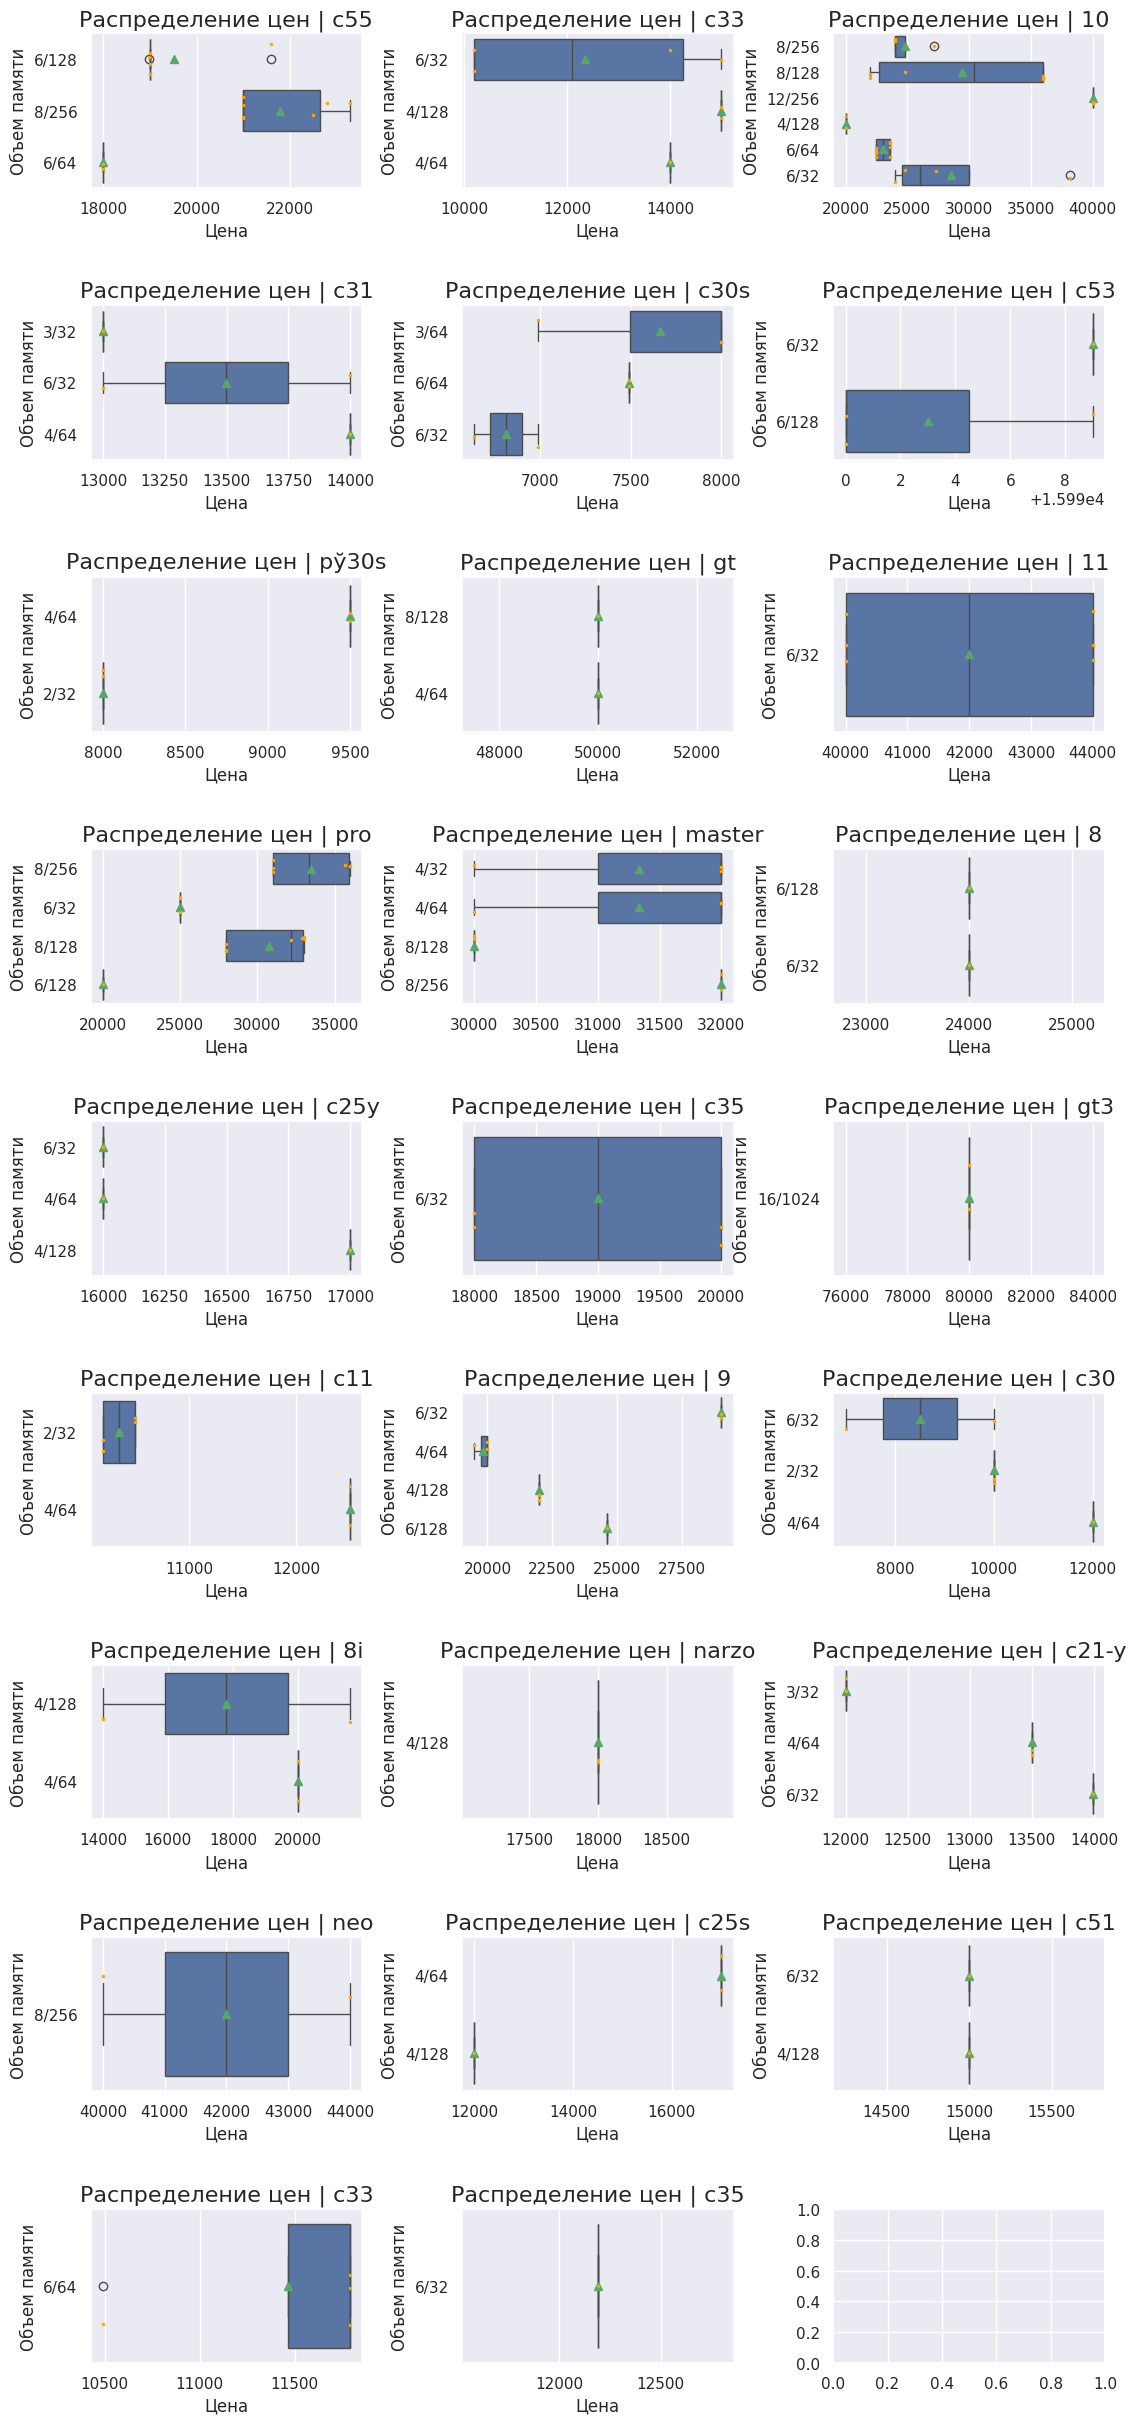

In [82]:
plot_boxes(
    df,
    cols=['model', 'memory', 'price'],
    title=f'Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=(11, 24),
    num_cols=3
)

In [83]:
df_prod.loc[df_prod['brand'] == brands[1]] = df

### Выоды по производителю realme

* Пропуски в series изменены на значение `standart`.
* Все значения  в memory были исправленны.

В результате анализа представленных данных по ценовым сегментам смартфонов Realme можно сделать следующие выводы:
Бюджетный сегмент (до 20к):
- Производитель Realme предлагает следующие модели в бюджетном сегменте: c30s, рў30s, c53, c25y, c35, c11, c30, c21-y, c25s, c51, с33 и с35. Цены на эти модели варьируются от 6815 до 15999 рублей, в зависимости от объема оперативной и внутренней памяти.

Среднего класса смартфоны (от 20к до 80к):
- Производитель Realme предлагает следующие модели в среднем классе: c55, c33, 10, c31, 11, pro, master, 8, 9, 8i, narzo и neo. Цены на эти модели варьируются от 8499 до 49999 рублей, в зависимости от объема оперативной и внутренней памяти.

Премиум-сегмент (от 80к):
- Производитель Realme предлагает следующие модели в премиум-сегменте: gt3 и gt. Цены на эти модели составляют 79999 и 49999 рублей, соответственно. Модель gt3 имеет выдающиеся характеристики с 16 ГБ оперативной памяти и 1024 ГБ внутренней памяти.

Таким образом, производитель Realme представлен во всех сегментах смартфонов. В бюджетном сегменте он предлагает более доступные модели с различными характеристиками. В среднем классе у него есть широкий ассортимент, а в премиум-сегменте представлены модели с более высокими характеристиками и соответственно более высокой ценой.

Производитель нацелен на рынки бюджетного и среднего сегментов.

## 3. Samsung:

In [84]:
brands[2]

'samsung'

In [85]:
df = df_prod[df_prod['brand'] == brands[2]]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585 entries, 2 to 2309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      585 non-null    int64 
 1   brand   585 non-null    object
 2   model   585 non-null    object
 3   series  496 non-null    object
 4   memory  585 non-null    object
 5   price   585 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 32.0+ KB


Есть пропуски в столбце `series`.

In [87]:
df[df['series'].isna()]

id    brand model series memory   price
205    30067949  samsung     z    NaN  8/128  109999
247    30067948  samsung     z    NaN   4/64  109999
282    30067953  samsung     z    NaN  8/256  119999
284    30067947  samsung     z    NaN  8/128  109999
292    30067945  samsung     z    NaN  8/128  199999
...         ...      ...   ...    ...    ...     ...
2074  400179797  samsung     z    NaN  8/128  103990
2075  400179803  samsung     z    NaN  8/128  113990
2123  400164852  samsung   a34    NaN  8/128   28990
2125  400164843  samsung   a54    NaN  8/128   36990
2138  400164848  samsung   a14    NaN   4/64   13990

[89 rows x 6 columns]

In [88]:
df[df['series'].isna()]['model'].value_counts()

model
z      79
a34     5
a54     4
a14     1
Name: count, dtype: int64

У всех моделей `z` стомсостью дороже 115т.р. серия `fold`, ниже `flip`, а у остальных `standart`.

In [89]:
df.loc[(df['model'] == 'z') & (df['price'] > 115_000), 'series'] = 'fold'
df.loc[(df['model'] == 'z') & (df['price'] <= 115_000), 'series'] = 'flip'
df.loc[df['series'].isna(), 'series'] = 'standart'

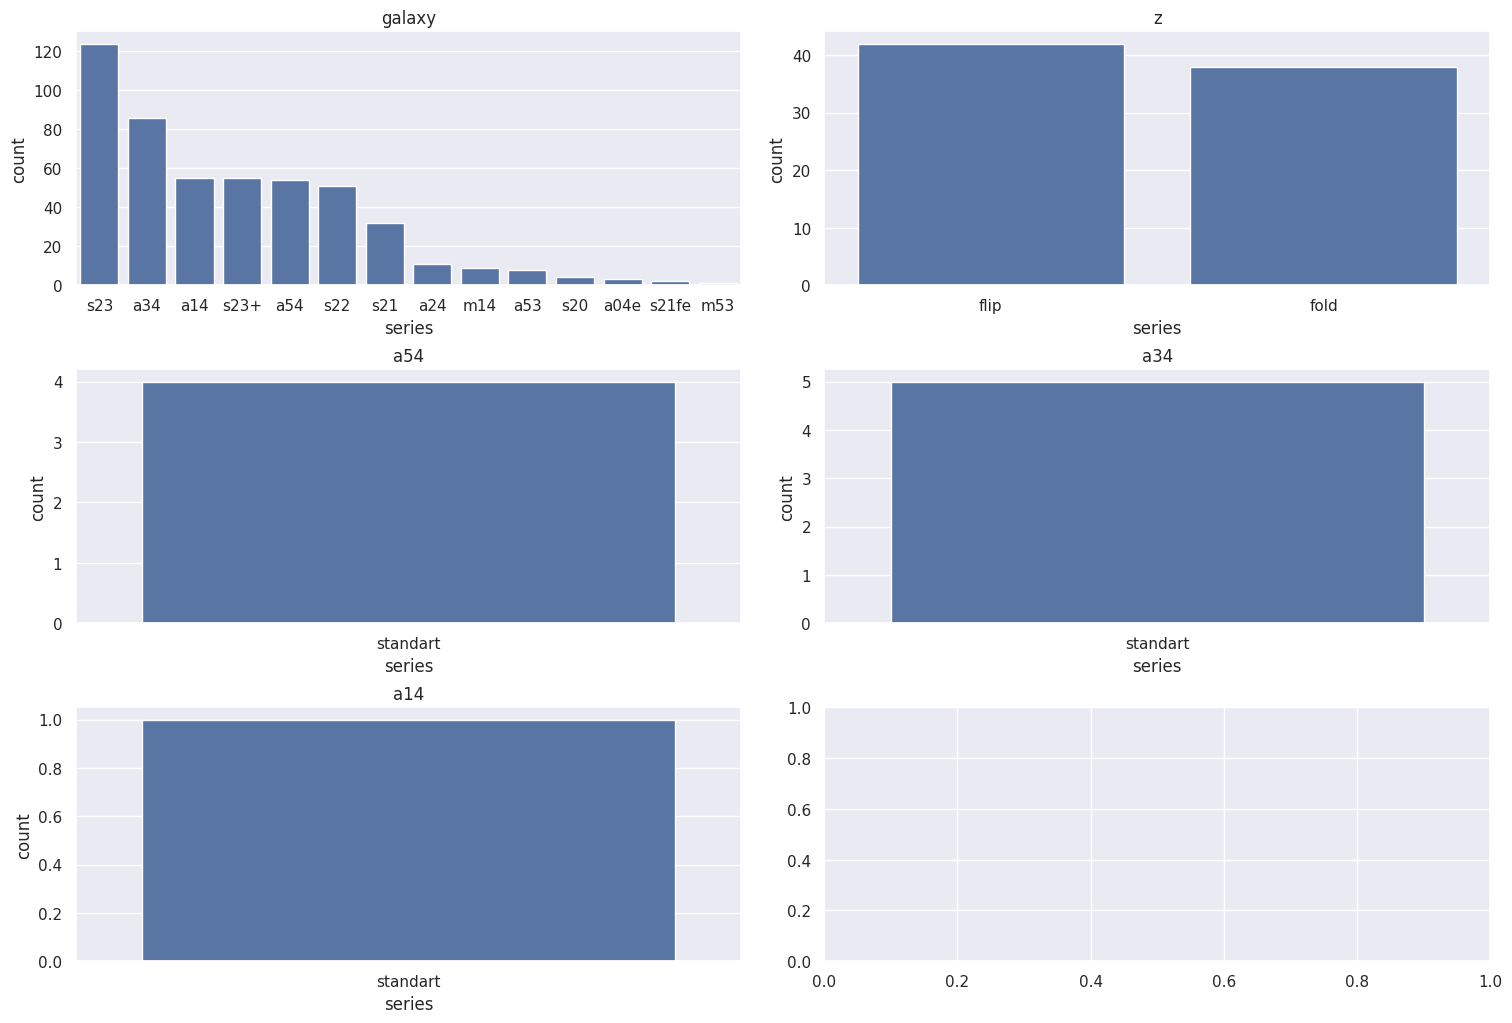

In [90]:
counter_plot(df, 'model', 'series', fs=(15, 10), num_cols=2)

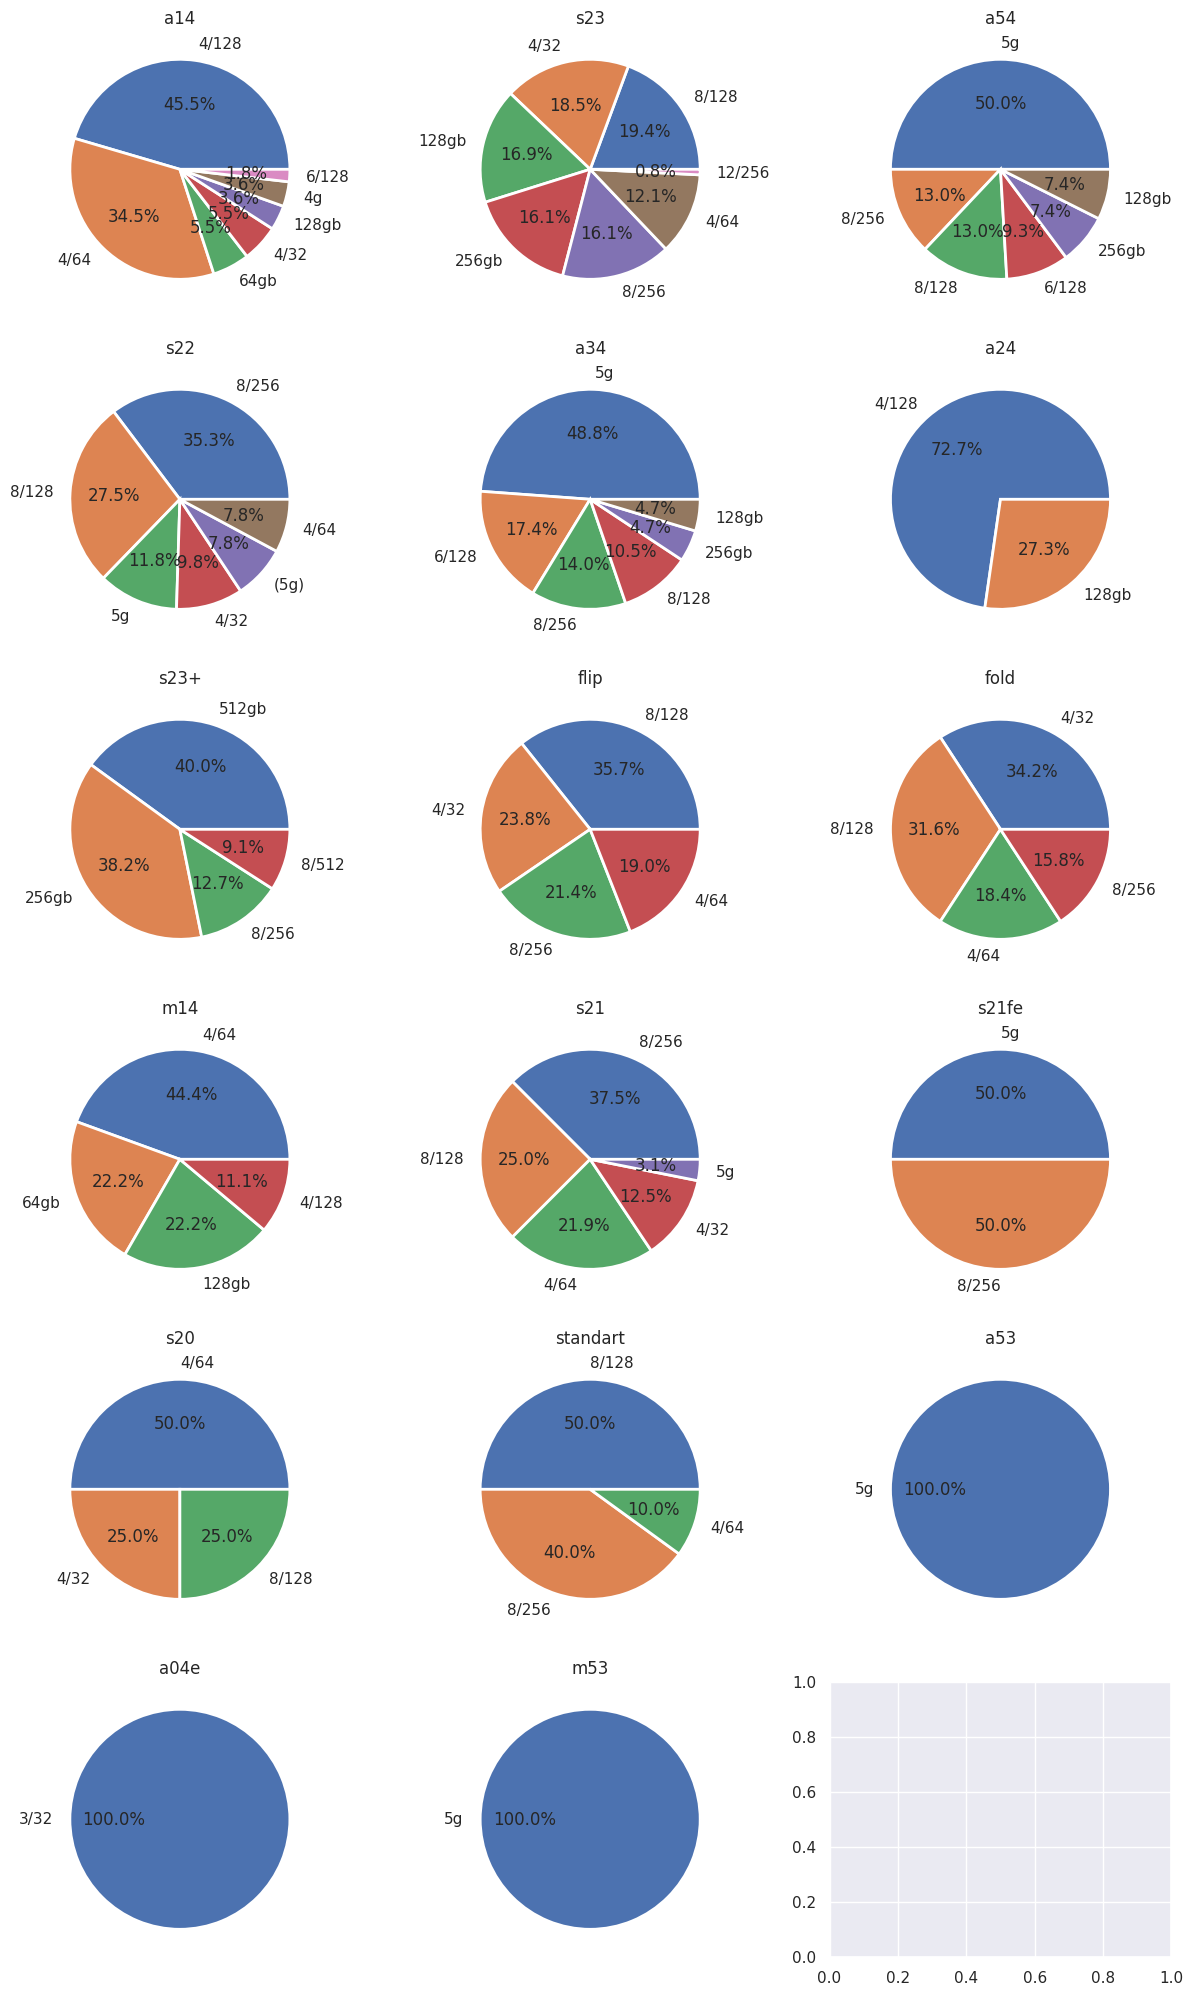

In [91]:
plot_pies(df, 'series', 'memory', num_cols=3, fs=(15,25))

In [92]:
df['memory'].value_counts()

memory
8/256     96
8/128     95
5g        86
4/64      67
4/32      59
256gb     49
128gb     36
4/128     34
512gb     22
6/128     21
64gb       5
8/512      5
(5g)       4
3/32       3
4g         2
12/256     1
Name: count, dtype: int64

In [93]:
df.loc[df['memory'].isin(['5g', '256gb', '128gb', '64gb', '(5g)']), 'series'].value_counts()

series
a34      50
s23      41
a54      35
s23+     21
s22      10
a53       8
a14       5
m14       4
a24       3
s21       1
s21fe     1
m53       1
Name: count, dtype: int64

### A14:

In [94]:
df[df['series'] == 'a14'][['memory', 'price']].groupby('memory').mean()

price
memory              
128gb   16999.000000
4/128   16642.360000
4/32    16790.000000
4/64    14437.368421
4g      15090.000000
6/128   18990.000000
64gb    15999.000000

In [95]:
df.loc[(df['series'] == 'a14') & (df['memory'] == '4g')]

id    brand   model series memory  price
1493  400128540  samsung  galaxy    a14     4g  15190
1569  400140785  samsung  galaxy    a14     4g  14990

У серии  `a14` 4гб оперативной памяти и 64гб внутр.

In [96]:
df.loc[(df['series'] == 'a14') & (df['memory'] == '4g'), 'memory'] = '4/64' 

In [97]:
df.loc[(df['series'] == 'a14') & (df['memory'] == '128gb')]

id    brand   model series memory  price
2    30067400  samsung  galaxy    a14  128gb  16999
158  30067399  samsung  galaxy    a14  128gb  16999

Данные модели имеют 8гб оперативной памяти и 128гб внутр.

In [98]:
df.loc[(df['series'] == 'a14') & (df['memory'] == '128gb'), 'memory'] = '8/128'

In [99]:
df.loc[(df['series'] == 'a14') & (df['memory'] == '64gb')]

id    brand   model series memory  price
14   30067403  samsung  galaxy    a14   64gb  15999
59   30067401  samsung  galaxy    a14   64gb  15999
167  30067402  samsung  galaxy    a14   64gb  15999

6гб оперативной памяти и 64гб внутр.

In [100]:
df.loc[(df['series'] == 'a14') & (df['memory'] == '64gb'), 'memory'] = '6/64'

### S23:

In [101]:
df[df['series'] == 's23'][['memory', 'price']].groupby('memory').mean()

price
memory               
12/256  105990.000000
128gb    74134.571429
256gb    79791.800000
4/32    118684.434783
4/64    114391.800000
8/128   103975.958333
8/256   107561.800000

У моделей 128 и 256 гб внутр. памяти

In [102]:
df[(df['series'] == 's23') & (df['memory'] == '256gb')]

id    brand   model series memory  price
36     30067205  samsung  galaxy    s23  256gb  79999
195    30067201  samsung  galaxy    s23  256gb  79999
235    30067203  samsung  galaxy    s23  256gb  79999
273    30066749  samsung  galaxy    s23  256gb  79999
1118  400088520  samsung  galaxy    s23  256gb  77990
1159  400088573  samsung  galaxy    s23  256gb  77990
1299  400088515  samsung  galaxy    s23  256gb  77990
1398  400088567  samsung  galaxy    s23  256gb  77990
1406  400146934  samsung  galaxy    s23  256gb  77990
1529  400088582  samsung  galaxy    s23  256gb  77990
1604  400146939  samsung  galaxy    s23  256gb  77990
1620  400083914  samsung  galaxy    s23  256gb  84990
1621  400083924  samsung  galaxy    s23  256gb  84990
1886  400088506  samsung  galaxy    s23  256gb  77990
1892  400088512  samsung  galaxy    s23  256gb  77990
1901  400088577  samsung  galaxy    s23  256gb  77990
2179  400083922  samsung  galaxy    s23  256gb  84990
2213  400146927  samsung  galaxy    s23  256gb  77990
2214  400146921  samsung  galaxy    s23  256gb  77990
2288  400083905  samsung  galaxy    s23  256gb  84990

У хаписей с `128gb` и `256gb` по 8 гб оперативной памяти

In [103]:
df.loc[(df['series'] == 's23') & ((df['memory'] == '256gb')), 'memory'] = '8/256'
df.loc[(df['series'] == 's23') & ((df['memory'] == '128gb')), 'memory'] = '8/128'

### A54:

In [104]:
df[df['series'] == 'a54'][['memory', 'price']].groupby('memory').mean()

price
memory              
128gb   34999.000000
256gb   39699.000000
5g      36671.481481
6/128   36010.000000
8/128   38475.714286
8/256   41032.857143

In [105]:
df[(df['series'] == 'a54') & (df['memory'] == '256gb')]

id    brand   model series memory  price
46   30067243  samsung  galaxy    a54  256gb  39999
75   30067245  samsung  galaxy    a54  256gb  39999
175  30067246  samsung  galaxy    a54  256gb  38799
226  30067244  samsung  galaxy    a54  256gb  39999

У данных моделей 8 гб оперативной памяти

In [106]:
df.loc[(df['series'] == 'a54') & (df['memory'] == '256gb'), 'memory'] = '8/256'

In [107]:
df.loc[(df['series'] == 'a54') & (df['memory'] == '128gb')]

id    brand   model series memory  price
77   30067380  samsung  galaxy    a54  128gb  34999
357  30067247  samsung  galaxy    a54  128gb  34999
361  30067248  samsung  galaxy    a54  128gb  34999
374  30067249  samsung  galaxy    a54  128gb  34999

У данных смартфонов 6гб оперативной памяти.

In [108]:
df.loc[(df['series'] == 'a54') & (df['memory'] == '128gb'), 'memory'] = '6/128'

In [109]:
df.loc[(df['series'] == 'a54') & (df['memory'] == '5g')]

id    brand   model series memory  price
1007  400121751  samsung  galaxy    a54     5g  44890
1018  400140900  samsung  galaxy    a54     5g  35790
1036  400140888  samsung  galaxy    a54     5g  35790
1111  400141053  samsung  galaxy    a54     5g  35790
1130  400164102  samsung  galaxy    a54     5g  36990
1172  400140775  samsung  galaxy    a54     5g  35790
1175  400141068  samsung  galaxy    a54     5g  35790
1217  400164103  samsung  galaxy    a54     5g  36990
1314  400140880  samsung  galaxy    a54     5g  35790
1316  400140893  samsung  galaxy    a54     5g  33990
1338  400140779  samsung  galaxy    a54     5g  35790
1346  400141067  samsung  galaxy    a54     5g  35790
1400  400140789  samsung  galaxy    a54     5g  33990
1444  400163879  samsung  galaxy    a54     5g  36990
1536  400121749  samsung  galaxy    a54     5g  44890
1550  400140894  samsung  galaxy    a54     5g  35790
1567  400140904  samsung  galaxy    a54     5g  33990
1568  400140750  samsung  galaxy    a54     5g  35790
1630  400140777  samsung  galaxy    a54     5g  33990
1961  400140890  samsung  galaxy    a54     5g  35790
1963  400141118  samsung  galaxy    a54     5g  39990
2040  400140774  samsung  galaxy    a54     5g  35790
2041  400140778  samsung  galaxy    a54     5g  33990
2088  400141071  samsung  galaxy    a54     5g  33990
2090  400141087  samsung  galaxy    a54     5g  35790
2097  400141043  samsung  galaxy    a54     5g  33990
2183  400143230  samsung  galaxy    a54     5g  46190

У моделей с ценником ниже 39тр 6гб озу и 128 внутр.

У остальных 8гб озу и 256 внутр.

In [110]:
df.loc[(df['series'] == 'a54') & (df['memory'] == '5g') & (df['price'] < 39_000), 'memory'] = '6/128'
df.loc[(df['series'] == 'a54') & (df['memory'] == '5g') & (df['price'] >= 39_000), 'memory'] = '8/256'

### A34:

In [111]:
df.loc[df['series'] == 'a34'][['memory', 'price']].groupby('memory').mean()

price
memory              
128gb   27999.000000
256gb   32999.000000
5g      29425.714286
6/128   29023.333333
8/128   31056.666667
8/256   33756.666667

In [112]:
df.loc[(df['series'] == 'a34') & (df['memory'] == '256gb')]

id    brand   model series memory  price
54   30067384  samsung  galaxy    a34  256gb  32999
272  30067381  samsung  galaxy    a34  256gb  32999
373  30067383  samsung  galaxy    a34  256gb  32999
429  30067382  samsung  galaxy    a34  256gb  32999

У данных моделей 8гб озу

In [113]:
df.loc[(df['series'] == 'a34') & (df['memory'] == '256gb'), 'memory'] = '8/256'

In [114]:
df.loc[(df['series'] == 'a34') & (df['memory'] == '128gb')]

id    brand   model series memory  price
97   30067387  samsung  galaxy    a34  128gb  27999
98   30067386  samsung  galaxy    a34  128gb  27999
105  30067385  samsung  galaxy    a34  128gb  27999
173  30067388  samsung  galaxy    a34  128gb  27999

У данных моделей 6гб озу

In [115]:
df.loc[(df['series'] == 'a34') & (df['memory'] == '128gb'), 'memory'] = '6/128'

In [116]:
df.loc[(df['series'] == 'a34') & (df['memory'] == '5g') & (df['price'] < 28_000), 'memory'] = '6/128'
df.loc[(df['series'] == 'a34') & (df['memory'] == '5g') & (df['price'] >= 28_000) & (df['price'] < 31_000), 'memory'] = '8/128'
df.loc[(df['series'] == 'a34') & (df['memory'] == '5g') & (df['price'] >= 31_000), 'memory'] = '8/256'

### S23+:

In [117]:
df.loc[df['series'] == 's23+'][['memory', 'price']].groupby('memory').mean()

price
memory              
256gb   89706.000000
512gb   98719.727273
8/256   89249.714286
8/512   96790.000000

In [118]:
df.loc[(df['series'] == 's23+') & (df['memory'] == '256gb'), 'memory'] = '8/256'
df.loc[(df['series'] == 's23+') & (df['memory'] == '512gb'), 'memory'] = '8/512'

### S22:

In [119]:
df.loc[df['series'] == 's22'][['memory', 'price']].groupby('memory').mean()

price
memory              
(5g)    56324.000000
4/32    83790.000000
4/64    78990.000000
5g      57661.166667
8/128   77812.714286
8/256   68768.777778

In [120]:
df.loc[(df['series'] == 's22') & (df['memory'].isin(['(5g)', '5g'])), 'memory'] = '4/32'

### A53:

In [121]:
df.loc[df['series'] == 'a53'][['memory', 'price']].groupby('memory').mean()

price
memory         
5g      34240.0

Данные модели оснащены 8гб озу и 256гб внутр

In [122]:
df.loc[(df['series'] == 'a53') & (df['memory'] == '5g'), 'memory'] = '8/256'

### A24:

In [123]:
df.loc[df['series'] == 'a24'][['memory', 'price']].groupby('memory').mean()

price
memory           
128gb   22999.000
4/128   21580.875

In [124]:
df.loc[(df['series'] == 'a24') & (df['memory'] == '128gb'), 'memory'] = '4/128'

### M14:

In [125]:
df.loc[df['series'] == 'm14'][['memory', 'price']].groupby('memory').mean()

price
memory         
128gb   19599.0
4/128   20290.0
4/64    18390.0
64gb    17599.0

In [126]:
df.loc[(df['series'] == 'm14') & (df['memory'] == '128gb'), 'memory'] = '4/128'
df.loc[(df['series'] == 'm14') & (df['memory'] == '64gb'), 'memory'] = '4/64'

### S21fe:

In [127]:
df.loc[df['series'] == 's21fe'][['memory', 'price']].groupby('memory').mean()

price
memory         
5g      46899.0
8/256   49990.0

In [128]:
df.loc[(df['series'] == 's21fe') & (df['memory'] == '5g'), 'memory'] = '8/256'

### S21:

In [129]:
df.loc[df['series'] == 's21'][['memory', 'price']].groupby('memory').mean()

price
memory              
4/32    48692.250000
4/64    46835.428571
5g      47999.000000
8/128   47391.125000
8/256   47407.416667

In [130]:
df.loc[(df['series'] == 's21') & (df['memory'] == '5g'), 'memory'] = '8/256'

### M53:

In [131]:
df.loc[df['series'] == 'm53'][['memory', 'price']].groupby('memory').mean()

price
memory         
5g      30790.0

Данные модели оснащены 8гб озу и 256гб внутр

In [132]:
df.loc[(df['series'] == 'm53') & (df['memory'] == '5g'), 'memory'] = '8/256'

<Axes: >

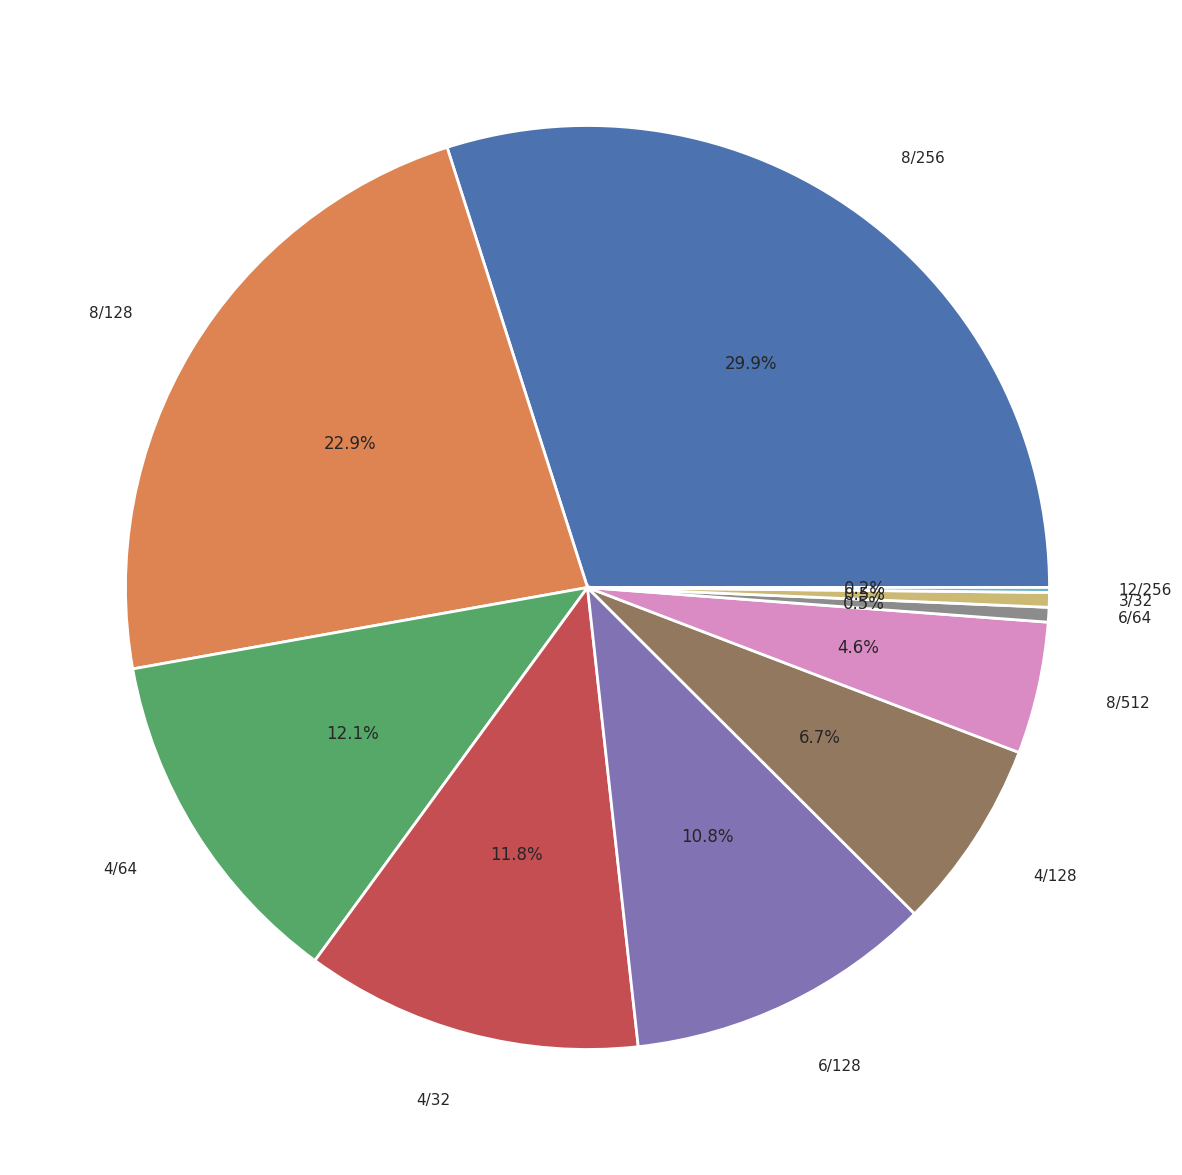

In [133]:
df['memory'].value_counts().plot.pie(
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        autopct='%1.1f%%',
        figsize=(15,15),
        ylabel='',
    )

Теперь, когда данные отредактированны, посмотрим на распределение цен по серии смартфонов.

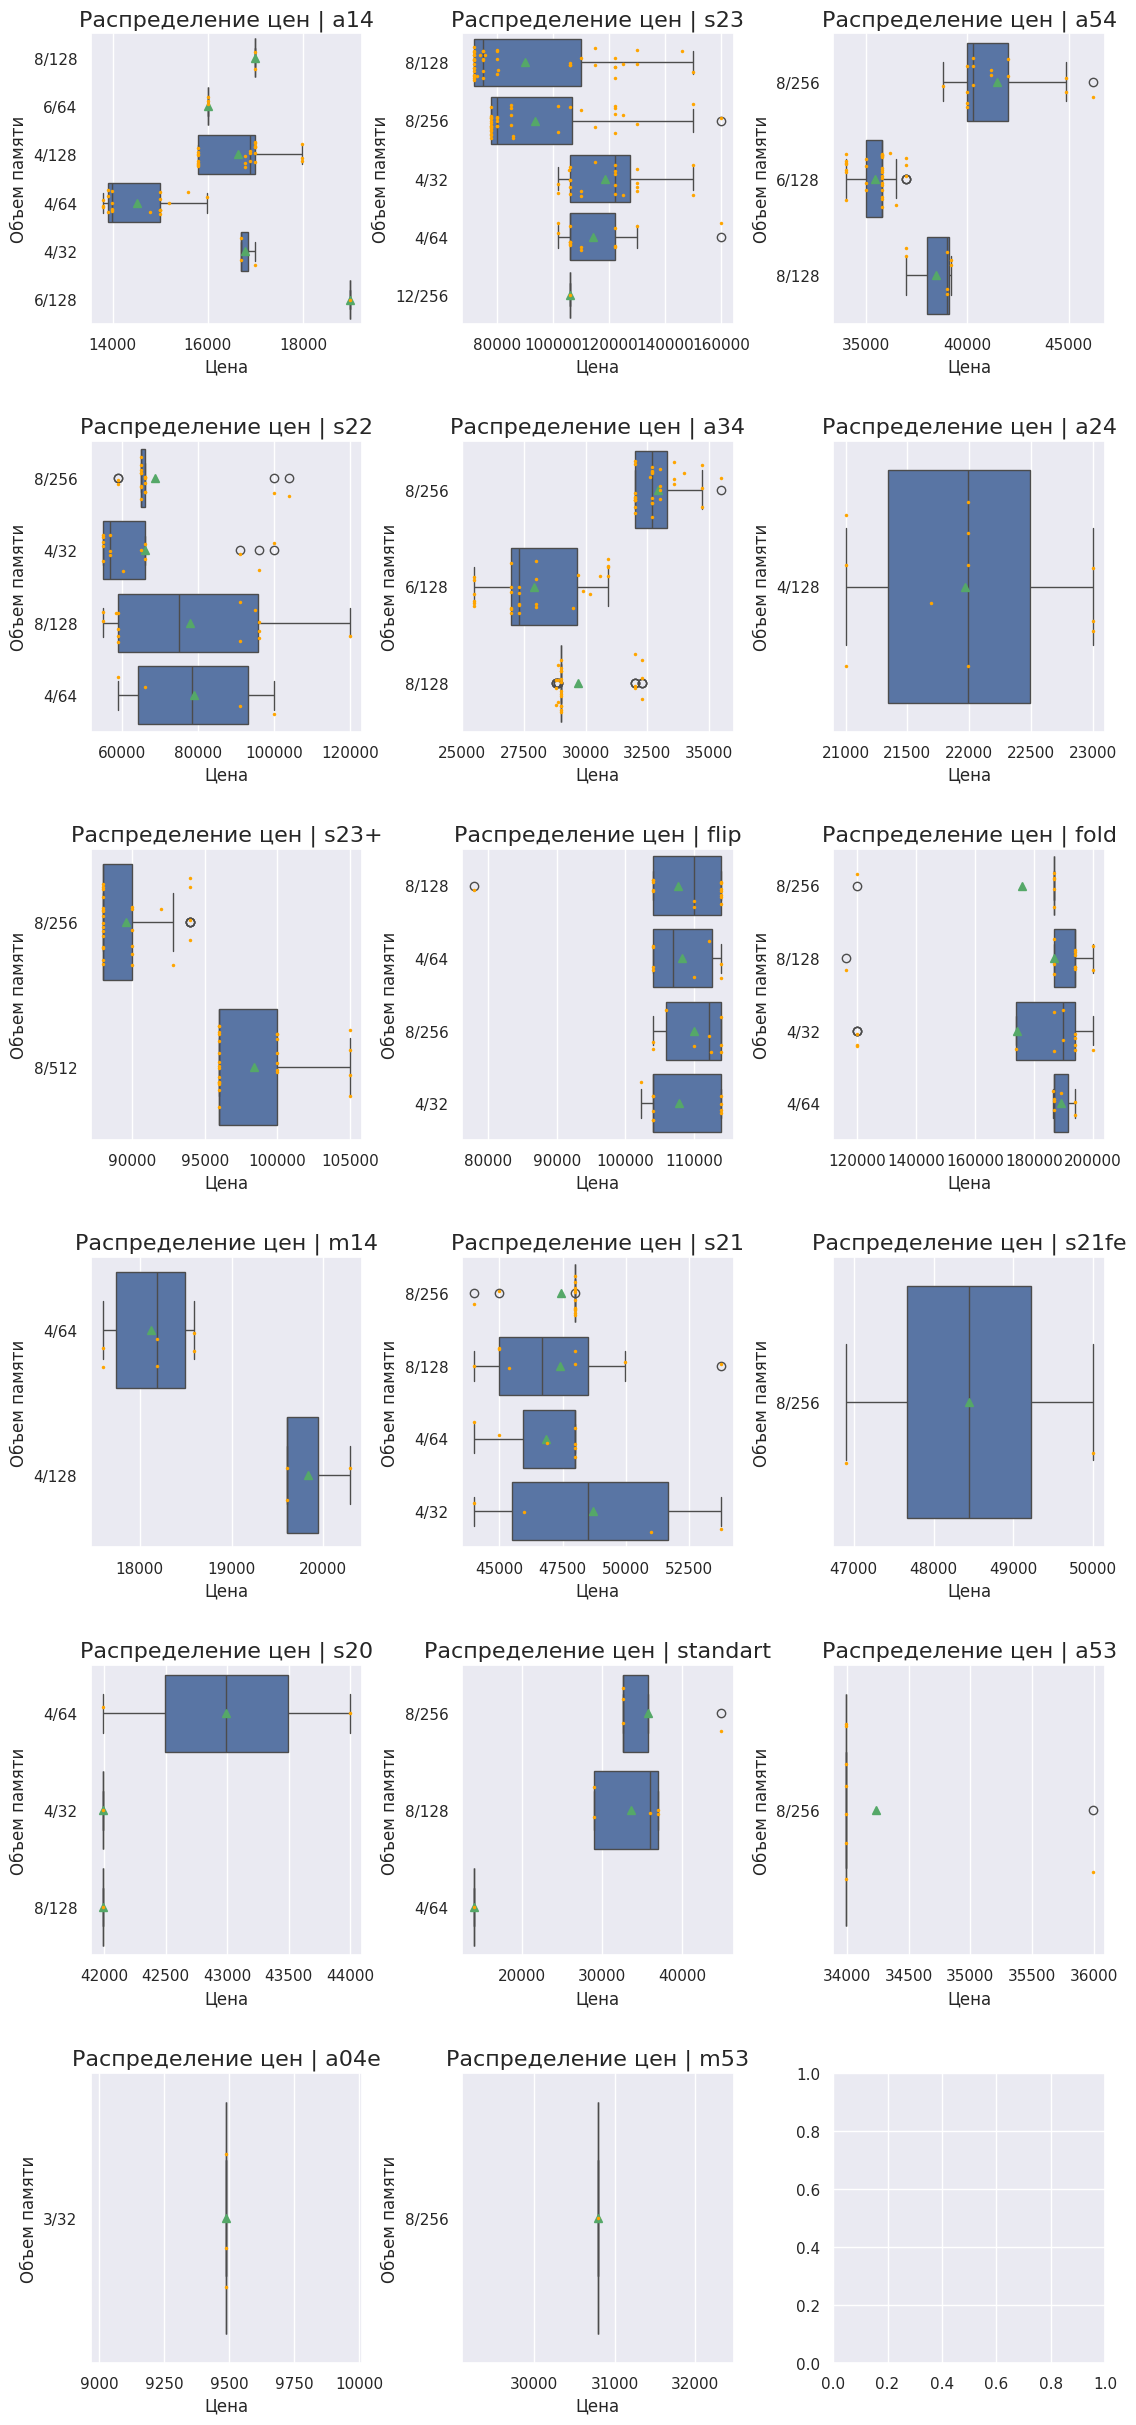

In [134]:
plot_boxes(
    df,
    cols=['series', 'memory', 'price'],
    title=f'Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=(11, 24),
    num_cols=3
)

### Выводы по производителю Samsung:

* Пропуски в series обработаны.
* Все значения  в memory были исправленны.

Из предоставленной информации о памяти и цене для различных моделей Samsung можно сделать следующие выводы:

Бюджетный сегмент (до 20 000 рублей):
- В данном сегменте представлены модели A14 и A24.
- Модель A14 имеет различные варианты комплектации памяти, от 4 ГБ оперативной памяти и 64 ГБ внутренней памяти до 8 ГБ оперативной памяти и 256 ГБ внутренней памяти. Средняя цена варьируется от 14 612,73 до 18 842,36 рублей.
- Модель A24 имеет 4 ГБ оперативной памяти и 128 ГБ внутренней памяти средней ценой окол 21 967 рублей. 

Средний класс смартфонов (от 20 000 до 80 000 рублей):
- В данном сегменте представлены модели A53, A54, A34, M14, S21, и M53.
- У этих моделей также есть разные варианты памяти. Например, модель A54 имеет от 6 ГБ оперативной памяти и 128 ГБ внутренней памяти до 8 ГБ оперативной памяти и 256 ГБ внутренней памяти. Средние цены для этих моделей колеблются от 27 891,20 рублей до 41 465,73 рублей.

Премиум-сегмент (от 80 000 рублей):
- В данном сегменте представлены модели S23, S23+, S22, и S21fe.
- Эти модели имеют более высокие характеристики и цены. Например, модель S23 имеет от 4 ГБ оперативной памяти и 64 ГБ внутренней памяти до 12 ГБ оперативной памяти и 256 ГБ внутренней памяти. Средняя цена для модели S23 составляет 105 990 рублей.

Можно сделать вывод, что цены на устройства с различными комбинациями памяти варьируются в зависимости от модели Samsung. Различные модели имеют различный диапазон цен в зависимости от характеристик, что позволяет выбрать устройство с подходящей памятью и ценой для конкретных потребностей.

Производитель охватывает все 3 рынка.

In [135]:
df_prod.loc[df_prod['brand'] == brands[2]] = df

## 4. Xiaomi:

In [136]:
brands[3]

'xiaomi'

In [137]:
df = df_prod[df_prod['brand'] == brands[3]]

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 5 to 2303
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      306 non-null    int64 
 1   brand   306 non-null    object
 2   model   306 non-null    object
 3   series  144 non-null    object
 4   memory  306 non-null    object
 5   price   306 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 16.7+ KB


Есть пропуски в колонке 'series'.

In [139]:
df.loc[df['series'].isna(), 'model'].value_counts()

model
note     92
pro      17
redmi    13
lite     11
12x       7
12t       6
11t       6
12        4
ultra     2
blue      2
13        1
10a       1
Name: count, dtype: int64

In [140]:
df.loc[df['model'] == 'blue', 'model'] = '12'

Модели Note:
* до 17 - note 10S
* От 17 до 20 - note 12
* От 20 до 25 - note 12S
* От 25 до 30 - note 11Pro
* От 30 до 37 - note 12Pro
* От 37 - note 12Pro+

In [141]:
df.loc[df['series'].isna() & (df['model'] == 'note') & (df['price'] < 17_000), 'series'] = '10S'
df.loc[df['series'].isna() & (df['model'] == 'note') & (df['price'] >= 17_000) & (df['price'] < 20_000), 'series'] = '12'
df.loc[df['series'].isna() & (df['model'] == 'note') & (df['price'] >= 20_000) & (df['price'] < 25_000), 'series'] = '12S'
df.loc[df['series'].isna() & (df['model'] == 'note') & (df['price'] >= 25_000) & (df['price'] < 30_000), 'series'] = '11Pro'
df.loc[df['series'].isna() & (df['model'] == 'note') & (df['price'] >= 30_000) & (df['price'] < 37_000), 'series'] = '12Pro'
df.loc[df['series'].isna() & (df['model'] == 'note') & (df['price'] >= 37_000), 'series'] = '12Pro+'

Модели pro:
* до 72к - F5
* 72-85 - 12
* Все что выше - 13T

In [142]:
df.loc[df['series'].isna() & (df['model'] == 'pro') & (df['price'] < 72_000), 'series'] = 'F5'
df.loc[df['series'].isna() & (df['model'] == 'pro') & (df['price'] >= 72_000) & (df['price'] < 85_000), 'series'] = '12'
df.loc[df['series'].isna() & (df['model'] == 'pro') & (df['price'] >= 85_000), 'series'] = '13T'

модели redmi:
* до 10к - 9
* от 10 до 12,5 - 12с
* от 12,5 до 18 - 10
* выше - 12

In [143]:
df.loc[df['series'].isna() & (df['model'] == 'redmi') & (df['price'] < 10_000), 'series'] = '9'
df.loc[df['series'].isna() & (df['model'] == 'redmi') & (df['price'] >= 10_000) & (df['price'] < 12_500), 'series'] = '12c'
df.loc[df['series'].isna() & (df['model'] == 'redmi') & (df['price'] >= 12_500) & (df['price'] < 18_000), 'series'] = '10'
df.loc[df['series'].isna() & (df['model'] == 'redmi') & (df['price'] >= 18_000), 'series'] = '12'

Модели lite:
* до 23к - 11
* 23-41 - 12
* выше - 13

In [144]:
df.loc[df['series'].isna() & (df['model'] == 'lite') & (df['price'] < 23_000), 'series'] = '11'
df.loc[df['series'].isna() & (df['model'] == 'lite') & (df['price'] >= 23_000) & (df['price'] < 41_000), 'series'] = '12'
df.loc[df['series'].isna() & (df['model'] == 'lite') & (df['price'] >= 41_000), 'series'] = '12'

In [145]:
df.loc[df['model'] == 'lite']

id   brand model series memory  price
293   400085373  xiaomi  lite     12  8/256  49999
434   400085365  xiaomi  lite     12  8/256  49999
440   400085361  xiaomi  lite     12  8/256  49999
450    30061198  xiaomi  lite     11     5g  22999
530    30063159  xiaomi  lite     12  128gb  40999
559    30059672  xiaomi  lite     11     5g  19999
605    30061194  xiaomi  lite     11     5g  22999
616    30063158  xiaomi  lite     12  128gb  40999
620    30063157  xiaomi  lite     12  128gb  40999
1419  400129675  xiaomi  lite     12  8/256  59190
1486  400129633  xiaomi  lite     12  8/256  56590

In [146]:
df.loc[(df['series'].isnull()) & (df['model'].isin(['blue', 'lite', 'ultra'])), 'series'] = 'standart'

In [147]:
df.loc[df['series'].isnull(), 'series'] = df.loc[df['series'].isnull(), 'model']

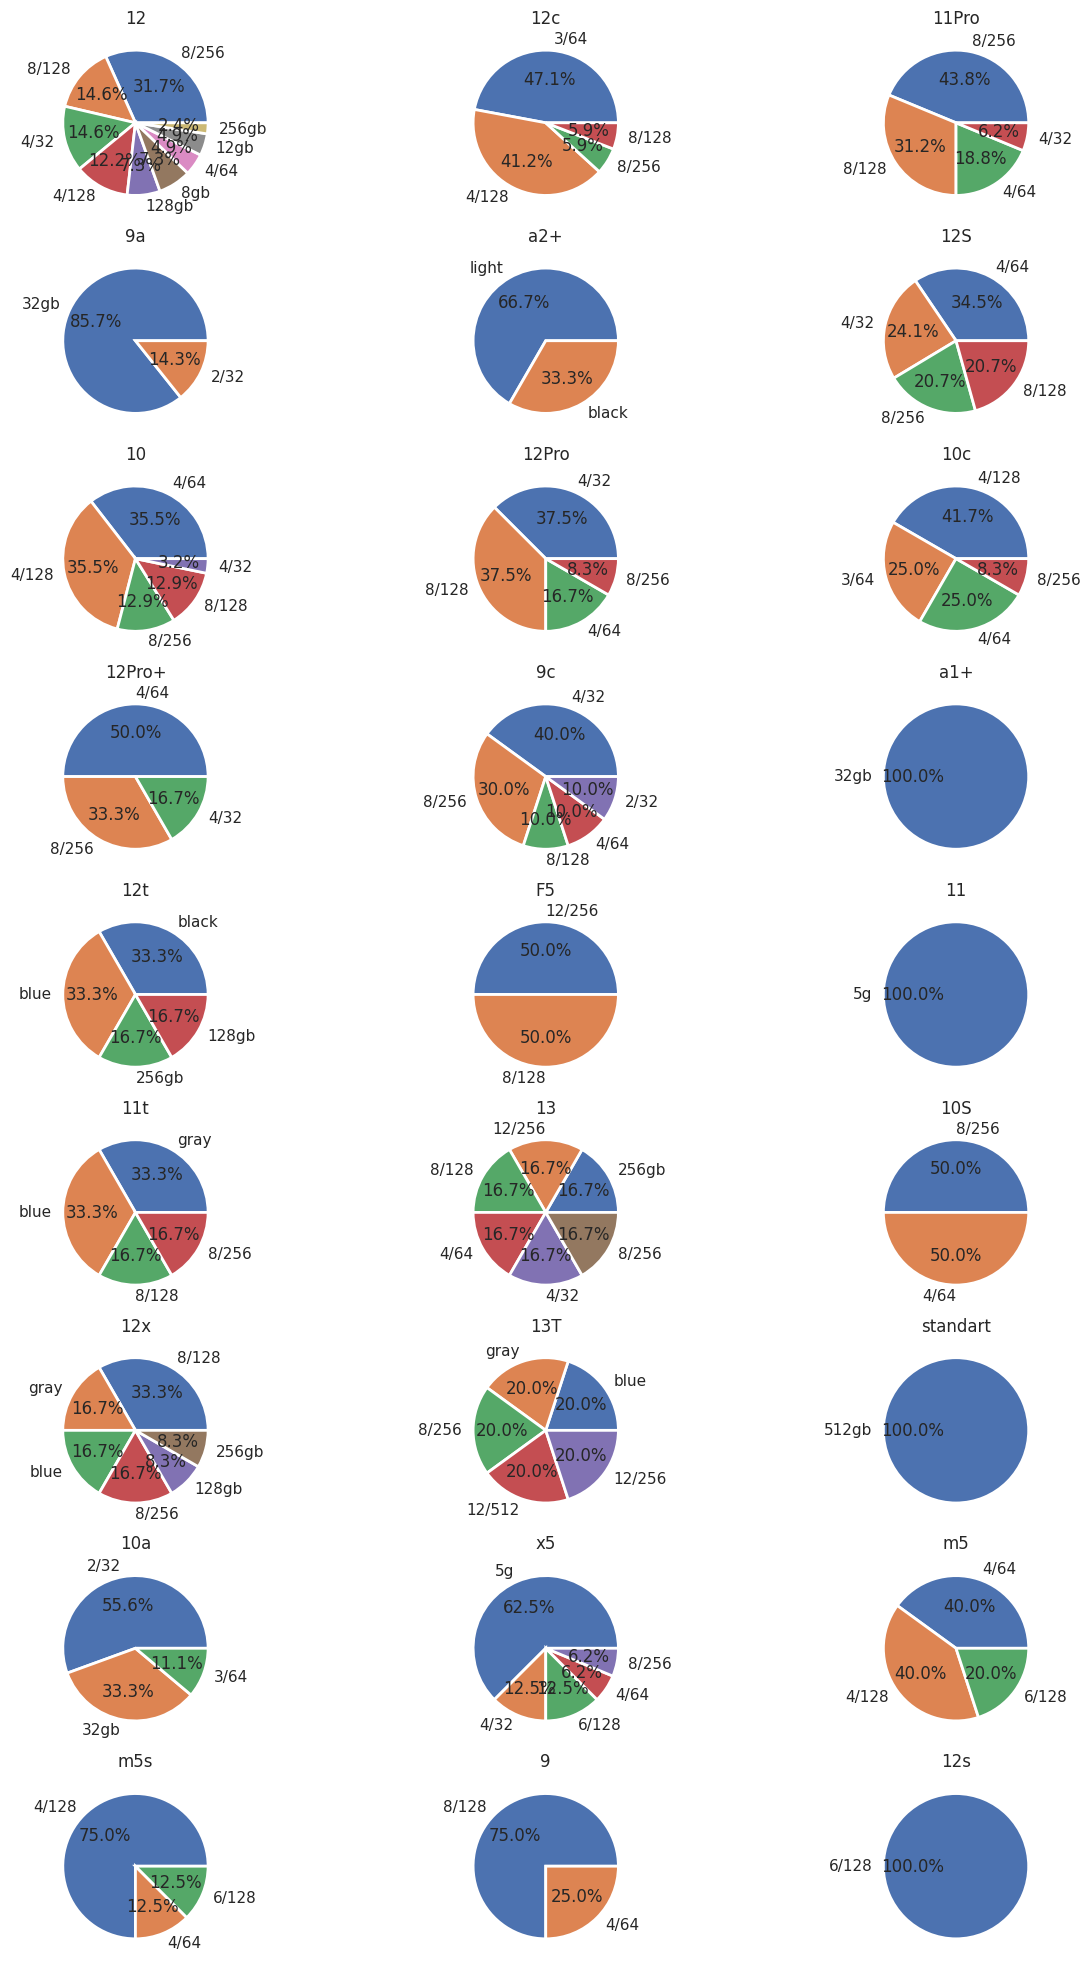

In [148]:
plot_pies(df, 'series', 'memory', num_cols=3, fs=(15,25))

In [149]:
df.loc[df['series'] == 'a2+', 'memory'] = '3/64'
df.loc[(df['series'] == '9a') & (df['memory'] == '32gb'), 'memory'] = '2/32'
df.loc[df['series'] == 'a1+', 'memory'] = '2/32'
df.loc[(df['series'] == '10a') & (df['memory'] == '32gb'), 'memory'] = '2/32'
df.loc[(df['series'] == 'x5') & (df['memory'] == '5g'), 'memory'] = '8/256'
df.loc[(df['series'] == '13T') & (df['memory'].isin(['gray', 'blue'])), 'memory'] = '8/256'

In [150]:
df.loc[(df['series'] == '12') & (df['memory'] == '8gb'), 'memory'] = '8/256'
df.loc[(df['series'] == '12') & (df['memory'] == '12gb'), 'memory'] = '12/256'
df.loc[(df['series'] == '12') & (df['memory'] == '256gb'), 'memory'] = '12/256'
df.loc[(df['series'] == '12') & (df['memory'] == '128gb'), 'memory'] = '8/128'


df.loc[(df['series'] == '12t') & (df['price'] == 50_999), 'memory'] = '8/256'
df.loc[(df['series'] == '12t') & (df['price'] == 45_999), 'memory'] = '8/128'

df.loc[(df['series'] == '11'), 'memory'] = '8/256'

df.loc[(df['series'] == '11t'), 'memory'] = '8/256'

df.loc[(df['series'] == '13') & (df['memory'] == '256gb'), 'memory'] = '12/256'

df.loc[(df['series'] == '12x') & (df['memory'].isin(['256gb', 'gray', 'blue', '128gb'])), 'memory'] = '8/256'

df.loc[(df['model'] == 'ultra'), 'memory'] = '12/512'

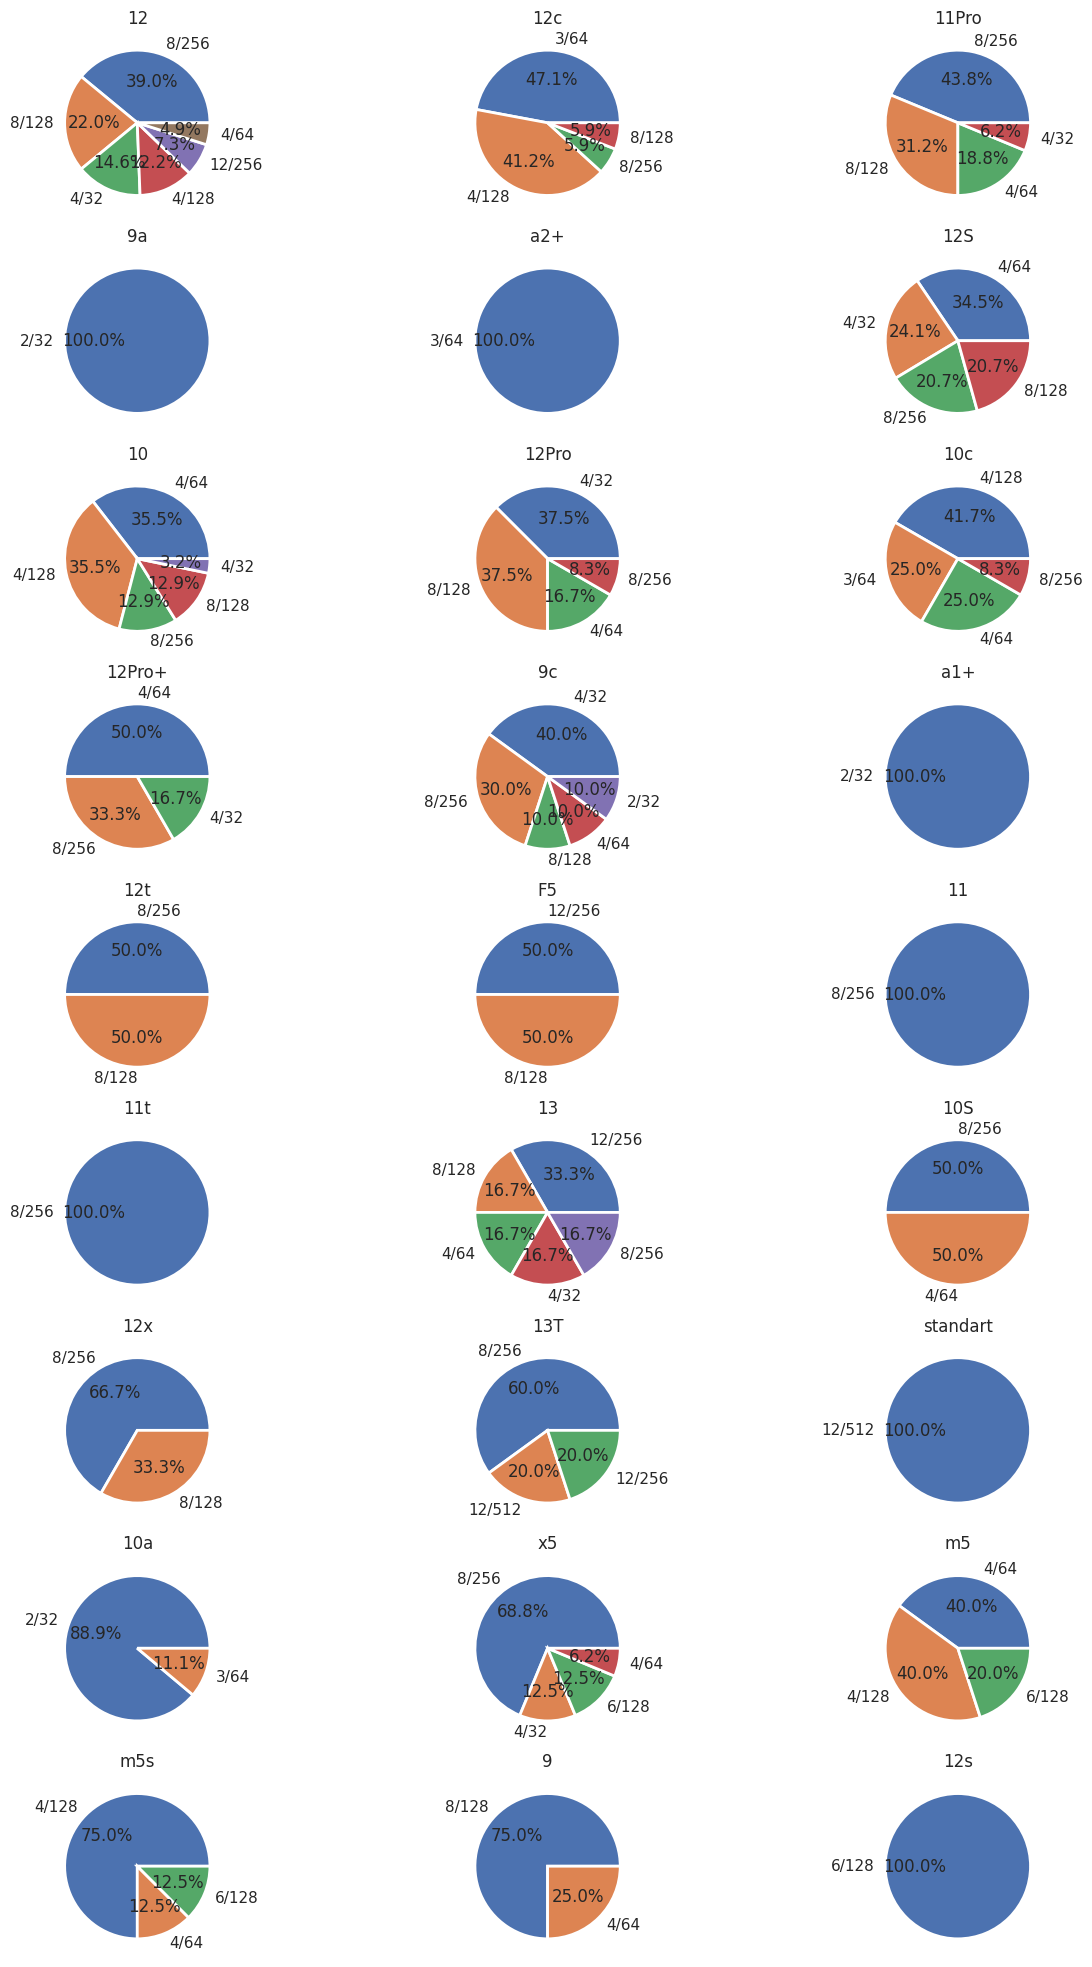

In [151]:
plot_pies(df, 'series', 'memory', num_cols=3, fs=(15,25))

In [152]:
df['memory'].value_counts()

memory
8/256     78
8/128     52
4/64      48
4/128     40
4/32      32
2/32      19
3/64      15
12/256    12
6/128      7
12/512     3
Name: count, dtype: int64

Данные исправлены, можем двигаться дальше.

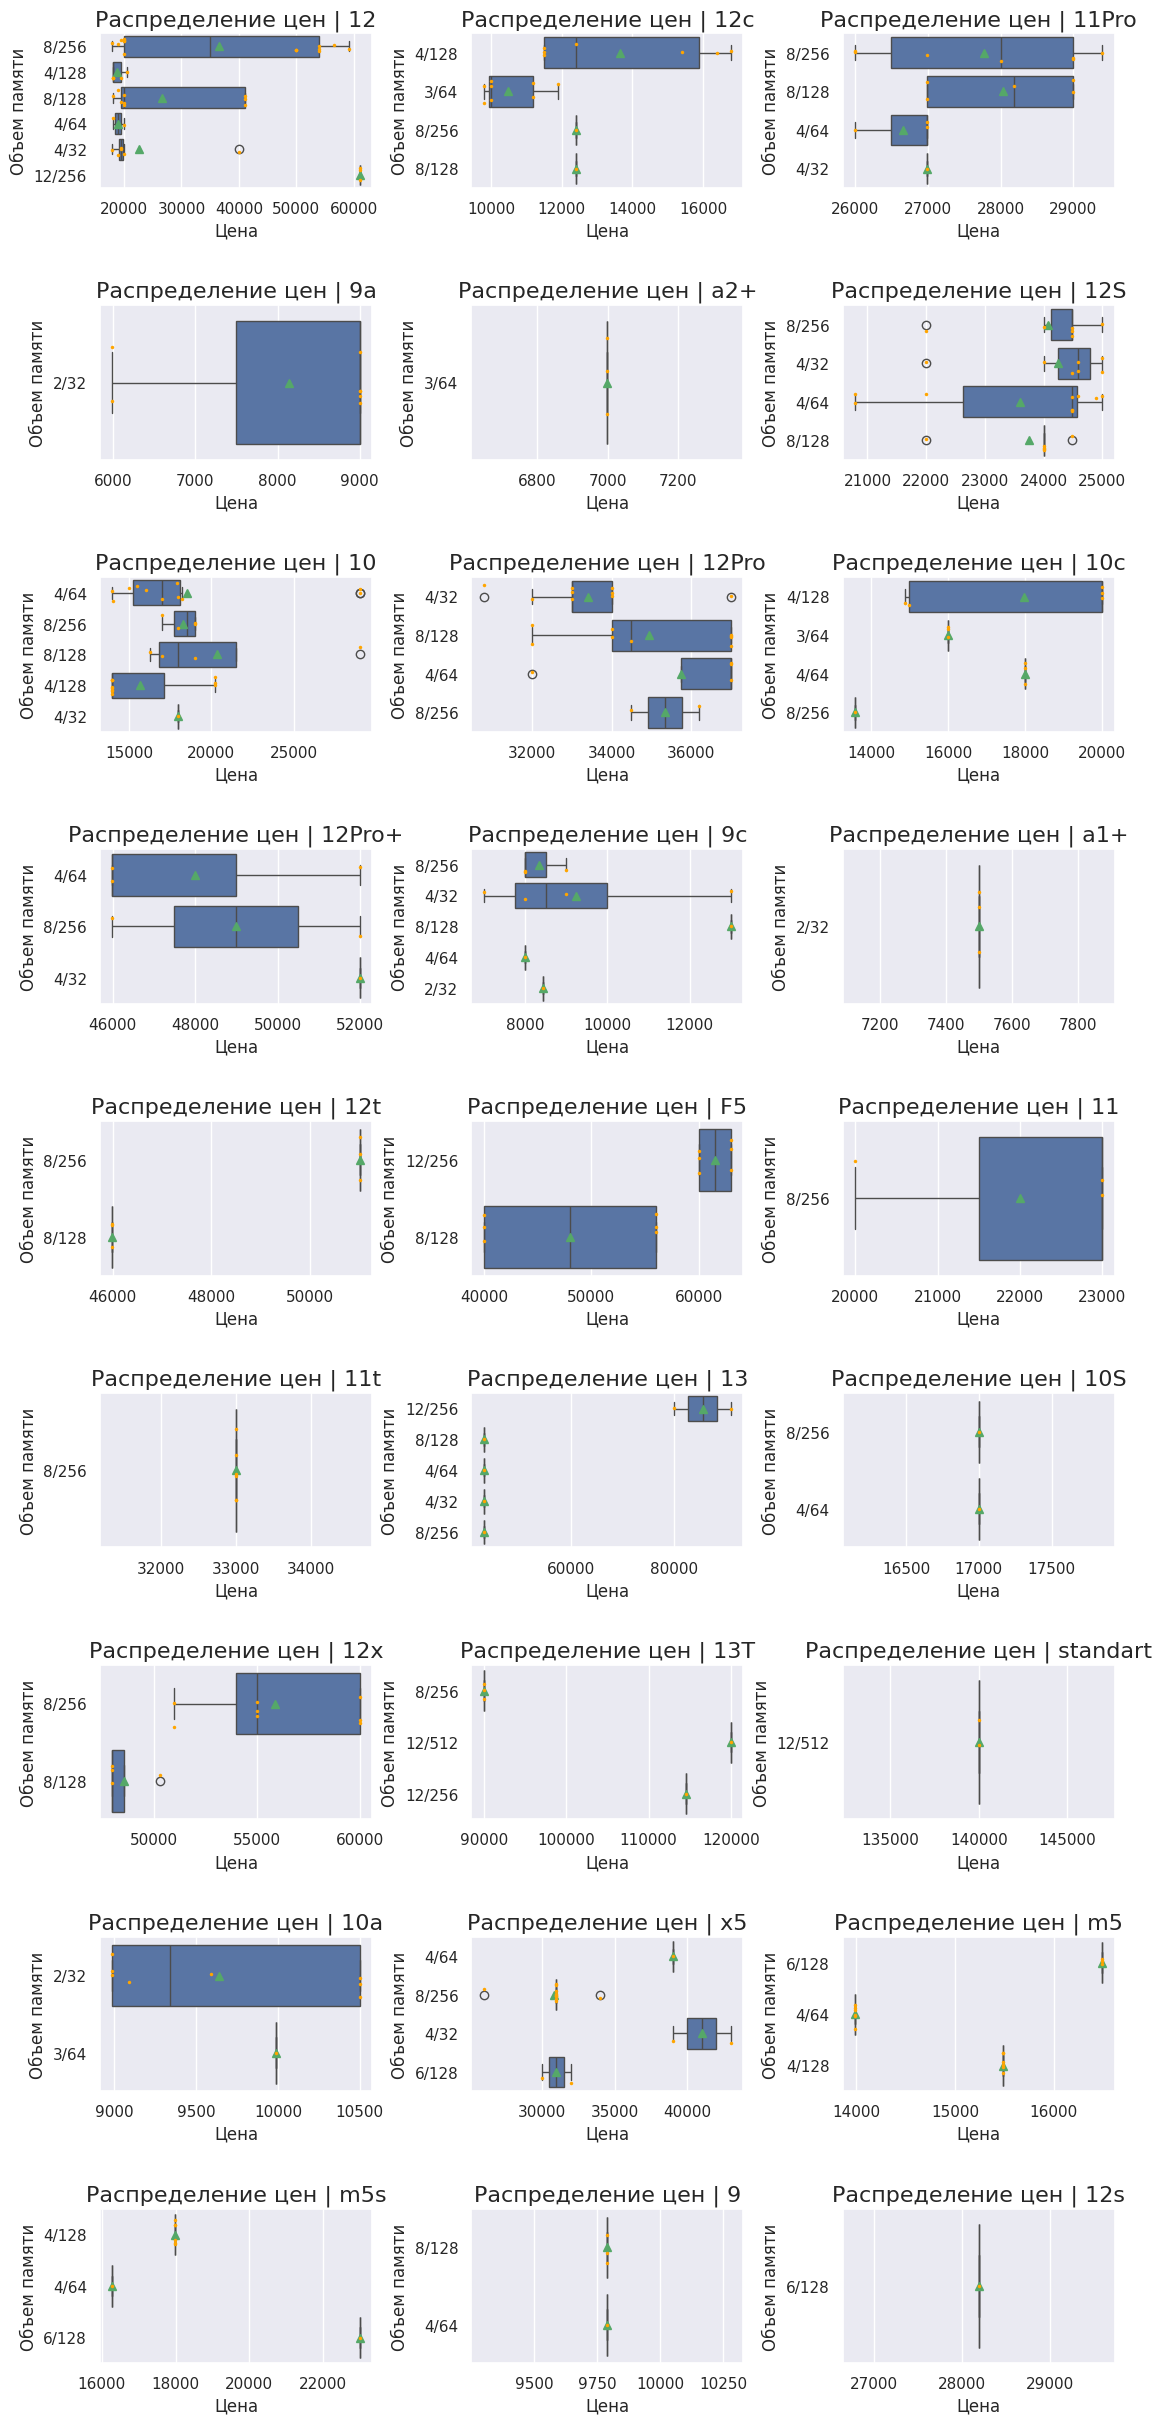

In [153]:
plot_boxes(
    df,
    cols=['series', 'memory', 'price'],
    title=f'Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=(11, 24),
    num_cols=3
)

In [154]:
df_prod.loc[df_prod['brand'] == brands[3]] = df

### Выводы по производителю Xiaomi:

* Пропуски в series обработаны.
* Все значения  в memory были исправленны.

Из представленных данных видно, что Xiaomi предлагает различные модели смартфонов в разных ценовых сегментах, начиная с бюджетного и заканчивая премиум-сегментом.

- В бюджетном сегменте (до 20 000) выделяются модели Redmi 10A и Poco с ценами 9990 и 16 740 рублей соответственно. Оба смартфона имеют оперативную память 3/64 и 4/128 ГБ, что является хорошим соотношением цены и производительности для бюджетного класса.

- В сегменте среднего класса (от 20 000 до 80 000) можно отметить такие модели, как Redmi Note, Xiaomi 12T и Xiaomi 12. Средняя цена для этих моделей составляет от 22 406 до 61 999 рублей. Эти смартфоны предлагают разные варианты оперативной и внутренней памяти, что позволяет выбрать подходящую модель в зависимости от ваших потребностей.

- В премиум-сегменте (от 80 000) можно выделить модели Xiaomi Pro, Xiaomi Ultra и Xiaomi 13. Цены для этих моделей составляют от 79 999 до 139 999 рублей. Они обладают большим объемом оперативной и внутренней памяти, что делает их идеальными для требовательных задач и использования самых передовых технологий.

В целом, Xiaomi предлагает широкий ассортимент смартфонов для разных бюджетов и потребностей. Бюджетные модели обладают неплохой производительностью и соотношением цена-качество, в то время как премиум-сегмент предлагает передовые технологии и высокую производительность.

Производитель охватывает бюджетный и средний сегменты, но также есть флагманы из премиум сегмента.

## 5. Huawei:

In [155]:
brands[4]

'huawei'

In [156]:
df = df_prod[df_prod['brand'] == brands[4]]

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 3 to 2079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72 non-null     int64 
 1   brand   72 non-null     object
 2   model   72 non-null     object
 3   series  62 non-null     object
 4   memory  72 non-null     object
 5   price   72 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


Есть пропуски в столбце `series`

In [158]:
df.loc[df['series'].isnull()]

id   brand model series  memory   price
22   30067439  huawei   pro    NaN   8/256   89999
49   30067438  huawei   pro    NaN   8/256   89999
70   30067470  huawei   p60    NaN   black   74999
90   30067471  huawei   p60    NaN   green   74999
122  30067437  huawei   pro    NaN  12/512   99999
157  30067436  huawei   pro    NaN  12/512   99999
289  30064404  huawei    xs    NaN   8/256  139999
304  30064405  huawei    xs    NaN   8/128  139999
425  30064403  huawei   p50    NaN  golden   39999
514  30064401  huawei   p50    NaN   8/256   39999

In [159]:
df.loc[(df['model'] == 'pro') & (df['price'] > 90_000), 'series'] = 'pro'
df.loc[(df['model'] == 'pro') & (df['price'] > 90_000), 'model'] = 'p60'

df.loc[(df['model'] == 'pro') & (df['price'] <= 90_000), 'series'] = 'pro'
df.loc[(df['model'] == 'pro') & (df['price'] <= 90_000), 'model'] = 'p50'

df.loc[(df['model'] == 'xs'), 'series'] = 'xs'
df.loc[(df['model'] == 'xs'), 'memory'] = '8/512'
df.loc[(df['model'] == 'xs'), 'model'] = 'Mate'

In [160]:
df[df['model'] == 'p60']

id   brand model series  memory  price
70   30067470  huawei   p60    NaN   black  74999
90   30067471  huawei   p60    NaN   green  74999
122  30067437  huawei   p60    pro  12/512  99999
157  30067436  huawei   p60    pro  12/512  99999

In [161]:
df.loc[(df['model'] == 'p60') & (df['series'].isna()), 'memory'] = '8/256'
df.loc[(df['model'] == 'p60') & (df['series'].isna()), 'series'] = 'standart'

In [162]:
df.loc[df['model'] == 'p50']

id   brand model series  memory  price
22   30067439  huawei   p50    pro   8/256  89999
49   30067438  huawei   p50    pro   8/256  89999
425  30064403  huawei   p50    NaN  golden  39999
514  30064401  huawei   p50    NaN   8/256  39999

In [163]:
df.loc[(df['model'] == 'p50') & (df['series'].isna()), 'memory'] = '8/256'
df.loc[(df['model'] == 'p50') & (df['series'].isna()), 'series'] = 'standart'

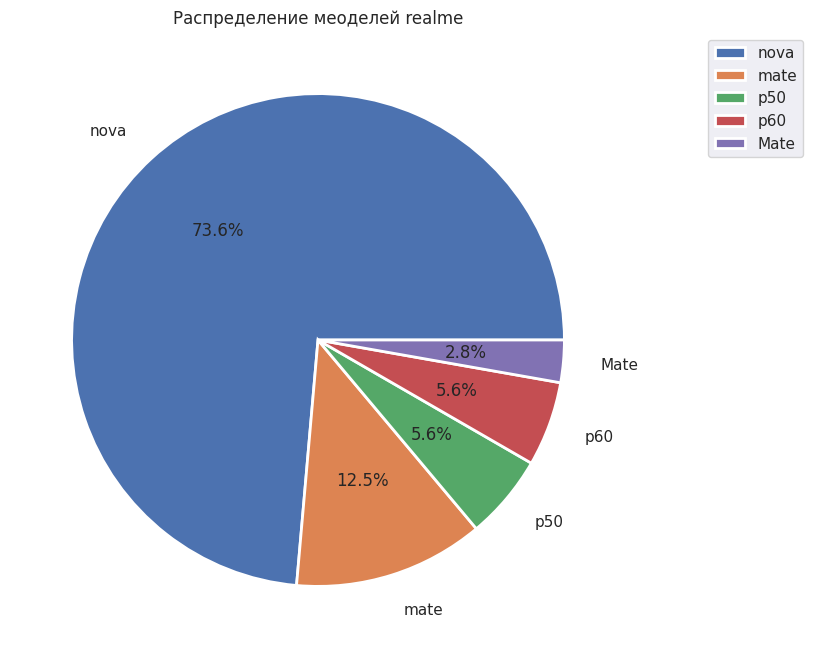

In [164]:
df['model'].value_counts().plot.pie(
    labeldistance=1.15,
    wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
    autopct='%1.1f%%',
    figsize=(8,8),
    ylabel='',
    title='Распределение меоделей realme'
)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

In [165]:
df.loc[df['model'] == 'Mate', 'model'] = 'mate'

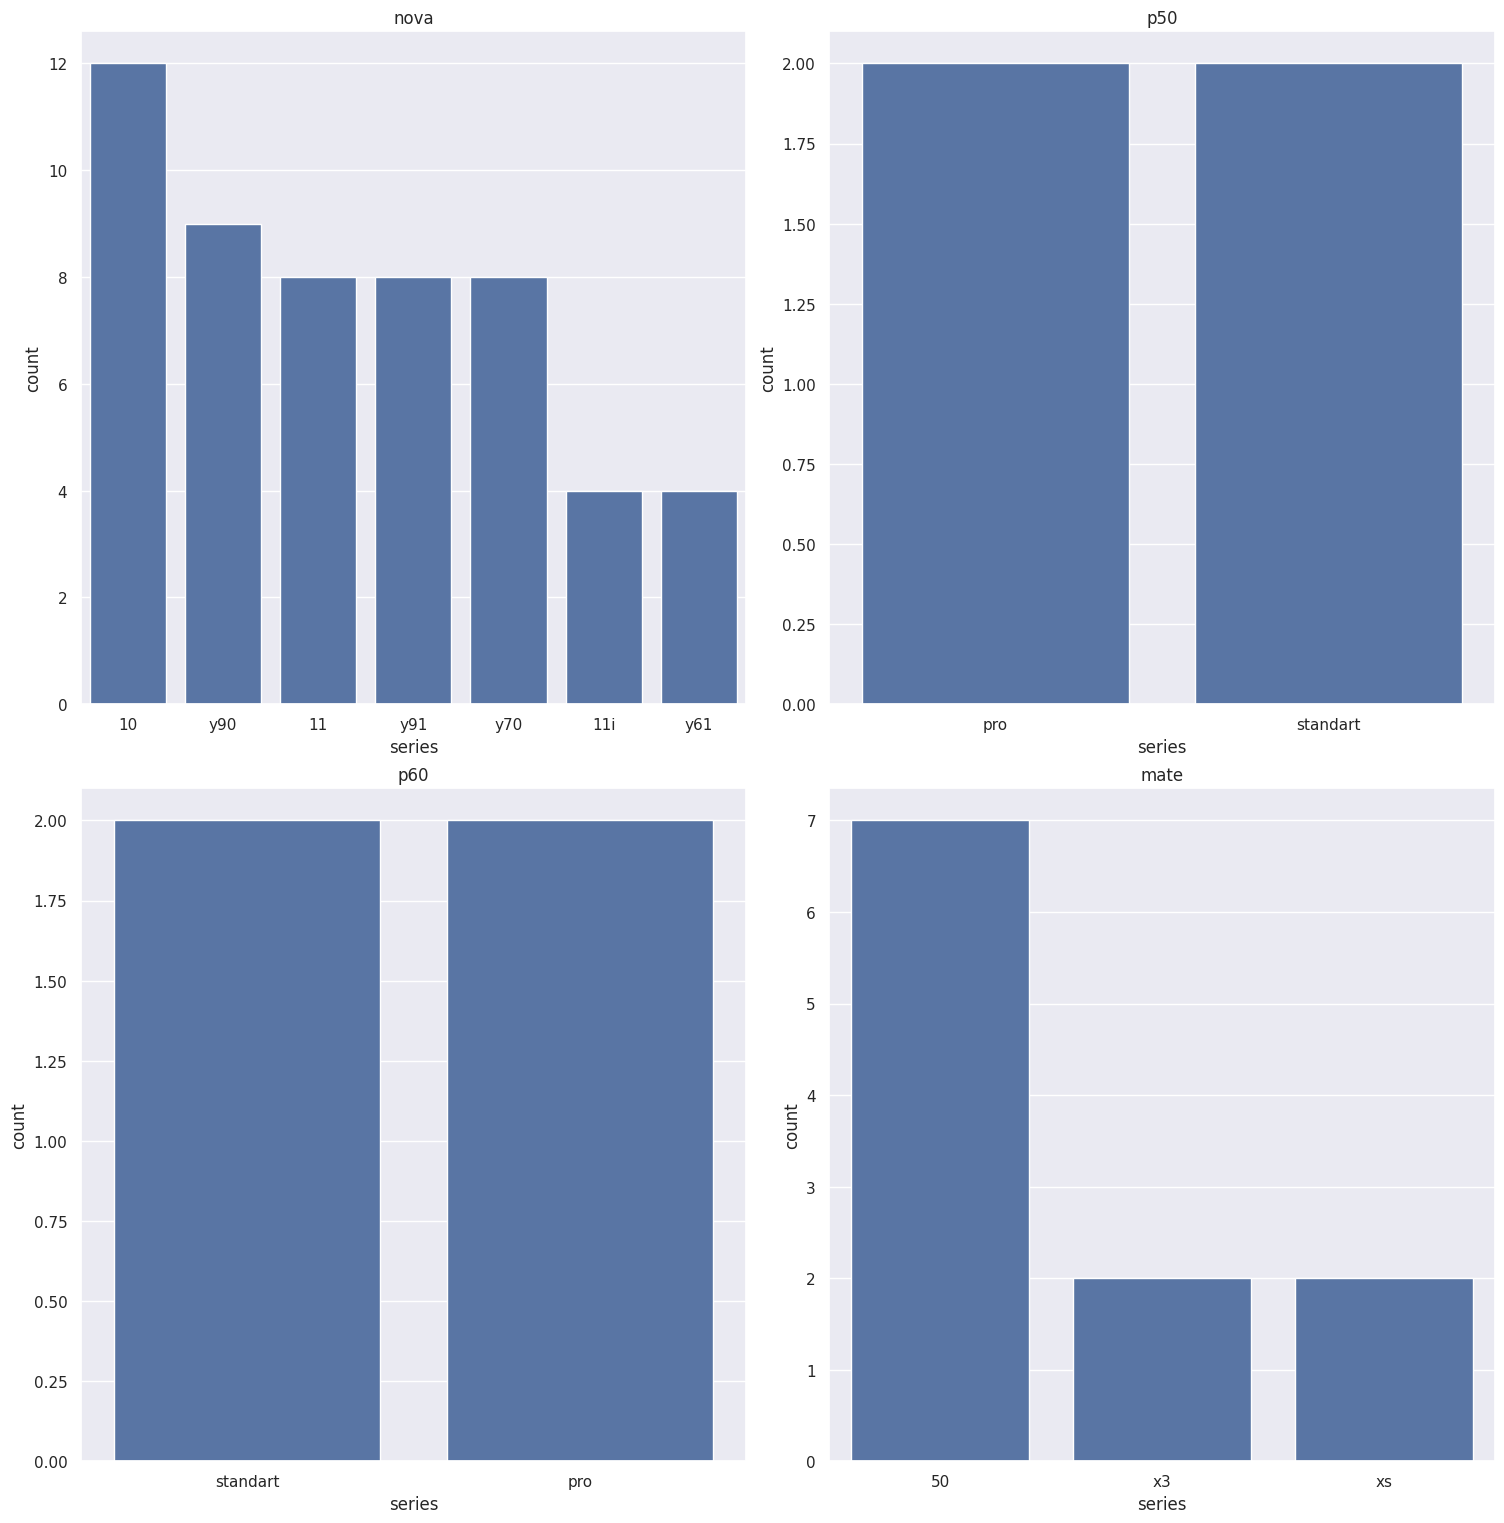

In [166]:
counter_plot(df, 'model', 'series', fs=(15, 15), num_cols=2)

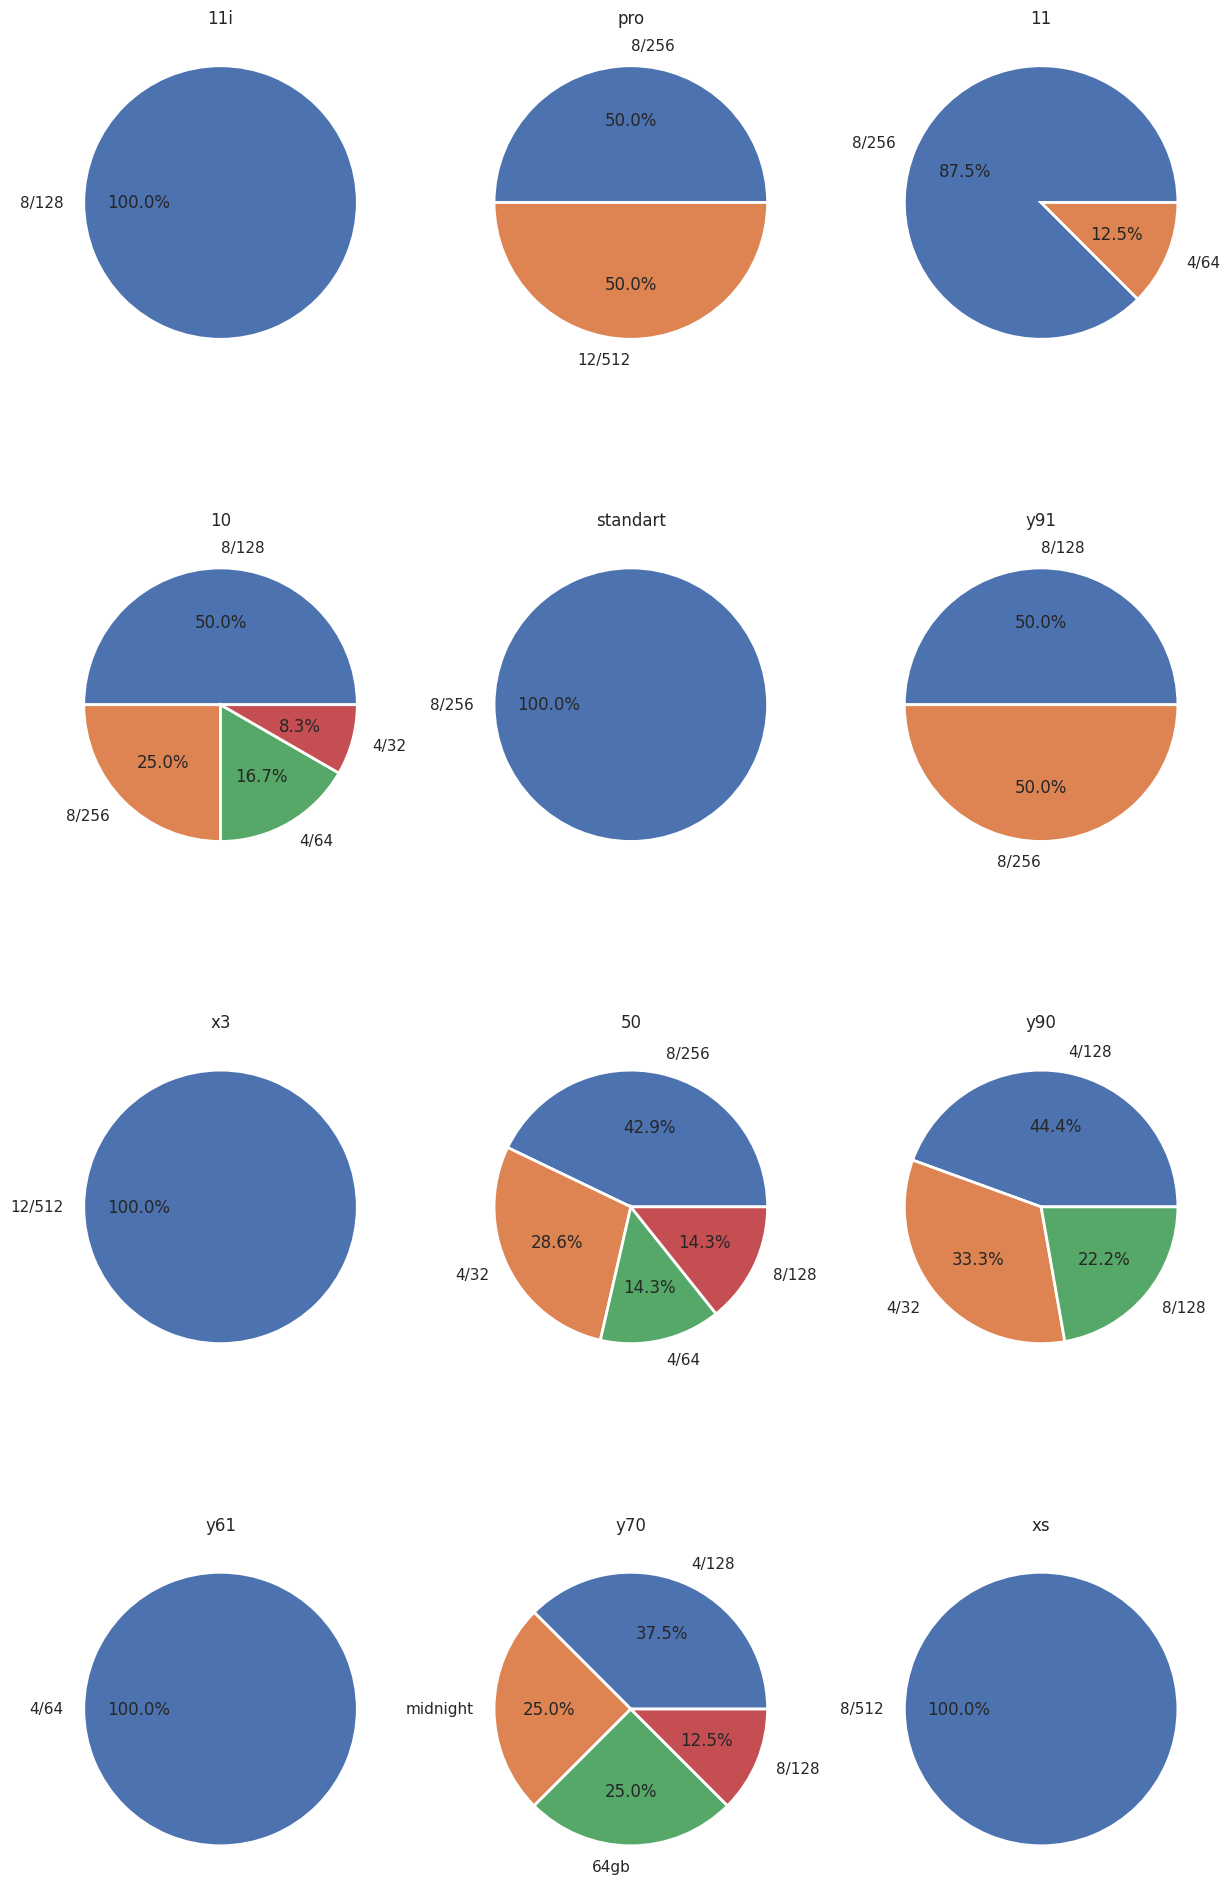

In [167]:
plot_pies(df, 'series', 'memory', num_cols=3, fs=(15,25))

In [168]:
df.loc[df['series'] == 'y70']

id   brand model series    memory  price
216    30064177  huawei  nova    y70  midnight  14999
242    30064178  huawei  nova    y70     8/128  14999
255    30063297  huawei  nova    y70  midnight  14999
271    30063298  huawei  nova    y70     4/128  14999
483   400159367  huawei  nova    y70      64gb  13999
599   400159156  huawei  nova    y70      64gb  13999
961   400007355  huawei  nova    y70     4/128  18990
1647  400007347  huawei  nova    y70     4/128  18990

In [169]:
df.loc[(df['series'] == 'y70') & (df['memory'].isin(['midnight', '64gb'])), 'memory'] = '4/64'

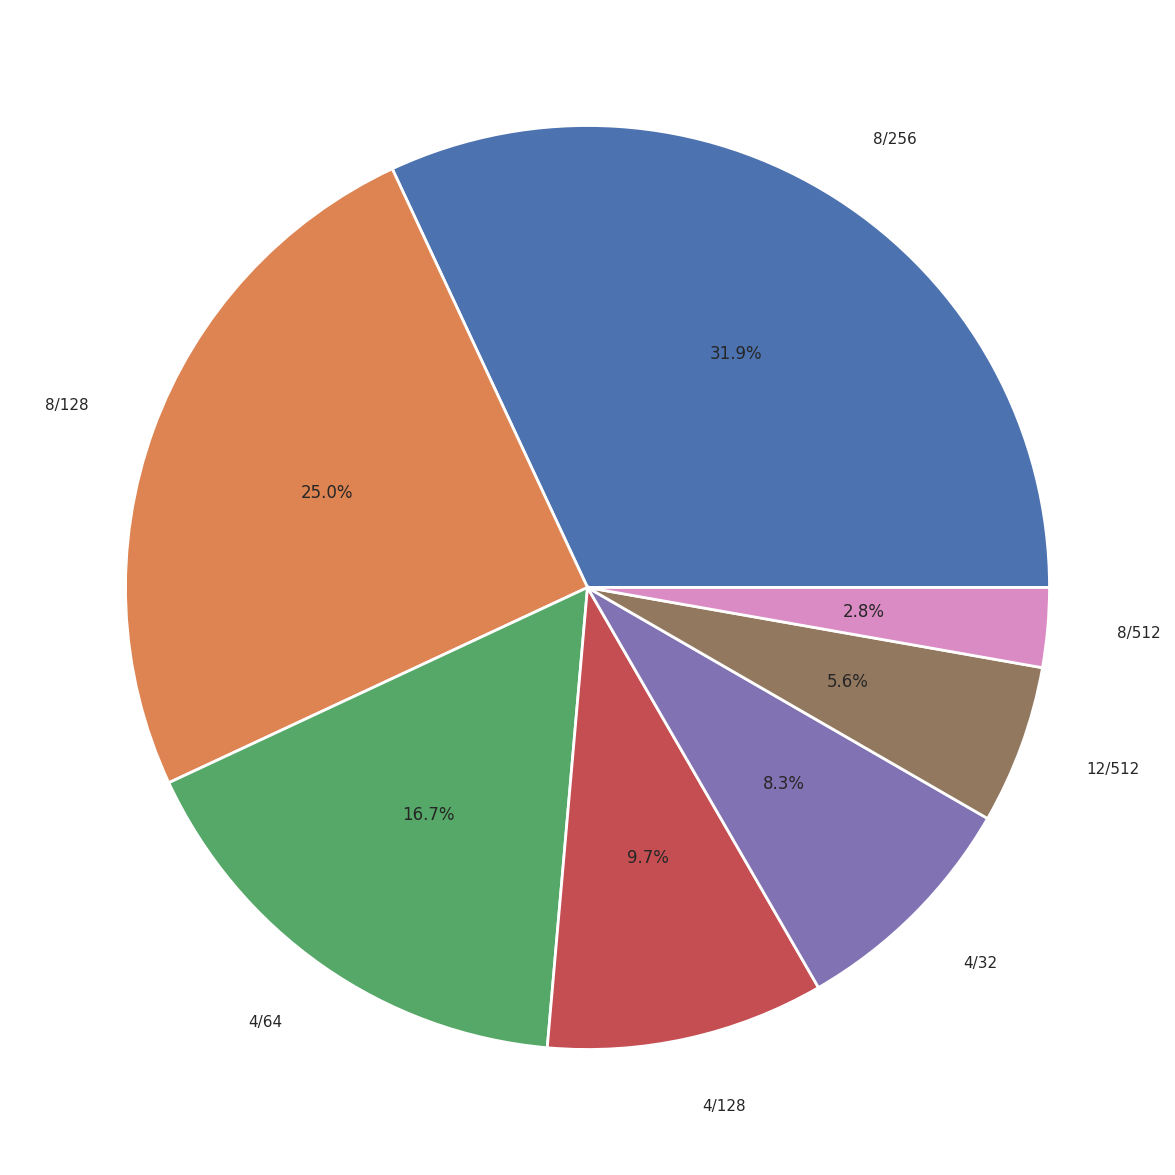

In [170]:
df['memory'].value_counts().plot.pie(
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        autopct='%1.1f%%',
        figsize=(15,15),
        ylabel='',
)
plt.show()

Теперь, когда данные отредактированны, посмотрим на распределение цен по серии смартфонов.

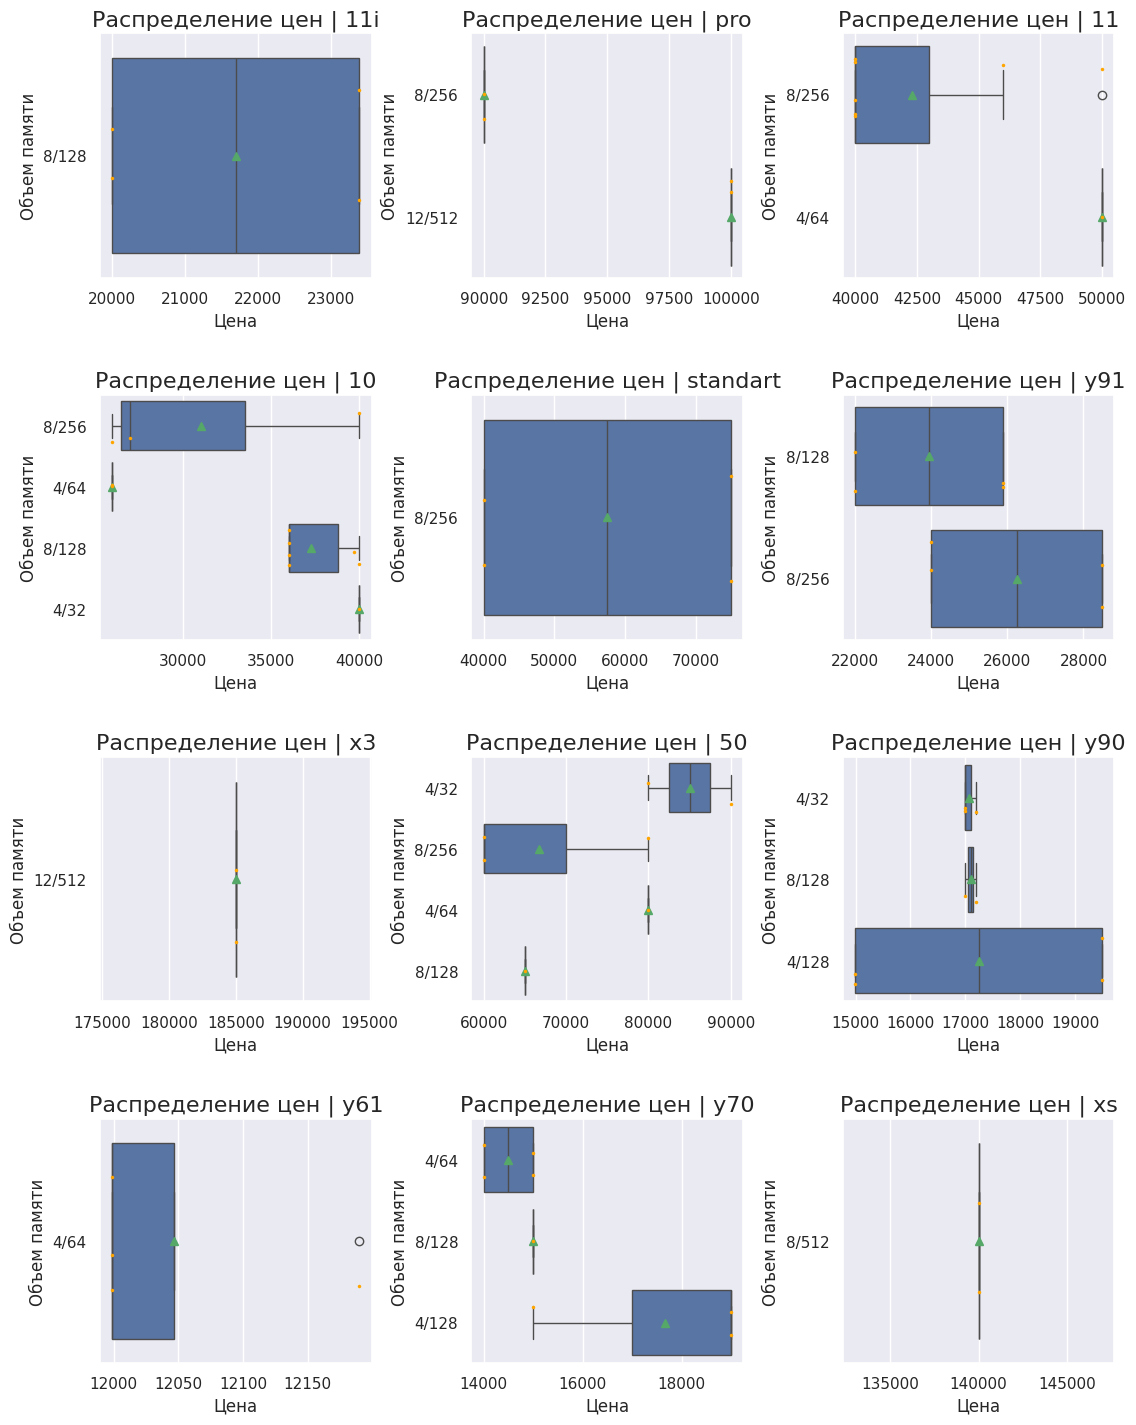

In [171]:
plot_boxes(
    df,
    cols=['series', 'memory', 'price'],
    title=f'Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=(11, 14),
    num_cols=3
)

In [172]:
df_prod.loc[df_prod['brand'] == brands[4]] = df

### Выводы по производителю Huawei:

* Пропуски в series обработаны.
* Все значения  в memory были исправленны.

Из предоставленных данных видно, что Huawei также предлагает несколько моделей смартфонов в разных ценовых сегментах.

- В бюджетном сегменте (до 20 000) можно отметить модели Huawei Y90 и Y61 с ценами от 12 046.75 до 17 240 рублей. Они обладают разными вариантами оперативной и внутренней памяти, что позволяет выбрать подходящую модель в зависимости от ваших предпочтений.

- В среднем ценовом сегменте (от 20 000 до 80 000) можно выделить модели Huawei Y70, 10 и Y91. Цены для этих моделей составляют от 14 599 до 37 959 рублей. Эти смартфоны также предлагают разные варианты оперативной и внутренней памяти, что позволяет выбрать подходящую модель в зависимости от ваших потребностей.

- В премиум-сегменте (от 80 000) выделяется модель Huawei XS с ценой 139 999 рублей. Она обладает большим объемом оперативной и внутренней памяти, что делает ее идеальной для требовательных задач и использования передовых технологий.

В целом, Huawei предлагает разнообразные модели смартфонов для разных бюджетов и потребностей. Несмотря на то, что Huawei больше не выпускает новые модели на международном рынке, представленные модели все еще доступны и могут предложить хорошие возможности по соотношению цена-качество.

Производитель охватывает бюджетный и средний сегменты, но также есть флагманы из премиум сегмента.

## 6. Honor

In [173]:
brands[5]

'honor'

In [174]:
df = df_prod[df_prod['brand'] == brands[5]]

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 4 to 1706
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      58 non-null     int64 
 1   brand   58 non-null     object
 2   model   58 non-null     object
 3   series  0 non-null      object
 4   memory  58 non-null     object
 5   price   58 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ KB


В столбце `seres` отсутсвуют значения.

In [176]:
df['model'].value_counts()

model
x9a     8
x8      7
x7a     6
70      6
50      5
x7      5
90      5
x8a     4
x6      3
lite    3
x5      3
plus    3
Name: count, dtype: int64

Для всех моделей, в столбце `series` будет значение standart.

In [177]:
df.loc[df['series'].isna(), 'series'] = 'standart'

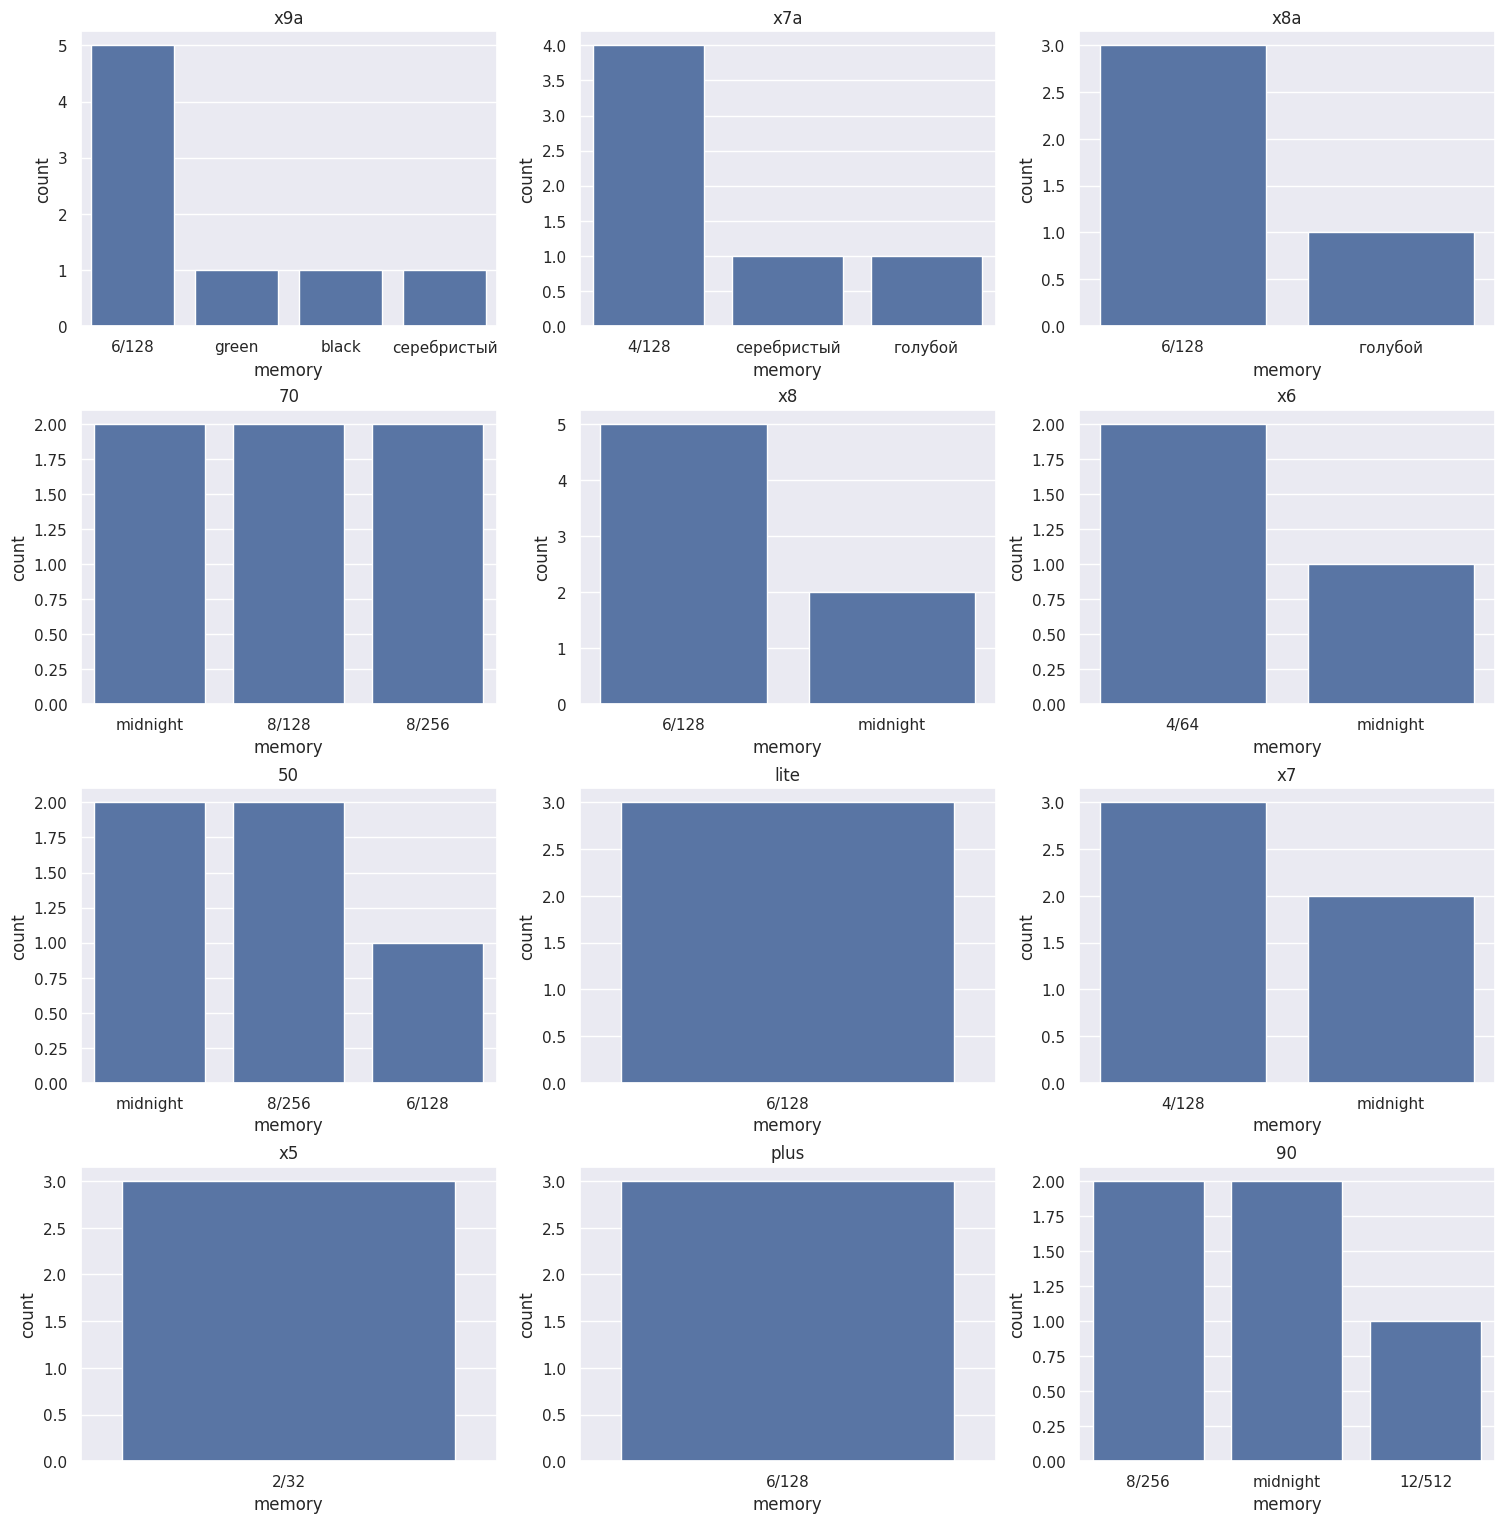

In [178]:
counter_plot(df, 'model', 'memory', fs=(15, 15), num_cols=3)

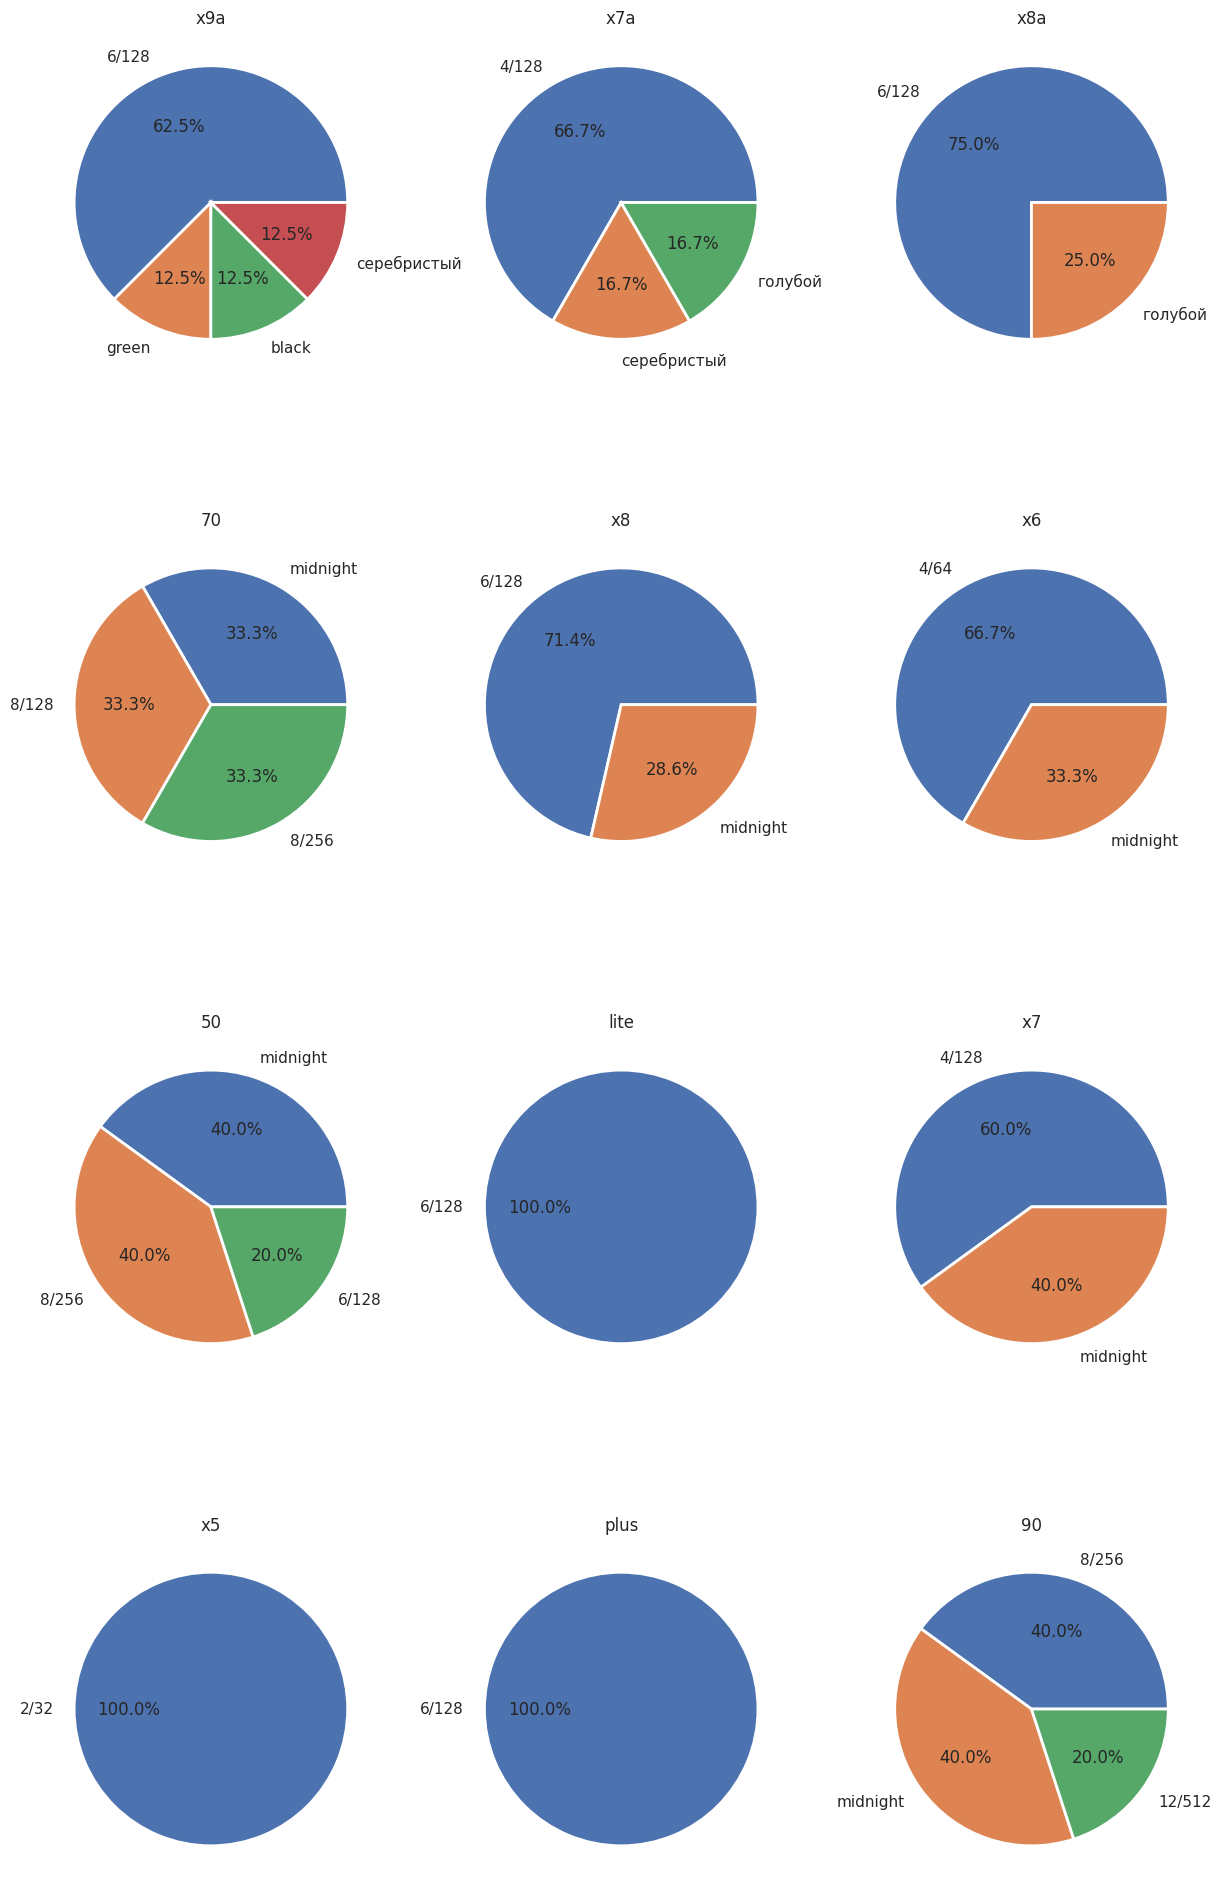

In [179]:
plot_pies(df, 'model', 'memory', num_cols=3, fs=(15,25))

### x9a:

In [180]:
df.loc[df['model'] == 'x9a']

id  brand model    series       memory  price
4     400077577  honor   x9a  standart        6/128  27999
32    400077579  honor   x9a  standart        6/128  27999
74    400077578  honor   x9a  standart        6/128  27999
813   400164730  honor   x9a  standart        green  34999
875   400164710  honor   x9a  standart        black  34999
1146  400129068  honor   x9a  standart        6/128  36390
1705  400129051  honor   x9a  standart        6/128  36390
1706  400129066  honor   x9a  standart  серебристый  36390

У позиций с некорректными значениями 6озу и 256 внутр.

In [181]:
df.loc[(df['model'] == 'x9a') & (df['memory'].isin(['green', 'black', 'серебристый'])), 'memory'] = '6/256'

### x7a:

In [182]:
df.loc[df['model'] == 'x7a']

id  brand model    series       memory  price
7     400078850  honor   x7a  standart        4/128  15999
185   400078855  honor   x7a  standart        4/128  15999
189   400078853  honor   x7a  standart        4/128  15999
1252  400128874  honor   x7a  standart  серебристый  18790
1492  400128875  honor   x7a  standart        4/128  18790
1598  400128873  honor   x7a  standart      голубой  18790

У позиций с некорректными значениями 6озу и 128 внутр.

In [183]:
df.loc[(df['model'] == 'x7a') & (df['memory'].isin(['серебристый', 'голубой'])), 'memory'] = '6/128'

### x8a:

In [184]:
df.loc[df['model'] == 'x8a']

id  brand model    series   memory  price
20    400078854  honor   x8a  standart    6/128  19999
35    400078851  honor   x8a  standart    6/128  19999
155   400078852  honor   x8a  standart    6/128  19999
1490  400129007  honor   x8a  standart  голубой  24190

In [185]:
df.loc[(df['model'] == 'x8a') & (df['memory'] == 'голубой'), 'memory'] = '8/256'

### 70:

In [186]:
df.loc[df['model'] == '70']

id  brand model    series    memory  price
69    30065643  honor    70  standart  midnight  44999
79    30065641  honor    70  standart  midnight  39999
117   30065642  honor    70  standart     8/128  39999
215   30065645  honor    70  standart     8/256  44999
409  400133857  honor    70  standart     8/128  39999
567   30065644  honor    70  standart     8/256  44999

In [187]:
df.loc[(df['model'] == '70') & (df['memory'] == 'midnight') & (df['price'] == 44_999), 'memory'] = '8/256'
df.loc[(df['model'] == '70') & (df['memory'] == 'midnight') & (df['price'] == 39_999), 'memory'] = '8/256'

### x8:

In [188]:
df.loc[df['model'] == 'x8']

id  brand model    series    memory  price
124  50170400  honor    x8  standart  midnight  23999
269  30065649  honor    x8  standart     6/128  23999
322  50170402  honor    x8  standart     6/128  23999
486  30065576  honor    x8  standart     6/128  23999
746  30064169  honor    x8  standart     6/128  23999
844  30064168  honor    x8  standart  midnight  17899
941  30064360  honor    x8  standart     6/128  23999

In [189]:
df.loc[(df['model'] == 'x8') & (df['memory'] == 'midnight'), 'memory'] = '6/128'

### x6:

In [190]:
df.loc[df['model'] == 'x6']

id  brand model    series    memory  price
303  30066225  honor    x6  standart      4/64  13999
356  30066223  honor    x6  standart  midnight  13999
365  30066224  honor    x6  standart      4/64  13999

In [191]:
df.loc[(df['model'] == 'x6') & (df['memory'] == 'midnight'), 'memory'] = '4/64'

### 50:

In [192]:
df.loc[df['model'] == '50']

id  brand model    series    memory  price
312  30059410  honor    50  standart     6/128  29999
364  30059399  honor    50  standart  midnight  29999
405  30059414  honor    50  standart  midnight  37999
441  30066557  honor    50  standart     8/256  37999
659  30059415  honor    50  standart     8/256  37999

In [193]:
df.loc[df['id'] == 30059399, 'memory'] = '6/128'
df.loc[df['id'] == 30059414	, 'memory'] = '8/256'

### x7:

In [194]:
df.loc[df['model'] == 'x7']

id  brand model    series    memory  price
461  30065647  honor    x7  standart     4/128  16999
520  30064361  honor    x7  standart  midnight  16999
577  30065646  honor    x7  standart  midnight  16999
670  30065648  honor    x7  standart     4/128  16999
745  30064362  honor    x7  standart     4/128  16999

In [195]:
df.loc[df['id'].isin([30064361, 30065646]), 'memory'] = '4/128'

### 90:

In [196]:
df.loc[df['model'] == '90']

id  brand model    series    memory  price
911  400194403  honor    90  standart     8/256  44999
956  400194406  honor    90  standart     8/256  44999
958  400194402  honor    90  standart  midnight  44999
959  400194404  honor    90  standart  midnight  49999
960  400194405  honor    90  standart    12/512  49999

In [197]:
df.loc[df['id'].isin([400194402, 400194404]), 'memory'] = '8/256'

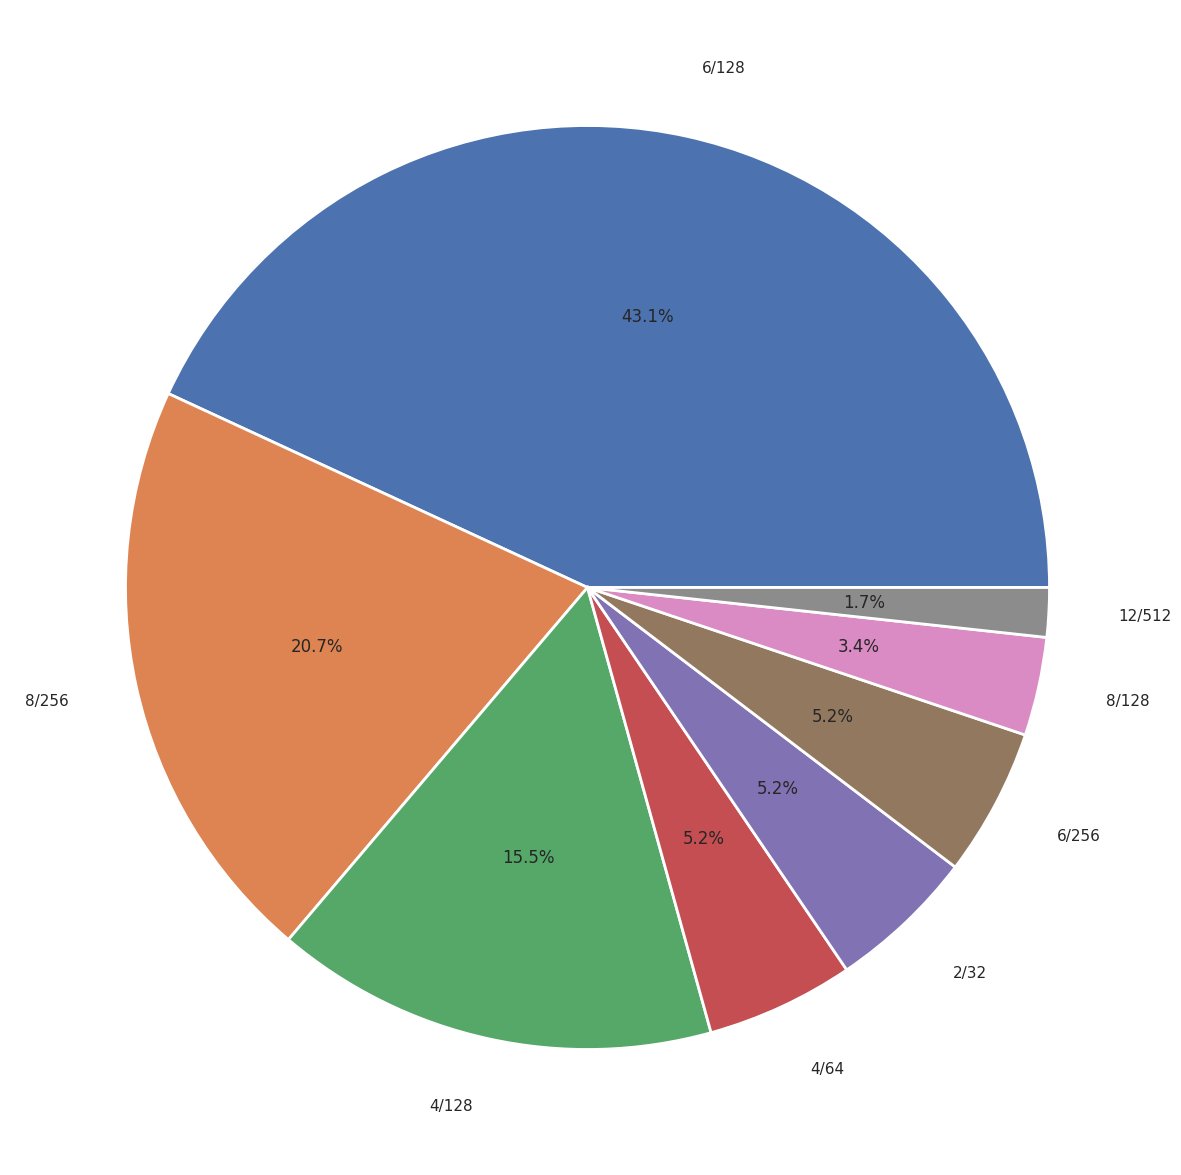

In [198]:
df['memory'].value_counts().plot.pie(
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        autopct='%1.1f%%',
        figsize=(15,15),
        ylabel='',
)
plt.show()

Теперь, когда данные отредактированны, посмотрим на распределение цен по моделям смартфонов.

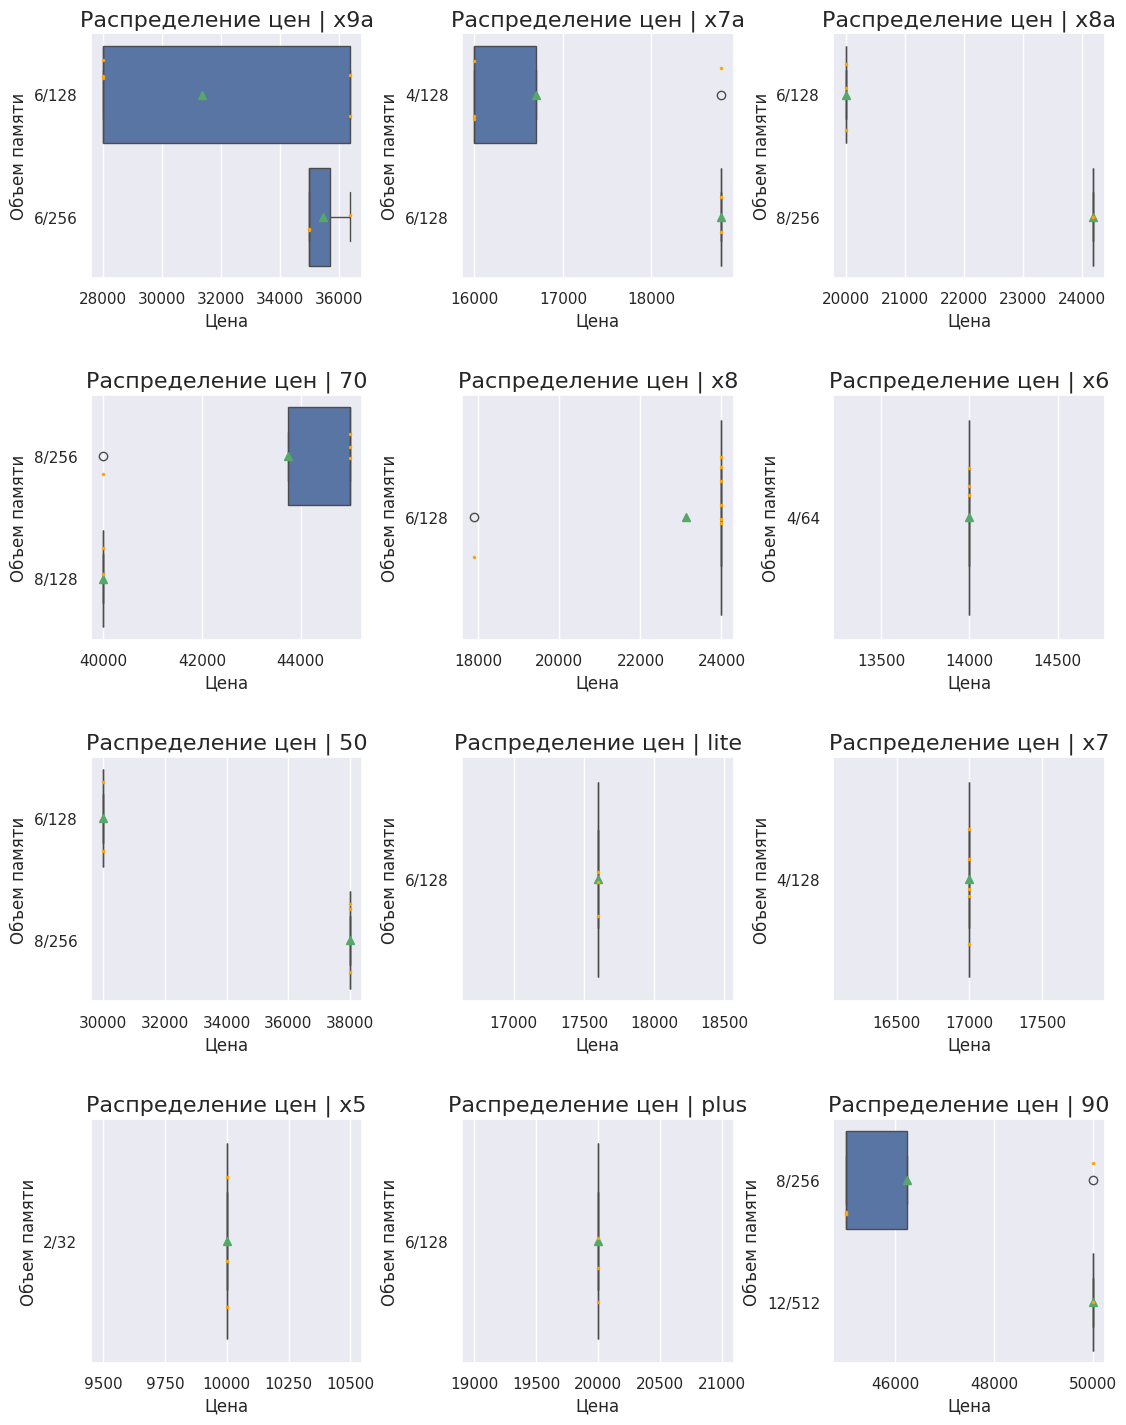

In [199]:
plot_boxes(
    df,
    cols=['model', 'memory', 'price'],
    title=f'Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=(11, 14),
    num_cols=3
)

In [200]:
df_prod.loc[df_prod['brand'] == brands[5]] = df

### Выводы по производителю Honor:

* Пропуски в series изменены на значение `standart`.
* Все значения  в memory были исправленны.

Исходя из предоставленных данных, можно сделать следующие выводы:


1. Бюджетный сегмент (до 20к):
- Смартфоны x6 и x5 ценятся преимущественно за свою низкую стоимость, но имеют низкую память и ограниченные функциональные возможности.
- Модель lite отличается более привлекательной ценой и более достойной памятью, что делает ее более привлекательным вариантом в этом сегменте.

2. Средний класс (от 20к до 80к):
- Модель x7 предлагает хорошие характеристики, особенно в памяти, за разумную цену.
- Смартфоны x9a, x7a и 50 также предоставляют приемлемые характеристики, но немного выше по цене.
- Эти модели имеют ряд отличий, включая различиный объем памяти, но все они отвечают запросам среднего класса.

3. Премиум-сегмент (от 80к):
- Модели x8a, 70 и plus представляют более высокую ценовую категорию смартфонов Honor, но также приносят больше памяти и функциональности.
- Смартфоны 90 и x8 отличаются самыми высокими характеристиками во всех аспектах, включая память и цену, поэтому они предназначены для пользователей, которые ищут устройства самого высокого класса.

Таким образом, Honor предлагает широкий выбор смартфонов в разных ценовых сегментах, позволяя пользователям выбрать оптимальные характеристики и цену в соответствии со своими потребностями и бюджетом.

Производитель нацелен на рынки бюджетного и среднего сегментов.

## 7. Oppo

In [201]:
brands[6]

'oppo'

In [202]:
df = df_prod[df_prod['brand'] == brands[6]]

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 102 to 1646
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      39 non-null     int64 
 1   brand   39 non-null     object
 2   model   39 non-null     object
 3   series  3 non-null      object
 4   memory  39 non-null     object
 5   price   39 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ KB


Пропуски в столбце series.

In [204]:
df.loc[df['series'].isna(),'model'].value_counts()

model
t         6
a78       4
a96       4
a58       4
a57s      4
a55       4
a17k      2
reno10    2
a17       2
reno7     2
a38       2
Name: count, dtype: int64

In [205]:
df.loc[df['model'] == 't', 'series'] = 't'
df.loc[df['model'] == 't', 'model'] = 'reno8'

df.loc[df['series'].isna(), 'series'] = 'standart'

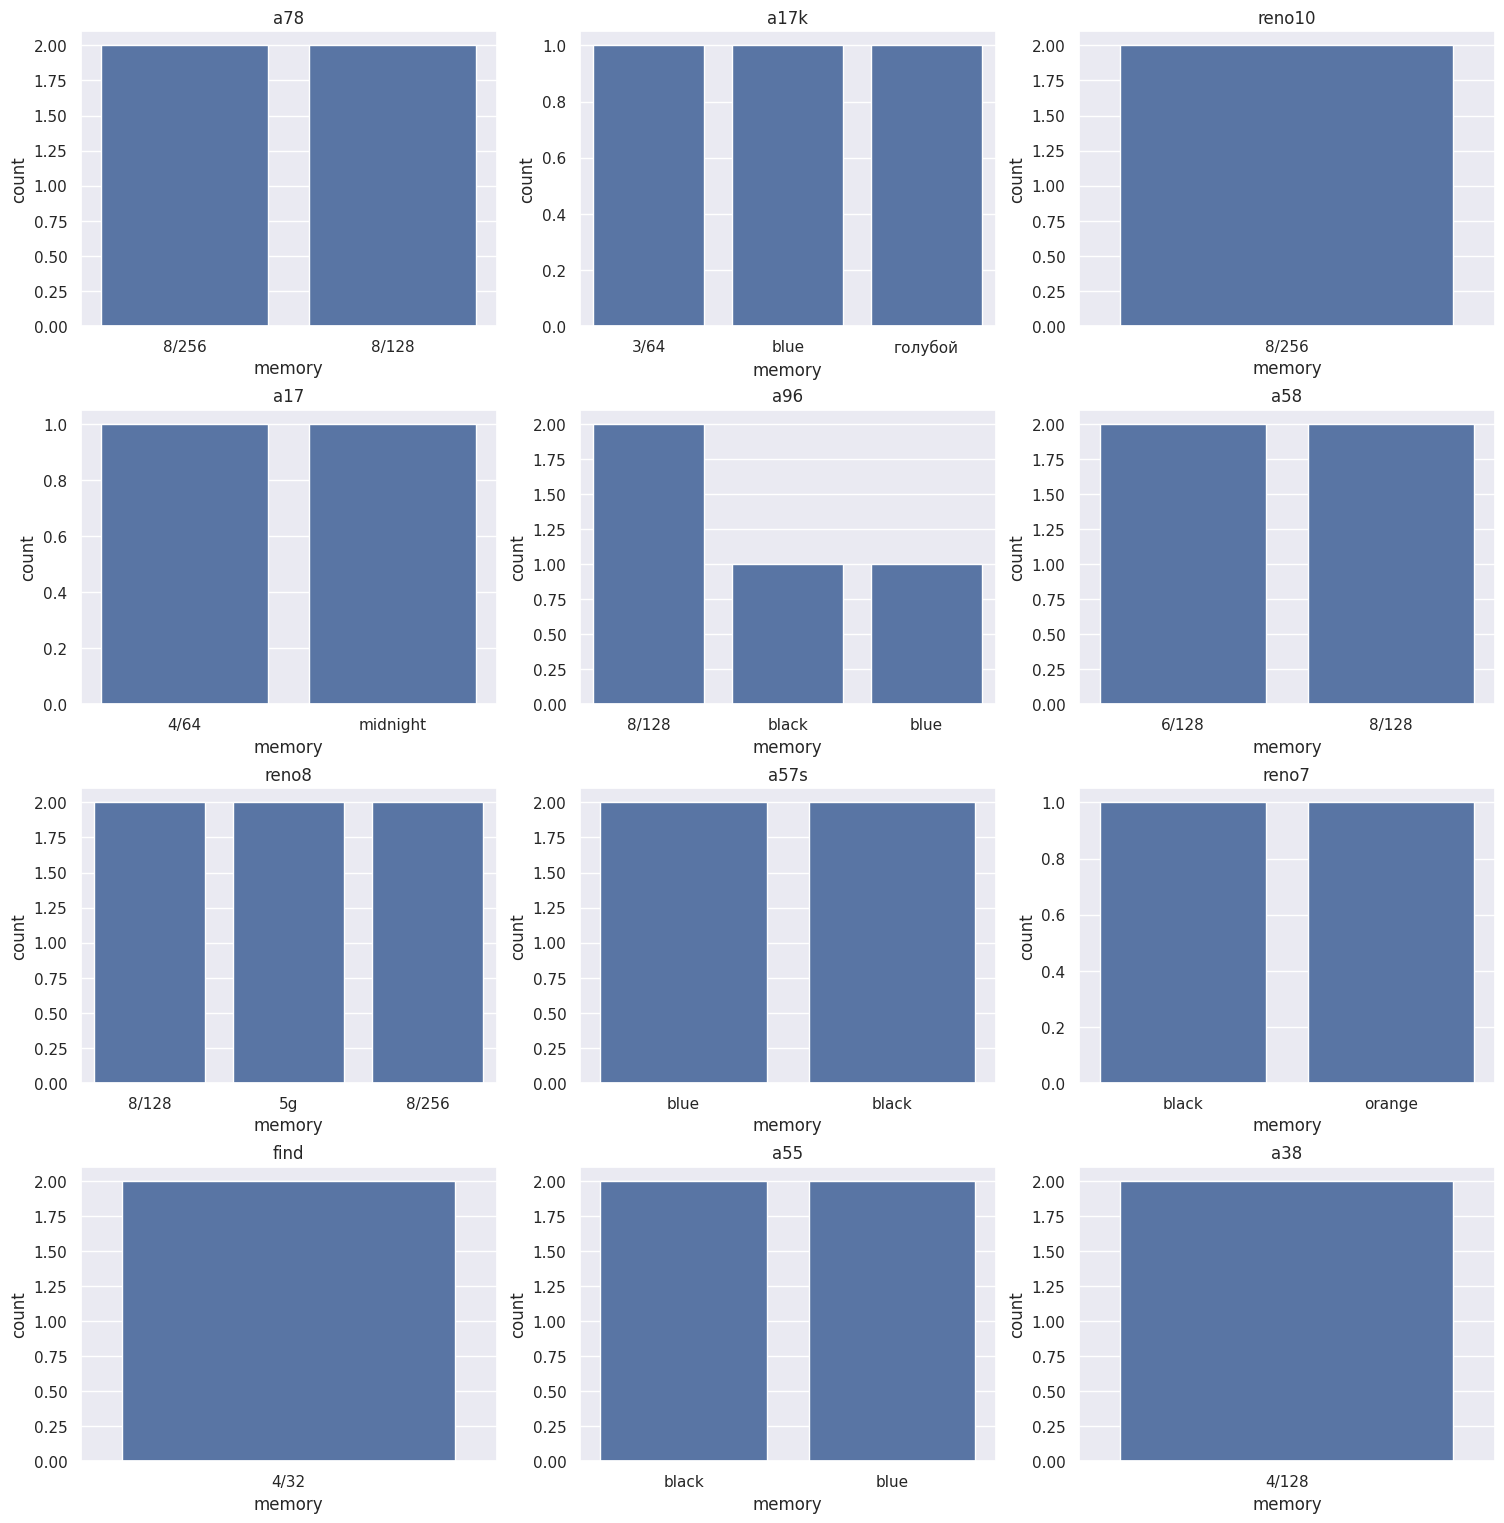

In [206]:
counter_plot(df, 'model', 'memory', fs=(15, 15), num_cols=3)

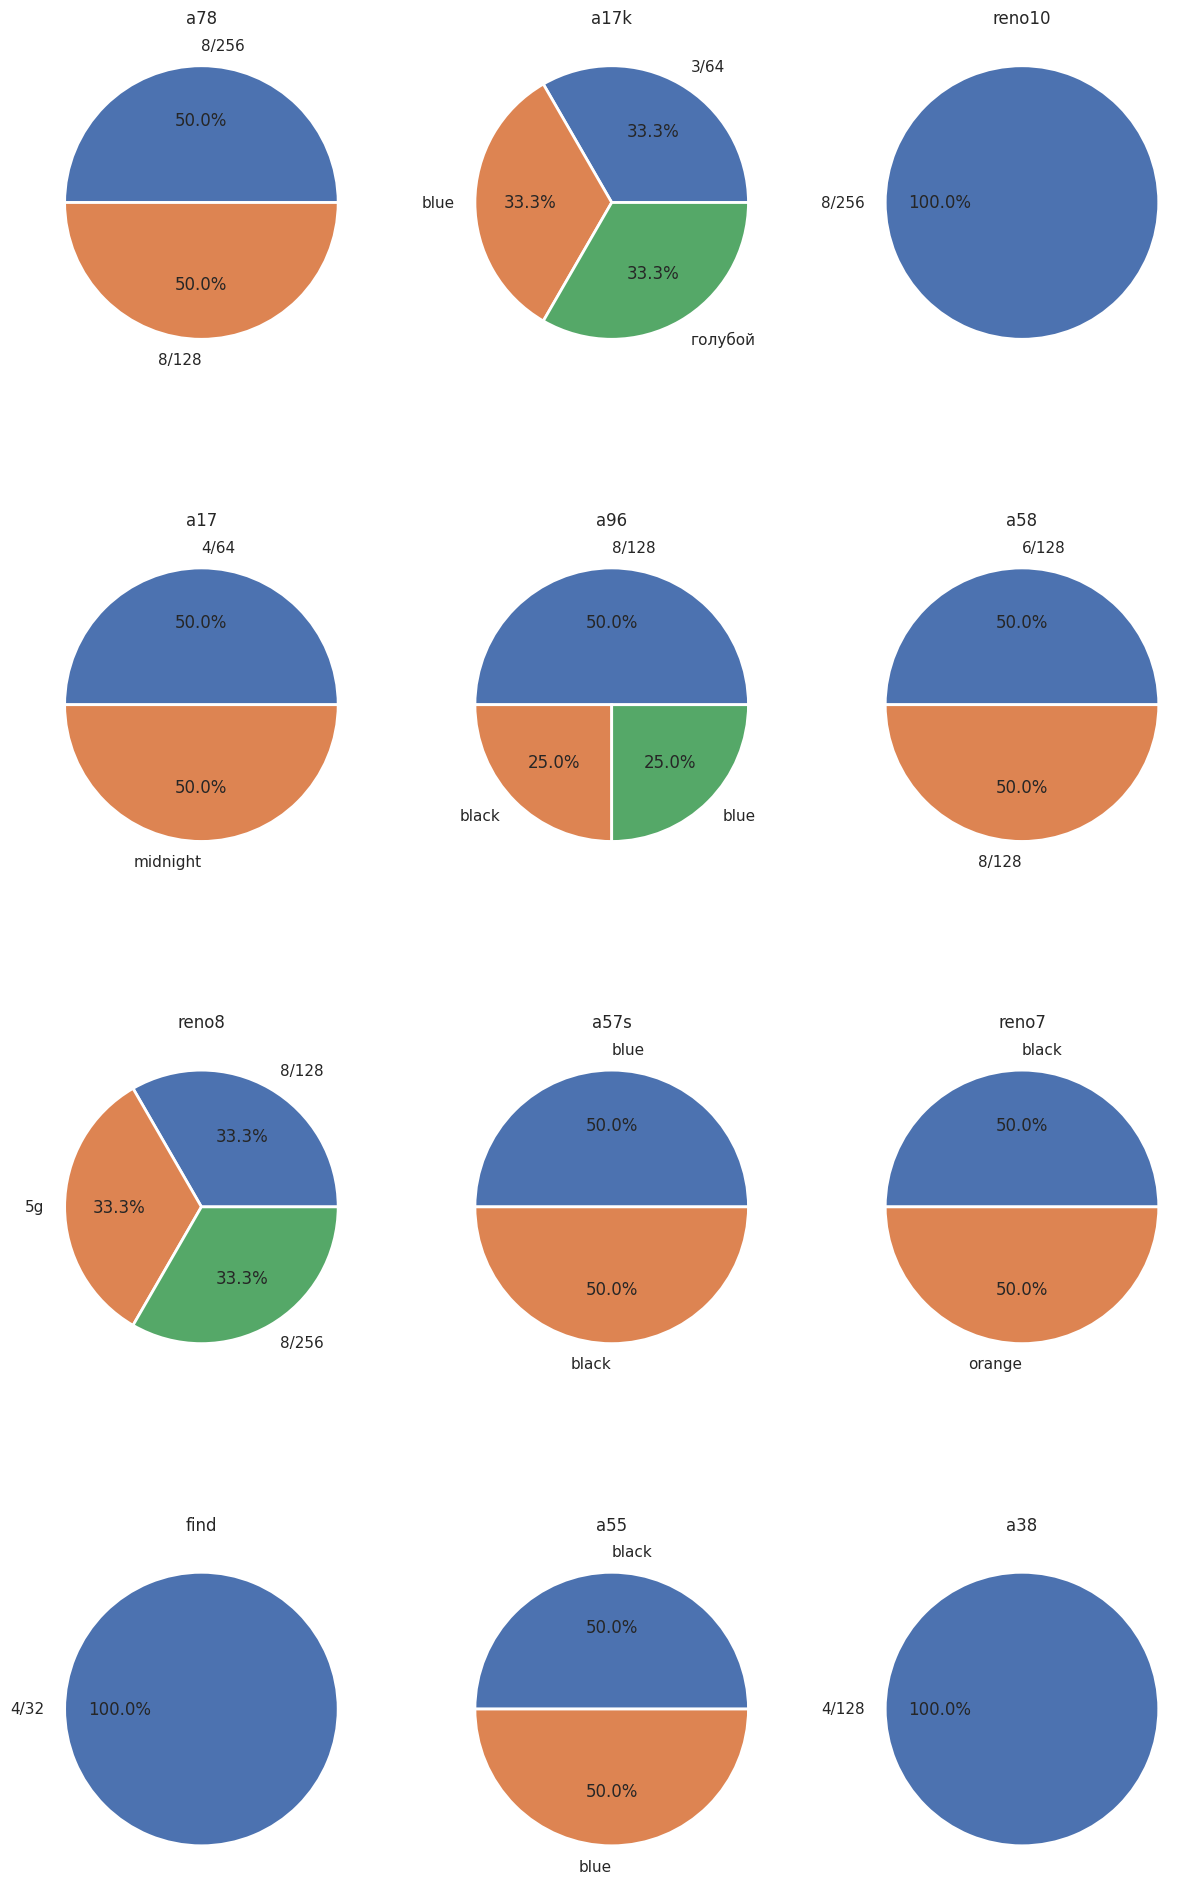

In [207]:
plot_pies(df, 'model', 'memory', num_cols=3, fs=(15,25))

### a17k:

In [208]:
df.loc[df['model'] == 'a17k']

id brand model    series   memory  price
213    30066068  oppo  a17k  standart     3/64   8999
371    30066069  oppo  a17k  standart     blue   8999
1646  400070992  oppo  a17k    (3+64)  голубой   8490

In [209]:
df.loc[(df['model'] == 'a17k') & df['memory'].isin(['blue', 'голубой']), 'memory'] = ('3/64')
df.loc[df['series'] == '(3+64)', 'series'] = 'standart'

### a17:

In [210]:
df.loc[df['model'] == 'a17']

id brand model    series    memory  price
299  30066067  oppo   a17  standart      4/64  10999
384  30066066  oppo   a17  standart  midnight  10999

In [211]:
df.loc[(df['model'] == 'a17') & (df['memory'] == 'midnight'), 'memory'] = '4/64'

### a96:

In [212]:
df.loc[df['model'] == 'a96']

id brand model    series memory  price
306  400111555  oppo   a96  standart  8/128  18999
600  400113515  oppo   a96  standart  8/128  18999
644   30063475  oppo   a96  standart  black  21999
667   30063476  oppo   a96  standart   blue  21999

In [213]:
df.loc[(df['model'] == 'a96') & (df['memory'].isin(['black', 'blue'])), 'memory'] = '3/64'

### reno8:

In [214]:
df.loc[df['model'] == 'reno8']

id brand  model series memory  price
369  400076211  oppo  reno8      t  8/128  25999
411  400076212  oppo  reno8      t  8/128  25999
452  400090739  oppo  reno8      t     5g  34999
576  400090738  oppo  reno8      t     5g  34999
864  400171717  oppo  reno8      t  8/256  29999
877  400171712  oppo  reno8      t  8/256  29999

In [215]:
df.loc[(df['model'] == 'reno8') & (df['memory'] == '5g'), 'memory'] = '8/256'

### a57s:

In [216]:
df.loc[df['model'] == 'a57s']

id brand model    series memory  price
428  30066063  oppo  a57s  standart   blue  15999
609  30066062  oppo  a57s  standart  black  15999
651  30066065  oppo  a57s  standart   blue  13999
782  30066064  oppo  a57s  standart  black  13999

In [217]:
df.loc[(df['model'] == 'a57s') & (df['memory'].isin(['black', 'blue'])), 'memory'] = '3/64'

### reno7:

In [218]:
df.loc[df['model'] == 'reno7']

id brand  model    series  memory  price
436  30063477  oppo  reno7  standart   black  27999
509  30063478  oppo  reno7  standart  orange  27999

In [219]:
df.loc[(df['model'] == 'reno7') & (df['memory'].isin(['black', 'orange'])), 'memory'] = '8/128'

### a55:

In [220]:
df.loc[df['model'] == 'a55']

id brand model    series memory  price
533  30061564  oppo   a55  standart  black  12999
562  30061565  oppo   a55  standart   blue  12999
630  30061563  oppo   a55  standart   blue  13999
701  30061562  oppo   a55  standart  black  13999

In [221]:
df.loc[(df['model'] == 'a55') & (df['memory'].isin(['black', 'blue'])), 'memory'] = '4/64'

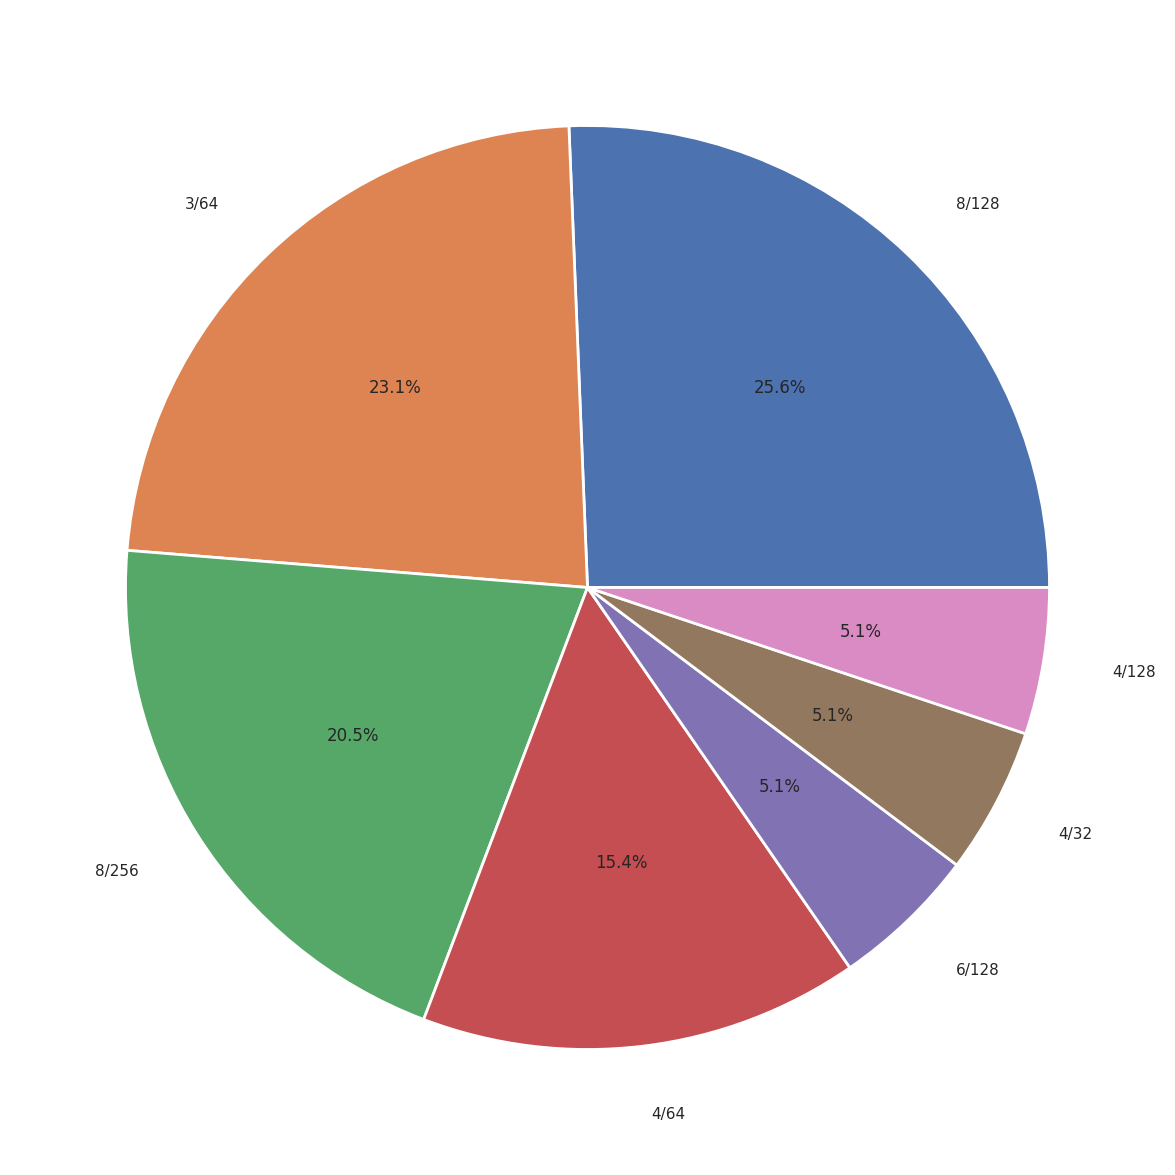

In [222]:
df['memory'].value_counts().plot.pie(
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        autopct='%1.1f%%',
        figsize=(15,15),
        ylabel='',
)
plt.show()

Теперь, когда данные отредактированны, посмотрим на распределение цен по моделям смартфонов.

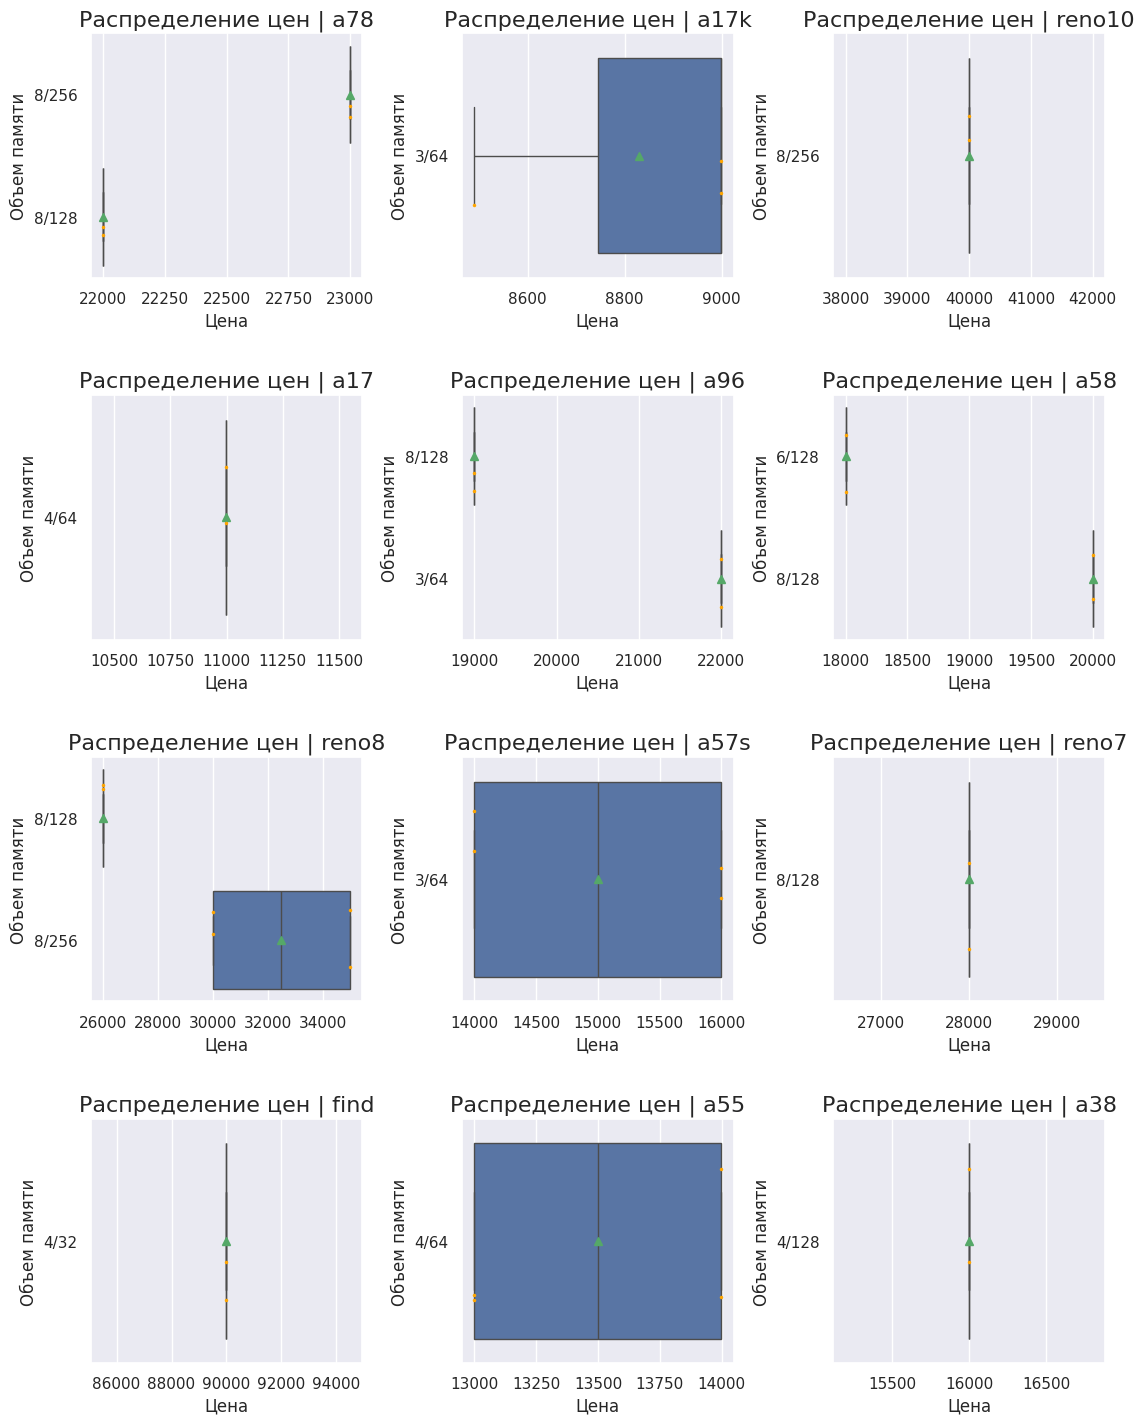

In [223]:
plot_boxes(
    df,
    cols=['model', 'memory', 'price'],
    title=f'Распределение цен',
    xlabel='Цена',
    ylabel='Объем памяти',
    fs=(11, 14),
    num_cols=3
)

In [224]:
df_prod.loc[df_prod['brand'] == brands[6]] = df

### Выводы по производителю Oppo:

* Пропуски в series изменены на значение `standart`.
* Все значения  в memory были исправленны.

Исходя из предоставленной информации о смартфонах Oppo разных ценовых сегментов, можно сделать следующие выводы:

1. Бюджетный сегмент (до 20к):
- Здесь мы видим модели a17k и a57s, которые имеют более низкие цены и ограниченные характеристики, включая меньший объем памяти. Они подходят для тех, кто ищет простое и доступное устройство.
- Модель a38 уже имеет немного больший объем памяти, но по-прежнему находится в бюджетном сегменте.

2. Средний класс (от 20к до 80к):
- Модель a78 предоставляет хорошее соотношение цены и качества, с достаточным объемом памяти. Она является привлекательным вариантом для среднего класса смартфонов Oppo.
- Модели a17, a96, a58 и a55 также предлагают различные функциональные возможности и объемы памяти, приемлемые для данного сегмента.

3. Премиум-сегмент (от 80к):
- Модель reno10 имеет наивысшую цену и отличается самым большим объемом памяти в данной выборке. Она предназначена для пользователей, которые предпочитают устройства с высокими характеристиками и готовы заплатить за это.

Таким образом, Oppo предлагает среди своих смартфонов широкий спектр цен и характеристик, чтобы удовлетворить потребности различных категорий пользователей. От бюджетных моделей с ограниченными функциональными возможностями до премиальных устройств с высокими характеристиками и ценой.

Производитель нацелен на рынки бюджетного и среднего сегментов.

## Валидация оставшихся данных:

Все остальные пропуски в столбце `series` заполним значениями `standart`

In [225]:
df_prod.loc[df_prod['series'].isna(), 'model'].unique()

array(['y36', 'c40', 't1', 'go', 'v27', 'v27e', 'v25e', 't10', 'y35',
       'ds', 't3', 'neo', 'y21', 'рђ72', 'v', 'y53s', 'y33s', 'y31',
       'v25', 'x', 'dancing', 'pro', 'v23e', 'v23', 'y02', 'starlit',
       'basic', 'gt', 'metaverse', '5.3', 'pova', 'm5', 'sp65', 'sa55',
       'sa50', 'plus', 'ace', 'phone', 'ce', 'nubia', 'pixel', '11',
       's99', 'a27', '1', 's51', 'oneplus', 'x5', 'max', '405', '40se',
       '30', '1se', '10pro', '10t', '403', 'a25', 'a95', 's61'],
      dtype=object)

In [226]:
df_prod.loc[df_prod['series'].isna(), 'series'] = 'standart'

Теперь разберемся с некорректными данными в столбце `memory`

In [227]:
df_prod['memory'].unique()

array(['4/32', '6/128', '8/128', '8/256', '4/128', '3/64', '6/64', '2/32',
       '4/64', '6/32', '3/32', 'x6833b', '12/256', '12/512', '6/256',
       '8/512', 'midnight', 'agate', 'black', '1/16', '4/256', '5g',
       '16/1024', 'elegant', 'blue', 'green', 'x665b', '2/64', 'x6812b',
       '128gb', '6/512', 'grey', 'orange', 'gradient', 'magic', 'vibrant',
       'гб', '16/256', 'gray'], dtype=object)

In [228]:
df_prod.loc[df_prod['memory'] == 'midnight']

id brand model    series    memory  price
201   30065139  wiko   t10  standart  midnight   3999
549  400047906  inoi  рђ72  standart  midnight   9999

In [229]:
df_prod.loc[df_prod['id'] == 30065139, 'memory'] = '2/64'
df_prod.loc[df_prod['id'] == 400047906, 'memory'] = '4/64'

In [230]:
df_prod.loc[df_prod['memory'] == 'agate']

id brand model    series memory  price
233  30064439  vivo   y35  standart  agate  17999
315  30064437  vivo   y35  standart  agate  19999

In [231]:
df_prod.loc[df_prod['memory'] == 'agate', 'memory'] = '4/128'

In [232]:
df_prod.loc[df_prod['memory'] == '5g']

id    brand    model    series memory  price
330   400060674    tecno  phantom        x2     5g  49999
503   400060677    tecno  phantom        x2     5g  49999
939    30061190     poco      pro  standart     5g  15999
1050  400104540     poco      pro  standart     5g  46790
1279  400104537     poco      pro  standart     5g  39390
1428  400104538     poco      pro  standart     5g  46790
1429  400104539     poco      pro  standart     5g  39390
1461  400104542     poco      pro  standart     5g  39390
1981  400176317  oneplus     nord        2t     5g  54990

In [233]:
df_prod.loc[(df_prod['memory'] == '5g') & (df_prod['series'] == 'x2'), 'memory'] = '8/256'

df_prod.loc[(df_prod['memory'] == '5g') & (df_prod['model'] == 'pro') & (df_prod['price'] < 16_000), 'memory'] = '4/64'
df_prod.loc[(df_prod['memory'] == '5g') & (df_prod['model'] == 'pro') & (df_prod['price'] >= 16_000) & (df_prod['price'] < 40_000), 'memory'] = '6/128'
df_prod.loc[(df_prod['memory'] == '5g') & (df_prod['model'] == 'pro') & (df_prod['price'] > 40_000), 'memory'] = '8/256'

df_prod.loc[(df_prod['memory'] == '5g') & (df_prod['series'] == '2t'), 'memory'] = '12/512'

In [234]:
df_prod.loc[df_prod['memory'] == 'elegant']

id brand model    series   memory  price
415  30063789  wiko    t3  standart  elegant   9999

In [235]:
df_prod.loc[df_prod['memory'] == 'elegant', 'memory'] = '4/128'

In [236]:
df_prod.loc[df_prod['memory'] == 'blue']

id brand    model    series memory  price
646    30064651  vivo  starlit  standart   blue  15999
953   400142126    f+     sa55  standart   blue   5499
1272  400070989  itel      a27  standart   blue   5000

In [237]:
df_prod.loc[(df_prod['memory'] == 'blue') & (df_prod['model'] == 'sa55'), 'memory'] = '2/16'
df_prod.loc[(df_prod['memory'] == 'blue') & (df_prod['model'] == 'a27'), 'memory'] = '2/32'
df_prod.loc[(df_prod['memory'] == 'blue') & (df_prod['model'] == 'starlit'), 'memory'] = '4/64'
df_prod.loc[(df_prod['memory'] == 'blue') & (df_prod['model'] == 'starlit'), 'series'] = 'Y22'

In [238]:
df_prod.loc[df_prod['memory'] == 'green']

id    brand      model    series memory   price
649    30055683     itel         ds  standart  green    5999
738    30064652     vivo  metaverse  standart  green   15999
949    30064577     poco         m5  standart  green   16999
1202  400129694  oneplus         11  standart  green  101390

In [239]:
df_prod.loc[(df_prod['memory'] == 'green') & (df_prod['model'] == 'ds'), 'memory'] = '1/16'

df_prod.loc[(df_prod['memory'] == 'green') & (df_prod['model'] == 'metaverse'), 'memory'] = '4/64'
df_prod.loc[(df_prod['memory'] == 'green') & (df_prod['model'] == 'metaverse'), 'series'] = 'y22'

df_prod.loc[(df_prod['memory'] == 'green') & (df_prod['model'] == 'm5'), 'memory'] = '4/128'

df_prod.loc[(df_prod['memory'] == 'green') & (df_prod['model'] == '11'), 'memory'] = '16/256'

In [240]:
df_prod.loc[df_prod['memory'] == 'x665b']

id    brand model series memory  price
654  30064319  infinix   hot    12i  x665b  11999
658  30064371  infinix   hot    12i  x665b  11999

In [241]:
df_prod.loc[df_prod['memory'] == 'x665b', 'memory'] = '4/64'

In [242]:
df_prod.loc[df_prod['memory'] == 'x6812b']

id    brand model  series  memory  price
728  30064563  infinix   hot  x6812b  x6812b  14999
809  30064564  infinix   hot  x6812b  x6812b  14999
950  30064561  infinix   hot  x6812b  x6812b  17999

In [243]:
df_prod.loc[df_prod['memory'] == 'x6812b', 'memory'] = '4/128'

In [244]:
df_prod.loc[df_prod['memory'] == 'x6833b']

id    brand model  series  memory  price
64   400148237  infinix  note  x6833b  x6833b  23999
171  400148235  infinix  note  x6833b  x6833b  23999
455  400148238  infinix  note  x6833b  x6833b  21999
756  400148236  infinix  note  x6833b  x6833b  21999

In [245]:
df_prod.loc[(df_prod['memory'] == 'x6833b') & (df_prod['price'] == 23_999), 'memory'] = '8/256'
df_prod.loc[(df_prod['memory'] == 'x6833b') & (df_prod['price'] == 21_999), 'memory'] = '8/128'

In [246]:
df_prod.loc[df_prod['memory'] == '128gb']

id brand model    series memory  price
729  30063266  poco    gt  standart  128gb  47999
784  30063264  poco    gt  standart  128gb  47999

In [247]:
df_prod.loc[df_prod['memory'] == '128gb', 'memory'] = '8/128'

In [248]:
df_prod.loc[df_prod['memory'] == 'grey']

id    brand model    series memory  price
912   400142144       f+  sp65  standart   grey   9999
1825  400064552  alcatel   1se  standart   grey   7800

In [249]:
df_prod.loc[(df_prod['memory'] == 'grey') & (df_prod['brand'] == 'f+'), 'memory'] = '6/64'
df_prod.loc[(df_prod['memory'] == 'grey') & (df_prod['brand'] == 'alcatel'), 'memory'] = '3/32'

In [250]:
df_prod.loc[df_prod['memory'] == 'orange']

id   brand model    series  memory  price
985  400009138  doogee  plus  standart  orange  28590

In [251]:
df_prod.loc[df_prod['memory'] == 'orange', 'memory'] = '8/128'

In [252]:
df_prod.loc[df_prod['memory'] == 'gradient']

id    brand model    series    memory  price
1010  400009140  oneplus   ace  standart  gradient  50590
1505  400009142  oneplus   ace  standart  gradient  48890

In [253]:
df_prod.loc[df_prod['memory'] == 'gradient', 'memory'] = '8/128'

In [254]:
df_prod.loc[df_prod['memory'] == 'magic']

id brand  model    series memory  price
1112  400176422   zte  nubia  standart  magic  99990
1323  400176336   zte  nubia  standart  magic  79990
1591  400176460   zte  nubia  standart  magic  94990

In [255]:
df_prod.loc[df_prod['memory'] == 'magic', 'series'] = '7s'
df_prod.loc[df_prod['memory'] == 'magic', 'memory'] = '18/512'

In [256]:
df_prod.loc[df_prod['memory'] == 'vibrant']

id   brand model    series   memory  price
1502  400086941  doogee   s51  standart  vibrant  12790

In [257]:
df_prod.loc[df_prod['memory'] == 'vibrant', 'memory'] = '6/64'

In [258]:
df_prod.loc[df_prod['memory'] == 'гб']

id brand model    series memory  price
1579  400156942   tcl  40se  standart     гб  15990
1628  400156939   tcl  40se  standart     гб  15990
2085  400156938   tcl   403  standart     гб   5990

In [259]:
df_prod.loc[(df_prod['memory'] == 'гб') & (df_prod['model'] == '40se'), 'memory'] = '6/256'
df_prod.loc[(df_prod['memory'] == 'гб') & (df_prod['model'] == '403'), 'memory'] = '2/32'

In [260]:
df_prod.loc[(df_prod['memory'] == 'gray')]

id brand model    series memory  price
2302  400110864   tcl   405  standart   gray   6990

In [261]:
df_prod.loc[(df_prod['memory'] == 'gray'), 'memory'] = '2/32'

In [262]:
df_prod.loc[(df_prod['memory'] == 'black')]

id    brand  model    series memory  price
249    30055681     itel     ds  standart  black   5999
307   400047742     inoi   рђ72  standart  black   9999
355   400047654     inoi   рђ72  standart  black   8999
752    30065191       bq  basic  standart  black   3999
954   400142140       f+   sa50  standart  black   4999
1144  400068055     itel     ds  standart  black   5460
1391  400050569  nothing      1  standart  black  45990
1503  400087895   doogee   plus  standart  black  28590
1759  400072967     poco    c40  standart  black   8650
1782  400070991      tcl     30  standart  black  11490
2163  400034237   doogee    s61  standart  black  18590

In [263]:
df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'ds') , 'series'] = 'a48'
df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'ds') , 'memory'] = '2/32'

df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'рђ72') , 'series'] = 'a72'
df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'рђ72') , 'memory'] = '4/64'

df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'sa50') , 'memory'] = '2/16'

df_prod.loc[(df_prod['brand'] == 'nothing') & (df_prod['model'] == '1') , 'series'] = '1'
df_prod.loc[(df_prod['brand'] == 'nothing') & (df_prod['model'] == '1') , 'model'] = 'phone'
df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'phone') , 'memory'] = '8/256'

df_prod.loc[(df_prod['brand'] == 'doogee') & (df_prod['model'] == 'plus') , 'series'] = 'plus'
df_prod.loc[(df_prod['brand'] == 'doogee') & (df_prod['model'] == 'plus') , 'model'] = 's88'
df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 's88') , 'memory'] = '8/128'

df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'c40') , 'memory'] = '4/64'

df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == '30') , 'memory'] = '6/256'

df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 's61') , 'memory'] = '6/64'

df_prod.loc[(df_prod['memory'] == 'black') & (df_prod['model'] == 'basic') , 'memory'] = '1/8'
df_prod.loc[(df_prod['brand'] == 'bq') & (df_prod['model'] == 'basic') , 'series'] = 'basic'
df_prod.loc[(df_prod['brand'] == 'bq') & (df_prod['model'] == 'basic') , 'model'] = '5060L'

In [264]:
df_prod['memory'].unique()

array(['4/32', '6/128', '8/128', '8/256', '4/128', '3/64', '6/64', '2/32',
       '4/64', '6/32', '3/32', '12/256', '12/512', '6/256', '8/512',
       '2/64', '1/16', '4/256', '16/1024', '1/8', '6/512', '2/16',
       '18/512', '16/256'], dtype=object)

Данные обработаны, можно двигаться дальше.

## Заключение:

Исходя из поставленных целей, было проведено исследование структуры данных в таблице с информацией о смартфонах. Были определены колонки и типы данных, а также их соотношение с каждым смартфоном. 

Также была выполнена проверка на наличие пропущенных данных в каждой колонке. Были приняты меры по обработке и устранению пропусков, чтобы сделать данные полными и достоверными. 

Для валидации данных были проверены значения в каждой колонке на соответствие ожидаемым. Например, было проверено, что значения в столбце "память" являются корректными вариантами, а значения в столбце "цена" являются положительными числами. 

Для изучения распределений было проведено исследование значений каждой колонки, чтобы определить наиболее распространенные характеристики и выявить возможные выбросы или аномалии. 

Также были созданы графики и визуализации данных, что позволило лучше понять информацию и выявить интересные закономерности. 

Наконец, был проведен анализ на наличие аномалий, таких как смартфоны с нереалистически высокими или низкими ценами, или несоответствующими техническим характеристиками. Были предложены меры для решения или исключения этих аномалий из данных. 

В результате выполнения данных целей была проведена полная проверка и обработка данных, что позволит более точно анализировать и использовать информацию о смартфонах в дальнейшем.


# Таблица buyers:

In [265]:
df_geo = get_table_df('buyers')

In [266]:
first_check(df_geo)

Первые 5 строк: 
    id     geo_lon    geo_lat
0   1   12.183056  52.433056
1   2   20.633333   8.466666
2   3   46.182220  37.571390
3   4   43.933334  43.350000
4   5  117.283330  52.933334 
 ---------------------------------------------------------------------------------------------------- 
Cуммарная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010547 entries, 0 to 1010546
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   id       1010547 non-null  int64  
 1   geo_lon  1010547 non-null  float64
 2   geo_lat  1010547 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 23.1 MB

 None 
 ---------------------------------------------------------------------------------------------------- 
Сводка:

                  id       geo_lon       geo_lat
count  1.010547e+06  1.010547e+06  1.010547e+06
mean   5.071184e+05  2.966850e+01  4.653013e+01
std    2.932784e+05  5.966093e+01  1.726377e+01
min   

1. Данные содержат информацию о географических координатах (долготе и широте) для каждого покупателя.
2. Общее количество строк в данных (покупателей) составляет 1 014 912.
3. Пропущенные значения (NaN) есть в столбцах geo_lon и geo_lat, их количество составляет 4 365, что составляет около 0.43% от общего числа строк.

In [267]:
na_ids = list(df_geo.loc[(df_geo['geo_lon'].isna()) | (df_geo['geo_lat'].isna()), 'id'])

В таблице есть пропуски, удалим данные записи.

In [268]:
df_geo.dropna(inplace=True)

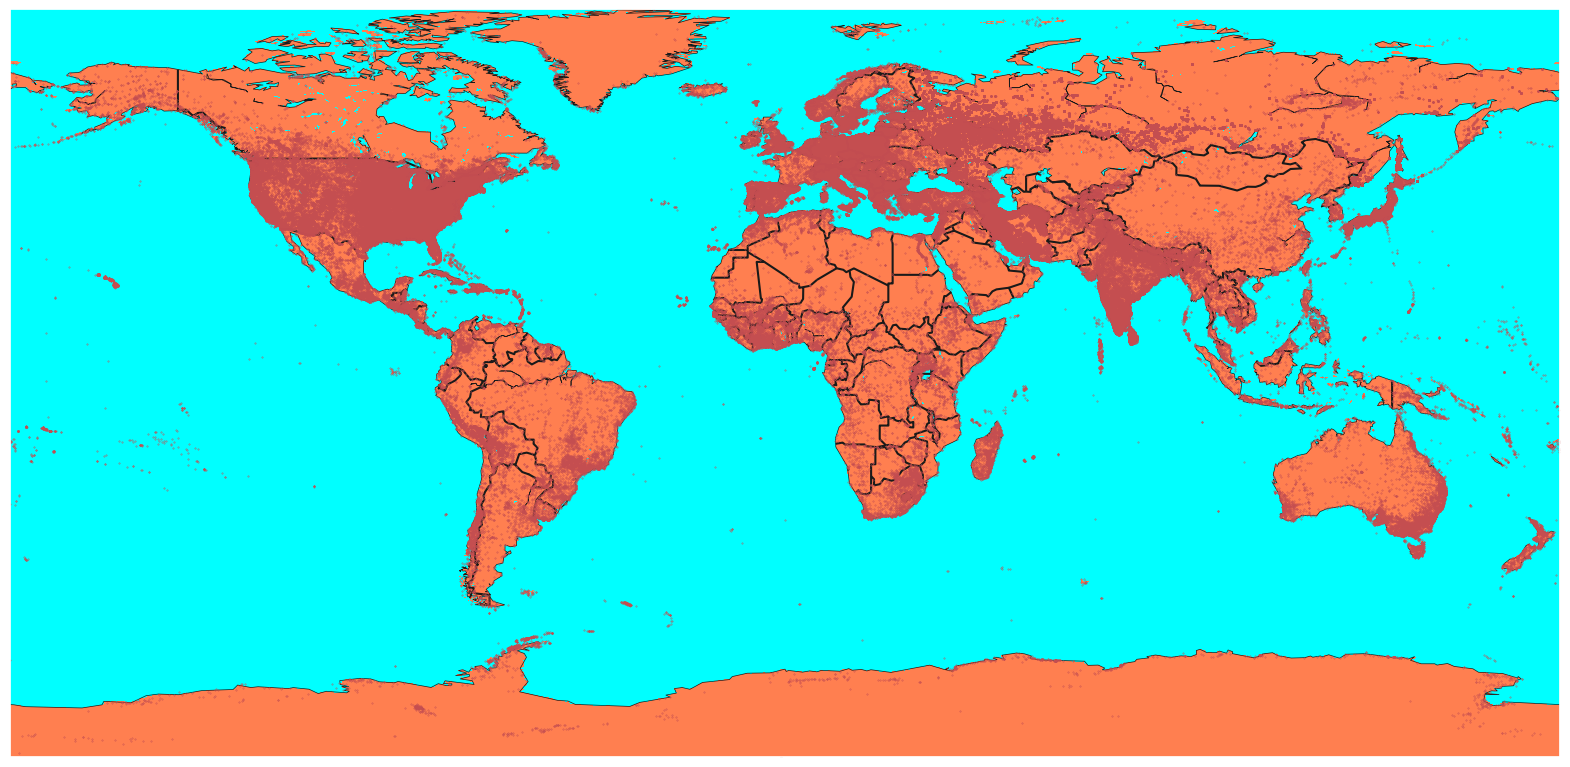

In [269]:
lat = df_geo['geo_lat'].values
lon = df_geo['geo_lon'].values
plt.figure(figsize=(20, 16))

m = Basemap(projection="mill",
            llcrnrlat=min(lat),
            urcrnrlat=max(lat),
            llcrnrlon=min(lon),
            urcrnrlon=max(lon), 
            resolution='c',
            epsg=4269)

m.drawlsmask(land_color='coral', ocean_color='aqua', lakes=True)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=1.5)
m.plot(lon, lat, 'ro', markersize=0.3)
plt.show()

In [270]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010547 entries, 0 to 1010546
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   id       1010547 non-null  int64  
 1   geo_lon  1010547 non-null  float64
 2   geo_lat  1010547 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 23.1 MB


In [271]:
import folium
m = folium.Map(tiles='Stamen Terrain')

m

# Работа с базой данных

Теперь нам необходимо обновить наши данные в базе данных.

In [272]:
import sys

def print_psycopg2_exception(err):
    # get details about the exception
    err_type, err_obj, traceback = sys.exc_info()

    # get the line number when exception occured
    line_num = traceback.tb_lineno

    # print the connect() error
    print ("\npsycopg2 ERROR:", err, "on line number:", line_num)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type)

    # psycopg2 extensions.Diagnostics object attribute
    print ("\nextensions.Diagnostics:", err.diag)

    # print the pgcode and pgerror exceptions
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")

In [273]:
df_prod

id    brand   model    series memory   price
0      30069468    apple  iphone        15   4/32  159999
1     400103320   realme     c55  standart  6/128   18999
2      30067400  samsung  galaxy       a14  8/128   16999
3      30067635   huawei    nova       11i  8/128   19999
4     400077577    honor     x9a  standart  6/128   27999
...         ...      ...     ...       ...    ...     ...
2305  400181426  samsung  galaxy       s22  8/128   90990
2306  400140768  samsung  galaxy       a34  8/256   31990
2307  400127226   google   pixel  standart  8/256   60990
2308  400203135  samsung  galaxy       a24  4/128   21990
2309  400203137  samsung  galaxy       a34  6/128   26990

[2310 rows x 6 columns]

## Запросы к DB